In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def get_dictionaries(ratingsdf,usercol,itemcol,ratingcol):
    users = list(set(ratingsdf[usercol].values))
    items = list(set(ratingsdf[itemcol].values))
    ratings_by_user = {user_id:{} for user_id in users}
    users_by_item = {item_id:[] for item_id in items}
    for review_index in ratingsdf.index:
        user_id = ratingsdf[usercol][review_index]
        item_id = ratingsdf[itemcol][review_index]
        rating = ratingsdf[ratingcol][review_index]
        ratings_by_user[user_id][item_id] = rating
        users_by_item[item_id].append(user_id)
    return ratings_by_user,users_by_item

In [2]:
nutritiondf = pd.read_pickle('../data/nutrition.pk')

In [3]:
nutritiondf.head()

,Name,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
RecipeId,,,,,,,,,,,
524289,Apple-Glazed Stuffed Pork Chops,423.3,18.3,6.3,132.1,239.0,18.3,0.6,11.8,41.6,4.0
524315,Crispy Chicken Thighs in Convection Oven,445.8,19.0,9.3,130.6,1047.3,34.7,2.2,2.8,32.6,4.0
38,Low-Fat Berry Blue Frozen Dessert,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0
39,Biryani,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0
40,Best Lemonade,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0


In [13]:
user_ratings,recipe_reviewers = get_dictionaries(reviews,'AuthorId','RecipeId','Rating')

The numbers in the nutrition dataframe are all over the place - and they are expressed in different units.
We're going to use [the FDA's recommended daily allowances](https://www.fda.gov/media/99059/download) to standardize the numbers, by replacing the raw numbers by the percentage of RDA.

In [24]:
rda_dictionary = {'Calories':2200, 'FatContent':78, 'SaturatedFatContent':20, 'CholesterolContent':300,
       'SodiumContent':2300, 'CarbohydrateContent':275, 'FiberContent':28, 'SugarContent':50,
       'ProteinContent':50}

nutritiondf_perc = nutritiondf.copy()
for category in rda_dictionary:
    nutritiondf_perc[category] = [100* amount/rda_dictionary[category] for amount in nutritiondf[category].values]

In [28]:
nutritiondf_perc.loc

KeyError: '[19.240909090909092, 20.263636363636362, 7.7681818181818185, 50.486363636363635, 14.140909090909092, 24.368181818181817, 4.709090909090909, 19.904545454545456, 40.70454545454545, 10.363636363636363, 31.28181818181818, 28.531818181818185, 2.827272727272727, 23.754545454545454, 18.904545454545456, 17.995454545454546, 12.731818181818184, 10.068181818181818, 17.322727272727274, 18.536363636363635, 26.64090909090909, 18.568181818181817, 31.713636363636365, 29.904545454545456, 8.309090909090909, 22.26818181818182, 22.14090909090909, 14.986363636363636, 21.85, 1.8590909090909091, 16.990909090909092, 16.14090909090909, 89.72727272727273, 45.518181818181816, 18.754545454545454, 6.427272727272728, 11.195454545454545, 15.35909090909091, 23.527272727272727, 24.704545454545453, 20.863636363636363, 54.29999999999999, 2.1818181818181817, 12.27727272727273, 5.7727272727272725, 23.26818181818182, 69.85, 12.604545454545455, 2.6545454545454548, 16.236363636363638, 5.0227272727272725, 53.34090909090909, 45.99090909090909, 13.75, 24.350000000000005, 9.486363636363636, 10.763636363636364, 31.21818181818182, 3.1227272727272726, 11.340909090909092, 18.62272727272727, 160.0818181818182, 22.20909090909091, 24.727272727272727, 15.709090909090909, 15.113636363636363, 3.8181818181818183, 3.022727272727273, 11.236363636363636, 27.899999999999995, 5.168181818181818, 6.140909090909091, 16.368181818181817, 9.513636363636364, 10.618181818181819, 3.7181818181818183, 9.063636363636364, 15.381818181818181, 43.236363636363635, 15.218181818181819, 15.031818181818181, 18.681818181818183, 28.727272727272727, 25.486363636363638, 23.98181818181818, 12.268181818181816, 49.73181818181818, 132.05454545454546, 23.681818181818183, 12.136363636363637, 46.013636363636365, 74.35, 7.4363636363636365, 16.972727272727273, 26.718181818181815, 15.486363636363636, 45.00454545454546, 39.60909090909091, 16.759090909090908, 37.99090909090909, 7.622727272727273, 34.31818181818182, 12.177272727272726, 10.468181818181819, 17.045454545454547, 20.20909090909091, 19.7, 1.9090909090909092, 14.404545454545453, 9.309090909090909, 21.45, 22.78181818181818, 12.02727272727273, 19.972727272727273, 10.477272727272727, 5.077272727272727, 14.013636363636364, 13.881818181818181, 13.577272727272728, 10.718181818181819, 20.73181818181818, 11.3, 13.622727272727273, 17.104545454545455, 16.177272727272726, 9.004545454545454, 20.345454545454544, 8.213636363636363, 17.009090909090908, 26.03636363636363, 28.04090909090909, 1.790909090909091, 16.363636363636363, 3.1545454545454548, 27.531818181818185, 4.8545454545454545, 11.536363636363637, 7.0227272727272725, 17.35, 32.11363636363637, 93.62272727272726, 12.418181818181818, 5.513636363636364, 7.418181818181817, 29.149999999999995, 38.54545454545455, 9.445454545454545, 16.76818181818182, 8.654545454545454, 57.26818181818182, 13.04090909090909, 19.05909090909091, 16.03181818181818, 13.618181818181819, 8.372727272727273, 6.263636363636365, 21.0, 30.636363636363637, 18.454545454545453, 20.727272727272727, 6.545454545454546, 3.1090909090909093, 14.145454545454545, 11.863636363636363, 16.004545454545454, 12.927272727272726, 13.568181818181818, 13.854545454545455, 6.945454545454546, 16.254545454545454, 7.122727272727272, 20.87272727272727, 22.068181818181817, 8.904545454545454, 3.3181818181818183, 15.013636363636364, 6.390909090909091, 34.018181818181816, 3.077272727272727, 16.345454545454544, 19.78181818181818, 23.486363636363638, 10.318181818181818, 33.13181818181818, 12.036363636363637, 9.1, 16.427272727272726, 10.568181818181818, 7.5636363636363635, 4.818181818181818, 18.181818181818183, 33.93181818181818, 30.845454545454544, 5.068181818181818, 15.059090909090909, 26.818181818181817, 9.613636363636363, 4.972727272727273, 16.522727272727273, 14.681818181818182, 10.895454545454545, 13.25909090909091, 12.545454545454545, 23.12727272727273, 9.272727272727273, 4.463636363636364, 4.136363636363637, 22.19090909090909, 8.368181818181819, 26.85909090909091, 267.73636363636365, 4.404545454545454, 212.7318181818182, 3.6090909090909093, 2.936363636363636, 10.927272727272728, 7.722727272727273, 297.3181818181818, 0.0, 7.340909090909091, 0.16363636363636364, 12.949999999999998, 16.686363636363637, 6.877272727272728, 13.231818181818184, 21.436363636363637, 7.4772727272727275, 19.931818181818183, 8.427272727272728, 15.745454545454546, 10.636363636363637, 9.55, 4.822727272727272, 10.781818181818181, 7.081818181818183, 4.15, 11.795454545454545, 13.159090909090908, 16.854545454545455, 6.745454545454545, 17.818181818181817, 4.704545454545454, 6.345454545454546, 8.013636363636364, 27.472727272727273, 14.754545454545456, 17.10909090909091, 4.55, 4.65, 61.69090909090909, 16.51818181818182, 2.4681818181818183, 4.368181818181818, 11.49090909090909, 31.59090909090909, 24.372727272727275, 25.53636363636363, 7.2, 36.24090909090909, 55.15909090909091, 51.14090909090908, 23.03181818181818, 23.009090909090908, 1.5681818181818181, 49.79545454545455, 19.568181818181817, 5.295454545454546, 1.4909090909090907, 25.29090909090909, 5.3090909090909095, 25.00909090909091, 21.004545454545454, 63.95909090909091, 71.91363636363636, 27.904545454545456, 7.927272727272728, 17.15, 9.122727272727273, 19.53181818181818, 8.113636363636363, 2.2, 1.1545454545454545, 16.745454545454546, 21.154545454545456, 10.309090909090909, 16.322727272727274, 17.722727272727273, 42.44090909090909, 25.34090909090909, 12.454545454545455, 28.131818181818183, 14.281818181818181, 14.977272727272727, 10.018181818181818, 4.1909090909090905, 4.159090909090909, 22.168181818181818, 13.054545454545455, 18.772727272727273, 13.522727272727273, 1.6409090909090909, 47.39090909090908, 34.45454545454545, 12.140909090909092, 19.513636363636362, 11.059090909090909, 3.090909090909091, 6.786363636363637, 15.263636363636364, 117.87727272727274, 13.627272727272727, 52.82272727272726, 22.063636363636363, 17.313636363636363, 6.104545454545455, 13.300000000000002, 10.672727272727272, 18.64090909090909, 15.345454545454546, 5.468181818181818, 9.49090909090909, 14.418181818181818, 19.95909090909091, 45.43181818181818, 31.4, 11.327272727272728, 10.090909090909092, 9.468181818181819, 1.2863636363636364, 4.631818181818182, 2.4318181818181817, 34.35909090909091, 68.71818181818182, 42.27272727272727, 21.45909090909091, 6.627272727272728, 11.645454545454545, 41.57272727272727, 39.763636363636365, 23.39090909090909, 17.59090909090909, 8.481818181818182, 4.0181818181818185, 22.931818181818183, 7.140909090909091, 6.881818181818182, 7.531818181818182, 6.590909090909091, 19.645454545454545, 17.01818181818182, 38.486363636363635, 38.154545454545456, 2.536363636363636, 1.2272727272727273, 19.663636363636364, 39.877272727272725, 10.481818181818182, 17.240909090909092, 35.79090909090909, 29.495454545454546, 37.84090909090909, 12.413636363636366, 54.02272727272727, 26.122727272727275, 13.386363636363637, 58.25909090909091, 19.936363636363637, 21.695454545454545, 4.831818181818182, 9.39090909090909, 27.727272727272727, 73.92272727272727, 13.281818181818181, 19.154545454545456, 15.272727272727273, 26.059090909090905, 35.19090909090909, 33.92272727272727, 33.30909090909091, 10.572727272727272, 3.590909090909091, 36.99545454545454, 12.190909090909091, 9.327272727272728, 19.254545454545454, 16.10909090909091, 0.9772727272727273, 2.7954545454545454, 6.281818181818181, 6.927272727272728, 11.868181818181819, 15.931818181818182, 2.1545454545454548, 18.804545454545455, 87.87727272727273, 17.922727272727272, 13.713636363636363, 3.1318181818181823, 5.95, 3.436363636363636, 3.3772727272727274, 10.213636363636363, 11.504545454545454, 269.3954545454545, 11.472727272727273, 12.75, 6.790909090909091, 6.0181818181818185, 20.845454545454544, 10.704545454545455, 7.304545454545454, 16.26818181818182, 8.322727272727272, 3.668181818181818, 105.15454545454546, 29.649999999999995, 36.36818181818182, 104.97727272727273, 10.263636363636364, 18.131818181818183, 24.427272727272726, 12.427272727272726, 9.922727272727272, 22.522727272727273, 10.995454545454546, 12.550000000000002, 11.963636363636363, 10.663636363636364, 36.29090909090909, 5.736363636363636, 42.35454545454545, 5.0636363636363635, 3.963636363636364, 7.504545454545455, 161.38181818181818, 21.37272727272727, 4.577272727272727, 12.300000000000002, 10.190909090909091, 16.422727272727272, 1.5363636363636362, 16.804545454545455, 19.445454545454545, 12.822727272727274, 30.12272727272727, 70.36363636363636, 8.631818181818181, 3.4545454545454546, 18.327272727272728, 1.6045454545454543, 12.35, 15.936363636363636, 18.068181818181817, 8.763636363636364, 5.290909090909091, 16.827272727272728, 24.059090909090905, 15.313636363636364, 34.445454545454545, 65.5, 5.972727272727273, 17.740909090909092, 19.73181818181818, 5.672727272727273, 11.981818181818184, 17.118181818181817, 5.318181818181818, 13.35, 80.40454545454546, 29.568181818181817, 20.277272727272727, 13.513636363636364, 20.71818181818182, 200.20454545454547, 17.26818181818182, 17.71818181818182, 6.827272727272726, 27.722727272727273, 7.040909090909091, 16.045454545454547, 33.086363636363636, 10.386363636363637, 14.79090909090909, 260.7909090909091, 28.336363636363636, 11.65, 19.977272727272727, 13.640909090909092, 14.072727272727274, 7.163636363636364, 8.681818181818182, 10.281818181818181, 15.395454545454545, 17.12727272727273, 248.62727272727273, 6.295454545454546, 22.904545454545456, 63.15909090909091, 3.159090909090909, 14.463636363636363, 33.75, 18.509090909090908, 1.9727272727272727, 7.463636363636364, 43.70454545454545, 10.413636363636364, 354.46363636363634, 13.754545454545456, 47.877272727272725, 2.831818181818182, 14.236363636363636, 14.495454545454544, 43.81363636363636, 2.2363636363636363, 151.0681818181818, 8.35, 17.80909090909091, 17.304545454545455, 22.795454545454547, 19.104545454545455, 4.509090909090909, 14.354545454545455, 14.154545454545453, 4.572727272727272, 12.381818181818181, 12.50909090909091, 4.109090909090909, 12.72272727272727, 23.2, 9.254545454545454, 18.963636363636365, 24.272727272727273, 13.427272727272726, 49.66363636363636, 0.41363636363636364, 16.28181818181818, 29.32727272727273, 30.168181818181818, 34.731818181818184, 36.722727272727276, 17.09090909090909, 10.10909090909091, 4.472727272727273, 78.71818181818182, 38.68181818181818, 44.127272727272725, 29.54090909090909, 5.900000000000001, 34.78181818181818, 13.422727272727272, 7.8, 11.463636363636363, 10.536363636363637, 10.7, 219.31363636363633, 43.75, 27.681818181818183, 5.7, 14.213636363636363, 10.627272727272727, 45.13181818181818, 5.6, 8.986363636363636, 8.781818181818181, 6.286363636363637, 6.990909090909092, 18.259090909090908, 133.75454545454545, 40.904545454545456, 18.304545454545455, 10.254545454545454, 11.286363636363637, 26.645454545454548, 46.3, 3.5499999999999994, 108.68636363636364, 5.545454545454546, 9.754545454545454, 4.7727272727272725, 4.359090909090909, 15.145454545454545, 46.35, 23.822727272727274, 5.013636363636364, 262.8545454545455, 25.618181818181817, 29.48181818181818, 11.245454545454546, 43.46363636363636, 5.5227272727272725, 5.359090909090909, 25.763636363636362, 48.57727272727273, 29.995454545454546, 5.631818181818182, 7.836363636363636, 23.48181818181818, 8.218181818181819, 28.53636363636363, 37.32272727272727, 22.145454545454545, 18.12727272727273, 46.42727272727273, 8.931818181818182, 8.054545454545455, 24.022727272727273, 1.3318181818181818, 10.922727272727272, 39.404545454545456, 6.595454545454546, 3.9318181818181817, 14.445454545454545, 8.090909090909092, 6.527272727272727, 11.727272727272727, 27.98181818181818, 14.654545454545453, 22.004545454545454, 15.4, 77.38636363636364, 9.418181818181818, 12.97272727272727, 26.622727272727275, 28.059090909090905, 177.58636363636364, 8.95, 13.372727272727273, 9.35909090909091, 3.731818181818182, 12.072727272727274, 49.90909090909091, 8.604545454545455, 146.09545454545454, 26.809090909090905, 1.5454545454545454, 9.381818181818181, 3.690909090909091, 33.18181818181818, 31.7, 9.35, 15.495454545454546, 29.795454545454547, 13.095454545454547, 12.231818181818184, 10.154545454545454, 17.413636363636364, 54.472727272727276, 20.063636363636363, 7.172727272727274, 8.513636363636364, 44.06818181818182, 6.2318181818181815, 16.554545454545455, 19.822727272727274, 40.82727272727273, 13.913636363636366, 37.27272727272727, 34.15909090909091, 11.72272727272727, 25.45909090909091, 27.263636363636362, 190.52272727272728, 14.736363636363636, 11.122727272727273, 15.05, 14.477272727272727, 299.23636363636365, 194.6090909090909, 8.75909090909091, 2.4909090909090907, 1.4636363636363638, 12.745454545454544, 1.7954545454545454, 13.477272727272727, 3.7363636363636363, 21.922727272727272, 5.945454545454546, 55.33636363636364, 10.136363636363637, 3.495454545454546, 11.304545454545455, 21.254545454545454, 7.6045454545454545, 8.768181818181818, 15.8, 89.95, 15.204545454545455, 13.172727272727272, 24.072727272727274, 3.809090909090909, 6.349999999999999, 14.627272727272727, 1.5818181818181816, 38.904545454545456, 6.0227272727272725, 16.513636363636362, 12.113636363636363, 17.495454545454546, 24.836363636363636, 20.8, 26.940909090909095, 35.04545454545455, 5.3545454545454545, 15.581818181818182, 7.004545454545455, 16.722727272727273, 12.204545454545455, 17.8, 153.54090909090908, 3.2999999999999994, 13.24090909090909, 13.590909090909092, 1.3681818181818182, 5.1909090909090905, 35.06818181818182, 8.959090909090909, 8.5, 6.900000000000001, 136.50454545454545, 234.9181818181818, 6.131818181818182, 36.731818181818184, 11.518181818181818, 15.881818181818181, 20.827272727272728, 111.7409090909091, 6.4772727272727275, 47.209090909090904, 5.795454545454546, 13.22272727272727, 4.240909090909091, 2.3454545454545452, 9.204545454545455, 1.6590909090909092, 19.927272727272726, 14.6, 8.25, 13.031818181818181, 48.790909090909096, 5.845454545454546, 5.277272727272727, 10.331818181818182, 14.622727272727273, 17.227272727272727, 21.677272727272726, 21.84090909090909, 57.24090909090909, 14.604545454545455, 9.836363636363636, 14.913636363636364, 92.05, 4.327272727272727, 3.8227272727272728, 17.37272727272727, 18.577272727272728, 89.36363636363636, 9.040909090909091, 6.931818181818182, 51.46818181818182, 120.5409090909091, 1.3772727272727272, 36.15, 18.918181818181818, 12.24090909090909, 11.531818181818181, 25.32727272727273, 4.827272727272727, 6.531818181818181, 24.07727272727273, 22.0, 11.095454545454546, 34.97727272727273, 32.872727272727275, 32.38181818181818, 17.363636363636363, 18.395454545454545, 18.9, 22.5, 3.1045454545454545, 10.845454545454546, 7.345454545454546, 22.295454545454547, 18.1, 38.63636363636363, 80.35909090909091, 3.790909090909091, 21.62727272727273, 23.51818181818182, 21.96818181818182, 89.38181818181818, 28.177272727272726, 5.140909090909091, 24.663636363636364, 17.963636363636365, 19.286363636363635, 22.46818181818182, 19.14090909090909, 3.4500000000000006, 11.70909090909091, 6.509090909090908, 11.79090909090909, 10.6, 59.21818181818182, 24.913636363636364, 62.304545454545455, 128.99545454545455, 15.836363636363636, 6.009090909090908, 6.95, 11.004545454545454, 22.23181818181818, 24.05454545454546, 7.072727272727272, 12.477272727272727, 20.177272727272726, 8.095454545454546, 11.481818181818182, 14.936363636363636, 13.931818181818182, 23.64090909090909, 79.68181818181819, 12.977272727272727, 41.277272727272724, 26.51818181818182, 28.94545454545454, 22.9, 9.14090909090909, 23.94545454545454, 12.4, 259.0863636363636, 453.3545454545454, 12.636363636363637, 6.413636363636364, 301.0181818181818, 7.409090909090909, 5.849999999999999, 10.854545454545455, 10.5, 5.472727272727273, 7.495454545454545, 5.431818181818182, 8.381818181818181, 6.145454545454545, 2.6363636363636362, 24.20909090909091, 15.777272727272727, 5.2, 25.313636363636363, 10.50909090909091, 32.8, 19.918181818181818, 18.35, 34.04545454545455, 8.581818181818182, 71.56818181818181, 1.481818181818182, 1.9681818181818183, 3.527272727272727, 28.872727272727275, 20.513636363636362, 108.16363636363636, 5.35, 2.0318181818181817, 5.054545454545455, 20.036363636363635, 25.25, 13.636363636363637, 53.9, 15.895454545454545, 73.99090909090908, 12.495454545454544, 16.077272727272728, 44.35909090909091, 46.59545454545454, 113.85454545454547, 37.872727272727275, 136.2409090909091, 11.6, 12.79090909090909, 105.39090909090909, 5.831818181818183, 13.677272727272726, 1.718181818181818, 6.2, 2.131818181818182, 13.75909090909091, 250.38636363636363, 10.777272727272727, 54.03181818181818, 20.70909090909091, 6.0, 6.854545454545455, 6.7681818181818185, 9.64090909090909, 13.227272727272727, 15.790909090909091, 15.236363636363636, 11.25909090909091, 28.14090909090909, 24.154545454545456, 52.89545454545455, 15.995454545454546, 3.3681818181818177, 30.80909090909091, 3.245454545454546, 9.590909090909092, 6.863636363636363, 33.513636363636365, 7.959090909090909, 48.08636363636364, 18.87272727272727, 5.6909090909090905, 27.05, 69.13181818181818, 8.836363636363636, 49.43636363636363, 2.963636363636364, 13.963636363636363, 34.42272727272727, 27.068181818181817, 16.477272727272727, 46.21363636363636, 7.9409090909090905, 20.004545454545454, 124.45454545454545, 20.12727272727273, 16.1, 2.6954545454545453, 8.459090909090909, 20.904545454545456, 14.563636363636363, 16.104545454545455, 13.572727272727274, 208.0727272727273, 34.695454545454545, 43.472727272727276, 21.445454545454545, 28.363636363636363, 5.3, 41.45454545454545, 18.48181818181818, 18.977272727272727, 25.76818181818182, 81.58636363636364, 24.104545454545452, 34.768181818181816, 12.031818181818181, 35.404545454545456, 179.26363636363635, 25.872727272727275, 26.245454545454546, 20.21818181818182, 10.104545454545455, 18.113636363636363, 4.886363636363637, 6.75, 8.304545454545455, 110.32727272727271, 18.51818181818182, 7.918181818181818, 29.350000000000005, 31.76818181818182, 18.945454545454545, 9.954545454545455, 30.85909090909091, 25.531818181818185, 21.204545454545453, 10.604545454545455, 3.8363636363636364, 34.236363636363635, 24.931818181818183, 9.986363636363636, 14.050000000000002, 12.65, 6.445454545454546, 17.3, 20.713636363636365, 10.086363636363636, 18.96818181818182, 36.0, 31.381818181818183, 24.177272727272726, 16.48181818181818, 44.59090909090909, 2.2545454545454544, 24.845454545454544, 17.177272727272726, 5.75, 87.76363636363637, 7.668181818181818, 8.504545454545454, 9.904545454545454, 23.940909090909095, 5.904545454545454, 120.30909090909091, 30.96818181818182, 679.3454545454546, 29.686363636363637, 61.095454545454544, 13.495454545454544, 0.05454545454545454, 10.727272727272727, 22.081818181818182, 140.10454545454544, 7.0636363636363635, 6.086363636363636, 25.513636363636362, 7.154545454545454, 8.9, 5.718181818181818, 3.0954545454545452, 11.836363636363634, 22.677272727272726, 11.318181818181818, 19.727272727272727, 30.71818181818182, 29.79090909090909, 18.20909090909091, 29.70909090909091, 17.21818181818182, 6.463636363636363, 36.845454545454544, 117.63636363636364, 70.77272727272727, 9.013636363636364, 5.418181818181818, 22.15909090909091, 79.02727272727273, 7.890909090909091, 6.2272727272727275, 10.072727272727272, 8.409090909090908, 18.55, 8.24090909090909, 35.20454545454545, 261.96363636363634, 21.245454545454546, 7.218181818181819, 1.7545454545454546, 8.077272727272728, 11.577272727272728, 44.39090909090909, 3.686363636363636, 10.472727272727273, 1.3954545454545455, 16.8, 79.48181818181818, 54.14090909090908, 18.677272727272726, 1.0227272727272727, 6.454545454545454, 71.9590909090909, 23.295454545454547, 12.481818181818184, 4.804545454545455, 31.85909090909091, 18.045454545454547, 21.73181818181818, 11.804545454545455, 41.554545454545455, 5.381818181818182, 8.154545454545454, 10.772727272727273, 3.768181818181818, 21.495454545454546, 39.90909090909091, 17.60909090909091, 6.395454545454545, 8.863636363636363, 25.095454545454544, 15.554545454545455, 13.672727272727272, 16.78181818181818, 25.022727272727273, 16.336363636363636, 8.477272727272727, 8.272727272727273, 151.38181818181818, 63.36818181818182, 7.0590909090909095, 23.89090909090909, 16.068181818181817, 107.55454545454545, 17.522727272727273, 21.336363636363636, 14.763636363636364, 37.00454545454546, 8.554545454545455, 44.518181818181816, 11.0, 24.559090909090905, 27.004545454545454, 27.277272727272727, 21.345454545454544, 13.322727272727274, 31.322727272727274, 28.01818181818182, 33.46363636363636, 19.80909090909091, 21.895454545454545, 28.67272727272727, 4.304545454545455, 12.186363636363637, 3.672727272727273, 2.227272727272727, 38.84090909090909, 4.836363636363636, 6.622727272727272, 12.872727272727273, 17.554545454545455, 8.945454545454545, 27.45909090909091, 199.18636363636367, 5.213636363636364, 13.840909090909092, 12.986363636363636, 223.6590909090909, 23.1, 4.931818181818182, 11.704545454545455, 12.054545454545455, 202.3090909090909, 20.30909090909091, 42.804545454545455, 8.813636363636364, 153.88636363636363, 2.9818181818181815, 19.454545454545453, 8.909090909090908, 7.95, 4.25, 25.527272727272727, 30.20909090909091, 18.009090909090908, 7.577272727272727, 6.159090909090909, 15.159090909090908, 7.745454545454545, 4.459090909090909, 11.027272727272727, 43.25909090909091, 14.645454545454545, 39.46363636363636, 167.62272727272727, 93.58636363636364, 34.49090909090909, 23.85909090909091, 45.763636363636365, 5.459090909090909, 14.618181818181819, 30.145454545454545, 7.540909090909091, 130.37727272727273, 25.64090909090909, 3.9727272727272727, 2.3863636363636362, 19.945454545454545, 6.177272727272728, 16.39090909090909, 38.304545454545455, 7.954545454545454, 10.786363636363637, 65.76363636363637, 14.895454545454545, 15.536363636363637, 26.736363636363638, 160.5090909090909, 27.754545454545454, 28.586363636363636, 160.44545454545454, 5.9363636363636365, 8.277272727272727, 23.954545454545453, 15.331818181818182, 2.1954545454545453, 34.88181818181818, 12.818181818181818, 4.054545454545455, 4.2272727272727275, 11.377272727272727, 2.581818181818182, 2.590909090909091, 19.618181818181817, 3.536363636363636, 11.218181818181819, 20.204545454545453, 20.645454545454545, 3.8727272727272726, 34.67727272727273, 8.14090909090909, 44.16818181818182, 9.190909090909091, 9.681818181818182, 21.727272727272727, 16.681818181818183, 19.777272727272727, 28.46363636363637, 21.081818181818182, 284.20454545454544, 46.29545454545455, 60.95454545454545, 15.577272727272728, 22.086363636363636, 10.313636363636364, 7.0181818181818185, 14.327272727272728, 21.713636363636365, 14.631818181818181, 25.09090909090909, 28.21363636363637, 21.1, 13.868181818181819, 14.031818181818181, 8.445454545454545, 120.51818181818182, 12.563636363636363, 17.7, 7.8136363636363635, 9.186363636363636, 159.85, 1.7363636363636366, 12.995454545454544, 18.69090909090909, 14.481818181818184, 4.390909090909091, 5.322727272727272, 16.272727272727273, 15.904545454545454, 29.781818181818185, 3.0409090909090915, 152.02272727272728, 103.03181818181817, 18.90909090909091, 16.95, 18.39090909090909, 18.195454545454545, 4.6909090909090905, 27.022727272727273, 3.977272727272727, 11.945454545454545, 8.4, 11.60909090909091, 9.95, 40.768181818181816, 57.83636363636364, 27.100000000000005, 39.25909090909091, 4.872727272727273, 42.71818181818182, 11.345454545454546, 14.081818181818182, 2.2227272727272727, 472.6181818181818, 9.181818181818182, 25.436363636363637, 219.37727272727273, 33.32272727272727, 8.104545454545455, 7.05, 57.07272727272726, 8.05, 13.47272727272727, 241.20454545454547, 16.90909090909091, 80.05454545454545, 2.518181818181818, 4.4, 8.177272727272728, 25.23181818181818, 114.16818181818181, 259.6318181818182, 276.55, 7.150000000000001, 15.25, 16.20909090909091, 55.09090909090909, 10.145454545454545, 15.781818181818181, 23.309090909090905, 26.868181818181817, 15.55, 12.981818181818184, 29.377272727272725, 21.70909090909091, 47.67727272727274, 28.34090909090909, 25.427272727272726, 70.35909090909091, 11.55, 141.91363636363636, 24.986363636363638, 86.81818181818181, 40.054545454545455, 1.1136363636363635, 6.5181818181818185, 10.581818181818182, 11.268181818181818, 25.78636363636363, 29.87727272727273, 23.168181818181818, 2.7363636363636363, 15.568181818181818, 22.55, 24.34090909090909, 20.53181818181818, 24.854545454545452, 15.981818181818182, 72.00454545454545, 6.9818181818181815, 18.272727272727273, 18.386363636363637, 10.372727272727273, 10.195454545454545, 7.65, 9.945454545454545, 183.79090909090908, 8.068181818181818, 11.168181818181818, 1.2227272727272727, 4.659090909090909, 6.259090909090908, 51.65, 8.709090909090909, 63.32727272727273, 12.20909090909091, 18.081818181818182, 0.65, 0.7272727272727273, 12.486363636363636, 2.2181818181818183, 11.686363636363637, 6.422727272727274, 13.859090909090908, 34.89090909090909, 225.21363636363637, 37.80909090909091, 9.504545454545454, 7.240909090909092, 18.472727272727273, 241.6818181818182, 32.586363636363636, 96.37727272727274, 16.486363636363638, 10.418181818181818, 282.0181818181818, 5.681818181818182, 11.604545454545455, 116.97727272727273, 8.15, 57.95454545454545, 87.47727272727273, 11.590909090909092, 13.79090909090909, 8.754545454545454, 23.022727272727273, 35.472727272727276, 92.95, 1.1045454545454545, 3.0, 11.209090909090909, 11.77727272727273, 2.5636363636363635, 15.181818181818182, 17.086363636363636, 7.663636363636364, 10.168181818181818, 12.313636363636363, 27.16818181818182, 15.127272727272727, 74.84545454545454, 7.913636363636364, 12.85, 146.4318181818182, 19.754545454545454, 68.75454545454545, 6.068181818181818, 12.881818181818181, 60.904545454545456, 20.918181818181818, 28.431818181818183, 18.527272727272727, 10.881818181818181, 21.327272727272728, 14.904545454545454, 22.09090909090909, 9.872727272727273, 128.55, 1147.668181818182, 43.372727272727275, 1.7863636363636362, 28.722727272727273, 19.94090909090909, 145.55454545454546, 24.45909090909091, 42.15909090909091, 26.34090909090909, 29.322727272727274, 12.677272727272726, 10.381818181818181, 24.99090909090909, 8.590909090909092, 52.95454545454545, 19.04090909090909, 20.14090909090909, 6.636363636363637, 6.909090909090909, 0.20909090909090908, 3.859090909090909, 6.631818181818182, 16.259090909090908, 11.404545454545454, 5.136363636363637, 8.8, 119.55909090909091, 13.345454545454547, 13.168181818181818, 7.254545454545455, 16.89090909090909, 29.42272727272727, 7.5181818181818185, 14.35, 17.586363636363636, 26.754545454545454, 18.01818181818182, 123.87272727272727, 42.25454545454546, 1.8727272727272728, 13.631818181818181, 10.322727272727272, 14.927272727272728, 7.031818181818181, 31.572727272727274, 63.10454545454545, 29.881818181818183, 12.940909090909091, 30.03181818181818, 13.6, 20.822727272727274, 34.8, 66.16363636363636, 11.118181818181819, 7.245454545454545, 151.20454545454547, 22.490909090909092, 17.477272727272727, 121.0, 12.059090909090909, 5.413636363636364, 66.06818181818181, 8.25909090909091, 28.631818181818183, 13.354545454545455, 67.53181818181818, 13.995454545454544, 175.77272727272728, 9.781818181818181, 12.690909090909091, 28.681818181818183, 19.12272727272727, 162.57272727272726, 2.1227272727272726, 13.404545454545453, 9.554545454545455, 13.145454545454545, 31.227272727272727, 22.831818181818182, 38.39545454545455, 4.8090909090909095, 64.16818181818182, 23.53636363636363, 83.97272727272727, 15.281818181818181, 4.013636363636364, 11.131818181818181, 15.336363636363636, 7.9, 115.62727272727274, 9.813636363636364, 164.71818181818182, 14.859090909090908, 20.64090909090909, 52.53636363636364, 13.272727272727273, 8.940909090909091, 14.640909090909092, 146.33636363636364, 11.827272727272728, 8.977272727272727, 10.513636363636364, 12.195454545454545, 2.5954545454545452, 7.109090909090909, 69.25909090909092, 21.568181818181817, 73.4590909090909, 1.9954545454545454, 1.8454545454545455, 13.236363636363636, 8.290909090909091, 17.204545454545453, 22.34090909090909, 37.78181818181818, 36.981818181818184, 7.672727272727273, 30.631818181818183, 17.513636363636362, 26.686363636363637, 12.954545454545455, 7.259090909090908, 8.913636363636364, 30.886363636363637, 53.24545454545455, 10.822727272727272, 21.777272727272727, 51.34090909090909, 13.063636363636363, 17.786363636363635, 11.436363636363636, 28.2, 21.581818181818182, 18.245454545454546, 2.540909090909091, 20.186363636363637, 0.8272727272727273, 16.9, 26.98181818181818, 25.572727272727274, 14.177272727272726, 9.5, 19.15909090909091, 3.0090909090909093, 33.018181818181816, 28.0, 16.636363636363637, 54.20454545454545, 79.85909090909091, 31.44090909090909, 8.018181818181818, 26.440909090909095, 42.66818181818182, 27.850000000000005, 15.481818181818182, 25.98181818181818, 163.16363636363636, 13.768181818181816, 7.2681818181818185, 93.31818181818181, 110.0090909090909, 14.945454545454545, 6.8090909090909095, 38.55, 20.427272727272726, 10.590909090909092, 8.881818181818181, 118.95454545454545, 6.704545454545454, 3.1181818181818177, 16.62727272727273, 25.44545454545454, 5.595454545454546, 21.868181818181817, 11.75, 28.07727272727273, 8.831818181818182, 14.231818181818184, 144.9181818181818, 5.363636363636363, 17.29090909090909, 8.422727272727272, 16.227272727272727, 10.336363636363636, 28.895454545454548, 108.19090909090907, 188.69545454545454, 7.359090909090909, 18.213636363636365, 31.236363636363638, 7.786363636363636, 4.340909090909091, 26.49090909090909, 154.36363636363637, 18.913636363636364, 96.98636363636362, 15.172727272727272, 80.24545454545455, 5.086363636363636, 17.39090909090909, 5.6045454545454545, 15.50909090909091, 124.11363636363636, 31.286363636363635, 4.35, 69.37272727272727, 421.9136363636364, 26.50909090909091, 14.272727272727273, 8.777272727272727, 11.74090909090909, 13.463636363636363, 20.913636363636364, 21.90909090909091, 18.53181818181818, 13.818181818181818, 10.368181818181819, 26.204545454545453, 11.822727272727274, 23.572727272727274, 11.559090909090909, 29.913636363636364, 316.8272727272727, 14.427272727272726, 1.4727272727272727, 15.531818181818181, 29.55, 95.72727272727273, 45.81818181818182, 20.577272727272728, 26.413636363636364, 13.163636363636366, 214.81363636363633, 180.62727272727273, 203.62272727272727, 85.56363636363636, 13.390909090909092, 272.4045454545454, 30.181818181818183, 17.486363636363638, 4.581818181818182, 0.36363636363636365, 6.040909090909091, 79.9, 11.177272727272728, 8.85909090909091, 8.50909090909091, 11.913636363636366, 42.28636363636364, 7.413636363636364, 1.6136363636363635, 33.1, 7.181818181818182, 18.722727272727273, 15.504545454545454, 10.736363636363636, 2.4545454545454546, 4.168181818181818, 23.363636363636363, 223.4318181818182, 23.936363636363637, 24.649999999999995, 9.286363636363637, 15.3, 0.8454545454545456, 141.2409090909091, 7.4409090909090905, 32.372727272727275, 12.663636363636366, 31.427272727272726, 43.527272727272724, 26.15909090909091, 49.263636363636365, 19.345454545454544, 2.868181818181818, 0.8227272727272729, 128.45909090909092, 20.195454545454545, 119.14545454545453, 6.895454545454545, 28.813636363636363, 19.086363636363636, 167.8, 41.31363636363636, 9.427272727272728, 42.60454545454545, 16.277272727272727, 14.518181818181816, 149.20909090909092, 15.5, 5.713636363636364, 73.02727272727273, 11.190909090909091, 9.918181818181818, 8.318181818181818, 16.868181818181817, 12.445454545454545, 13.318181818181818, 2.477272727272727, 4.1863636363636365, 2.772727272727273, 17.613636363636363, 5.327272727272727, 32.46363636363636, 7.3136363636363635, 72.91818181818182, 195.2681818181818, 7.736363636363636, 12.263636363636364, 13.918181818181818, 12.931818181818182, 31.240909090909092, 24.190909090909095, 15.00909090909091, 5.868181818181818, 0.6863636363636364, 9.618181818181819, 6.172727272727274, 23.440909090909095, 15.10909090909091, 29.136363636363637, 17.395454545454545, 11.013636363636364, 7.145454545454545, 1.6318181818181818, 18.727272727272727, 15.090909090909092, 87.15, 53.36818181818181, 2.4454545454545453, 35.52272727272727, 116.31818181818181, 22.163636363636364, 3.9272727272727272, 9.081818181818182, 2.6818181818181817, 10.186363636363636, 359.22727272727275, 34.2, 14.595454545454547, 1.3818181818181818, 151.1818181818182, 42.20909090909091, 14.981818181818182, 109.95, 9.022727272727273, 24.972727272727273, 17.931818181818183, 9.168181818181818, 22.045454545454547, 33.21818181818182, 26.913636363636364, 32.69090909090909, 33.08181818181818, 6.05, 27.0, 28.627272727272725, 11.204545454545455, 9.827272727272728, 55.92727272727274, 33.872727272727275, 15.563636363636364, 11.690909090909091, 34.404545454545456, 12.804545454545455, 10.059090909090909, 29.504545454545454, 3.2318181818181815, 1.959090909090909, 12.695454545454545, 7.354545454545455, 8.74090909090909, 14.486363636363636, 5.25, 18.827272727272728, 3.9681818181818183, 15.631818181818181, 9.3, 25.186363636363637, 56.83181818181818, 7.6, 19.836363636363636, 24.395454545454548, 16.495454545454546, 12.018181818181816, 7.454545454545454, 19.386363636363637, 3.6545454545454548, 12.859090909090908, 3.8045454545454547, 21.945454545454545, 7.104545454545455, 21.227272727272727, 34.986363636363635, 28.09090909090909, 8.063636363636364, 2.440909090909091, 30.0, 8.127272727272727, 11.713636363636363, 9.686363636363636, 22.71818181818182, 33.52272727272727, 9.05, 20.431818181818183, 9.027272727272727, 10.89090909090909, 27.795454545454547, 9.677272727272728, 7.9363636363636365, 11.163636363636364, 6.759090909090908, 16.063636363636363, 31.786363636363635, 25.08181818181818, 23.718181818181815, 15.718181818181819, 5.913636363636364, 31.418181818181818, 37.68181818181818, 14.190909090909091, 13.581818181818182, 13.286363636363637, 5.640909090909091, 7.677272727272728, 3.222727272727273, 3.8454545454545452, 25.813636363636363, 5.990909090909092, 13.413636363636366, 14.245454545454544, 6.1909090909090905, 11.354545454545455, 0.2818181818181818, 14.840909090909092, 19.831818181818182, 26.618181818181817, 18.995454545454546, 15.445454545454545, 0.5181818181818182, 21.886363636363637, 47.777272727272724, 5.859090909090909, 28.39090909090909, 31.35909090909091, 51.25909090909091, 14.322727272727274, 52.304545454545455, 20.572727272727274, 50.85454545454545, 2.3136363636363635, 55.9, 65.78181818181818, 2.790909090909091, 18.618181818181817, 17.154545454545456, 3.7454545454545456, 3.504545454545454, 2.9500000000000006, 4.372727272727273, 32.05, 3.2681818181818185, 30.60909090909091, 1.7636363636363634, 10.2, 6.118181818181818, 16.87727272727273, 3.190909090909091, 24.977272727272727, 3.6409090909090907, 17.1, 23.690909090909095, 37.93181818181818, 9.104545454545455, 27.90909090909091, 24.76818181818182, 90.44090909090909, 33.17272727272727, 23.677272727272726, 139.92727272727274, 29.627272727272725, 25.395454545454548, 26.29090909090909, 15.75, 71.57727272727273, 97.68181818181819, 63.4, 6.722727272727273, 20.854545454545455, 1.190909090909091, 31.077272727272728, 9.540909090909091, 13.822727272727274, 19.472727272727273, 26.813636363636363, 11.14090909090909, 2.881818181818182, 28.295454545454547, 4.5181818181818185, 15.209090909090909, 24.618181818181817, 10.245454545454546, 135.9409090909091, 3.2909090909090915, 12.854545454545455, 25.350000000000005, 0.8363636363636363, 26.0, 13.586363636363634, 11.918181818181818, 10.713636363636363, 17.022727272727273, 83.82272727272728, 16.786363636363635, 9.50909090909091, 9.472727272727273, 4.963636363636364, 12.595454545454547, 11.695454545454545, 11.75909090909091, 27.381818181818183, 17.454545454545453, 34.44090909090909, 17.95909090909091, 24.65909090909091, 8.045454545454545, 18.431818181818183, 12.218181818181819, 13.449999999999998, 10.377272727272727, 9.118181818181819, 15.286363636363637, 65.7, 41.36363636363637, 33.49090909090909, 10.304545454545455, 8.672727272727272, 13.663636363636366, 52.93181818181818, 13.068181818181818, 18.631818181818183, 14.74090909090909, 29.30454545454546, 10.036363636363637, 22.277272727272727, 17.504545454545454, 12.345454545454547, 41.86818181818182, 35.945454545454545, 16.904545454545456, 70.74090909090908, 41.472727272727276, 20.568181818181817, 29.763636363636362, 20.2, 3.6272727272727274, 18.254545454545454, 32.345454545454544, 12.772727272727273, 20.322727272727274, 39.10909090909091, 21.477272727272727, 15.590909090909092, 6.718181818181819, 15.063636363636364, 17.836363636363636, 30.863636363636363, 30.186363636363637, 22.486363636363638, 22.113636363636363, 8.745454545454546, 16.677272727272726, 19.327272727272728, 22.40909090909091, 16.386363636363637, 44.75, 35.17727272727273, 26.05454545454546, 11.231818181818182, 15.468181818181819, 20.722727272727273, 97.45, 28.218181818181815, 20.804545454545455, 45.25454545454546, 23.46363636363637, 37.277272727272724, 16.863636363636363, 18.572727272727274, 20.113636363636363, 19.204545454545453, 18.62727272727273, 23.15, 4.213636363636364, 9.968181818181819, 18.672727272727272, 17.345454545454544, 21.04090909090909, 24.563636363636363, 10.504545454545454, 9.395454545454545, 3.3863636363636362, 66.41818181818182, 17.331818181818182, 19.59090909090909, 4.3545454545454545, 2.672727272727273, 2.972727272727273, 49.30909090909091, 13.968181818181819, 2.368181818181818, 1.5727272727272728, 4.718181818181818, 5.5181818181818185, 3.059090909090909, 10.131818181818181, 13.104545454545455, 14.113636363636363, 24.95, 13.945454545454545, 15.054545454545455, 18.85, 11.772727272727273, 14.24090909090909, 18.6, 18.29090909090909, 30.727272727272727, 7.986363636363636, 3.772727272727273, 34.30909090909091, 22.945454545454545, 17.336363636363636, 3.3227272727272723, 11.845454545454547, 9.568181818181818, 4.140909090909091, 3.827272727272727, 6.072727272727272, 6.640909090909091, 4.890909090909091, 3.659090909090909, 9.45, 3.272727272727273, 17.55909090909091, 0.5954545454545455, 45.20909090909091, 12.654545454545453, 5.827272727272726, 15.818181818181818, 92.54545454545455, 14.609090909090908, 20.62272727272727, 11.781818181818181, 16.55, 7.740909090909091, 21.963636363636365, 21.277272727272727, 24.431818181818183, 18.168181818181818, 20.327272727272728, 4.277272727272727, 38.38636363636363, 32.731818181818184, 25.068181818181817, 12.163636363636366, 11.068181818181818, 13.254545454545456, 28.045454545454547, 21.572727272727274, 18.931818181818183, 14.368181818181819, 25.95, 25.781818181818185, 19.009090909090908, 6.368181818181818, 23.595454545454544, 11.368181818181819, 5.554545454545455, 49.277272727272724, 27.309090909090905, 5.454545454545454, 8.036363636363637, 13.454545454545455, 64.12272727272727, 9.336363636363636, 8.99090909090909, 3.2818181818181817, 40.336363636363636, 18.95, 13.695454545454545, 19.236363636363638, 5.995454545454545, 15.518181818181818, 32.74545454545454, 21.936363636363637, 46.50454545454546, 26.23181818181818, 25.05454545454546, 6.4818181818181815, 8.377272727272727, 27.363636363636363, 22.327272727272728, 24.772727272727273, 29.94090909090909, 8.840909090909092, 17.686363636363637, 4.754545454545455, 18.990909090909092, 53.06818181818182, 23.322727272727274, 15.909090909090908, 27.218181818181815, 198.20909090909095, 0.20000000000000004, 9.545454545454545, 11.445454545454545, 9.695454545454545, 6.359090909090909, 19.763636363636362, 96.35909090909091, 4.622727272727273, 3.413636363636363, 10.75909090909091, 9.372727272727273, 13.468181818181819, 10.177272727272728, 7.840909090909091, 2.5863636363636364, 30.62272727272727, 51.1, 15.772727272727273, 11.986363636363636, 3.5090909090909093, 7.7318181818181815, 4.845454545454546, 12.377272727272727, 1.1318181818181818, 4.286363636363636, 41.89545454545455, 4.5590909090909095, 0.740909090909091, 6.986363636363635, 26.16818181818182, 30.87272727272727, 3.25, 20.381818181818183, 18.759090909090908, 20.69090909090909, 5.922727272727274, 12.295454545454545, 9.790909090909091, 14.677272727272726, 144.58636363636364, 11.081818181818182, 231.74545454545452, 6.822727272727272, 5.4818181818181815, 12.45909090909091, 10.595454545454546, 29.55454545454546, 49.377272727272725, 7.386363636363637, 33.83181818181818, 9.536363636363637, 0.9681818181818181, 12.845454545454547, 8.677272727272728, 17.713636363636365, 4.081818181818182, 27.25909090909091, 9.940909090909091, 3.9045454545454548, 53.39090909090908, 103.72272727272727, 140.04090909090908, 35.97727272727273, 14.613636363636363, 8.436363636363636, 28.96363636363637, 7.090909090909091, 40.65909090909091, 62.6, 21.845454545454544, 44.88636363636363, 19.05, 248.1727272727273, 26.46363636363637, 37.65909090909091, 22.513636363636362, 15.972727272727273, 43.68636363636364, 19.34090909090909, 1.4272727272727272, 4.513636363636364, 7.5227272727272725, 46.872727272727275, 37.0, 8.527272727272727, 16.172727272727272, 69.42272727272727, 67.56363636363636, 11.331818181818182, 13.531818181818181, 17.70909090909091, 197.65454545454543, 18.204545454545453, 1.709090909090909, 18.12272727272727, 7.027272727272727, 438.31363636363636, 155.71818181818182, 57.53181818181818, 17.672727272727272, 15.327272727272728, 23.995454545454546, 12.890909090909092, 232.55000000000004, 231.77272727272728, 8.227272727272727, 8.854545454545455, 9.195454545454545, 20.90909090909091, 19.46818181818182, 4.6863636363636365, 64.9090909090909, 24.636363636363637, 33.65909090909091, 9.868181818181819, 23.236363636363638, 8.131818181818181, 46.61818181818181, 5.377272727272727, 32.42272727272727, 37.53636363636364, 16.754545454545454, 12.022727272727273, 60.53181818181818, 6.763636363636365, 7.7272727272727275, 22.509090909090908, 13.204545454545455, 6.890909090909091, 29.20909090909091, 23.70909090909091, 29.50909090909091, 4.859090909090909, 13.072727272727274, 33.38181818181818, 7.818181818181818, 21.722727272727273, 5.790909090909091, 60.82727272727273, 6.099999999999999, 16.813636363636363, 27.28636363636363, 5.918181818181817, 28.32727272727273, 29.98181818181818, 23.34090909090909, 5.386363636363637, 26.177272727272726, 24.345454545454544, 3.277272727272727, 14.336363636363634, 17.436363636363637, 25.477272727272727, 35.34090909090909, 1.7772727272727273, 12.809090909090909, 19.818181818181817, 9.440909090909091, 43.45454545454545, 9.959090909090909, 33.61818181818182, 33.65, 15.304545454545455, 6.168181818181817, 10.0, 17.76818181818182, 26.96363636363637, 6.672727272727274, 21.95, 7.2318181818181815, 2.7454545454545456, 44.013636363636365, 12.968181818181819, 54.84090909090909, 15.39090909090909, 19.422727272727272, 103.21818181818183, 17.445454545454545, 28.33181818181818, 57.459090909090904, 34.39090909090909, 12.1, 7.45, 24.96363636363637, 1.1227272727272728, 11.418181818181818, 5.836363636363636, 26.936363636363637, 5.1863636363636365, 31.181818181818183, 28.69545454545454, 9.368181818181819, 26.55454545454546, 36.46818181818182, 6.404545454545454, 5.622727272727273, 15.086363636363636, 22.595454545454544, 14.550000000000002, 33.845454545454544, 23.663636363636364, 8.981818181818182, 53.76818181818182, 3.2954545454545454, 1.3272727272727274, 65.56818181818181, 3.186363636363636, 31.595454545454544, 10.790909090909091, 4.263636363636364, 14.086363636363634, 21.313636363636363, 19.881818181818183, 14.195454545454545, 17.05, 32.85909090909091, 11.663636363636366, 25.631818181818183, 14.359090909090908, 10.913636363636364, 7.75, 7.545454545454546, 14.199999999999998, 15.095454545454546, 3.422727272727273, 32.63181818181818, 15.863636363636363, 7.572727272727272, 33.04090909090909, 5.609090909090909, 0.4000000000000001, 2.4727272727272727, 58.78636363636364, 21.14090909090909, 20.022727272727273, 18.495454545454546, 15.613636363636363, 8.64090909090909, 16.454545454545453, 20.85, 19.295454545454547, 20.068181818181817, 23.631818181818183, 18.636363636363637, 3.4909090909090907, 25.718181818181815, 3.3727272727272726, 22.345454545454544, 21.186363636363637, 8.636363636363637, 11.872727272727273, 23.845454545454544, 41.15909090909091, 7.295454545454546, 21.563636363636363, 4.3090909090909095, 2.25, 15.131818181818181, 0.509090909090909, 24.622727272727275, 4.531818181818182, 56.04999999999999, 43.03181818181818, 1.7, 2.940909090909091, 5.895454545454545, 18.086363636363636, 5.65, 8.795454545454545, 55.17272727272727, 3.0499999999999994, 4.795454545454546, 11.00909090909091, 1.4, 3.8636363636363638, 8.10909090909091, 17.87272727272727, 5.113636363636363, 0.32272727272727275, 8.086363636363636, 27.03636363636363, 14.54090909090909, 41.65, 14.063636363636363, 17.236363636363638, 4.663636363636364, 4.05, 17.427272727272726, 24.83181818181818, 17.30909090909091, 12.431818181818182, 58.96818181818182, 4.995454545454545, 16.19090909090909, 11.395454545454545, 17.595454545454544, 6.913636363636364, 19.381818181818183, 2.8636363636363638, 4.545454545454546, 12.672727272727272, 19.886363636363637, 9.154545454545454, 7.822727272727272, 25.363636363636363, 5.963636363636363, 125.52272727272727, 11.809090909090909, 20.80909090909091, 9.113636363636363, 5.040909090909091, 13.418181818181818, 19.45, 7.790909090909091, 14.827272727272728, 120.34545454545454, 30.263636363636362, 2.9454545454545453, 19.1, 3.1454545454545455, 0.9227272727272727, 6.327272727272726, 33.05909090909091, 8.327272727272728, 27.454545454545453, 3.1, 1.4954545454545454, 1.1727272727272726, 19.681818181818183, 76.21818181818182, 25.868181818181817, 245.73181818181817, 11.25, 31.65, 21.036363636363635, 10.25909090909091, 17.072727272727274, 2.2772727272727273, 13.1, 8.172727272727272, 22.381818181818183, 2.459090909090909, 6.031818181818181, 11.718181818181819, 6.4363636363636365, 32.472727272727276, 5.2272727272727275, 126.63636363636364, 36.08181818181818, 16.986363636363638, 2.3727272727272726, 10.690909090909091, 4.0, 35.768181818181816, 20.595454545454544, 18.7, 8.927272727272728, 11.859090909090908, 7.127272727272728, 35.03636363636364, 18.072727272727274, 12.699999999999998, 1.8090909090909089, 7.945454545454545, 47.445454545454545, 10.354545454545455, 2.559090909090909, 25.55454545454546, 121.94090909090909, 10.422727272727272, 17.795454545454547, 6.236363636363635, 108.83181818181819, 11.486363636363636, 6.804545454545454, 65.22272727272727, 7.427272727272728, 37.904545454545456, 1.6545454545454545, 5.740909090909091, 51.695454545454545, 20.94090909090909, 6.304545454545454, 0.33636363636363636, 2.268181818181818, 15.190909090909091, 9.263636363636364, 81.81363636363636, 12.340909090909092, 0.6681818181818182, 13.195454545454545, 11.627272727272727, 19.65909090909091, 13.113636363636363, 7.827272727272727, 2.5545454545454547, 9.622727272727273, 8.072727272727272, 11.313636363636364, 11.172727272727272, 10.745454545454546, 12.118181818181819, 19.354545454545455, 15.386363636363637, 28.26818181818182, 13.059090909090909, 77.64545454545454, 5.627272727272727, 3.3545454545454545, 35.90909090909091, 72.95, 35.4, 39.21818181818182, 42.872727272727275, 40.20454545454545, 32.81818181818182, 41.345454545454544, 37.481818181818184, 41.65909090909091, 37.49545454545454, 36.336363636363636, 29.277272727272727, 12.372727272727273, 36.663636363636364, 4.954545454545454, 8.331818181818182, 16.45909090909091, 21.80909090909091, 19.554545454545455, 13.813636363636363, 16.936363636363637, 17.37727272727273, 23.23181818181818, 13.154545454545453, 14.300000000000002, 20.422727272727272, 17.581818181818182, 16.222727272727273, 13.504545454545456, 13.29090909090909, 23.118181818181817, 9.840909090909092, 0.9045454545454544, 1.7272727272727273, 12.25909090909091, 12.00909090909091, 24.568181818181817, 13.686363636363637, 9.077272727272728, 14.531818181818181, 7.195454545454546, 21.240909090909092, 24.49090909090909, 25.368181818181817, 18.668181818181818, 10.14090909090909, 61.19090909090909, 24.127272727272725, 14.822727272727274, 29.431818181818183, 25.886363636363637, 13.559090909090909, 3.0545454545454547, 14.554545454545455, 23.968181818181815, 46.19090909090909, 12.25, 47.64545454545455, 30.90909090909091, 17.631818181818183, 28.836363636363636, 61.15909090909091, 18.54090909090909, 15.654545454545454, 15.877272727272727, 22.072727272727274, 26.904545454545456, 7.868181818181818, 0.16818181818181818, 18.4, 3.440909090909091, 52.277272727272724, 17.727272727272727, 22.85909090909091, 5.45, 0.2545454545454545, 23.604545454545452, 20.28181818181818, 25.149999999999995, 25.74090909090909, 35.481818181818184, 21.87272727272727, 45.03181818181818, 25.19545454545454, 19.854545454545455, 35.61363636363637, 31.37727272727273, 5.5636363636363635, 2.081818181818182, 33.33181818181818, 31.327272727272728, 40.78181818181818, 23.154545454545456, 9.854545454545455, 50.89545454545455, 1.3909090909090909, 43.29545454545455, 24.71363636363637, 72.91363636363636, 26.372727272727275, 35.513636363636365, 20.9, 19.35909090909091, 0.2681818181818182, 50.00909090909091, 26.627272727272725, 14.104545454545455, 29.07727272727273, 48.41818181818182, 7.3090909090909095, 1.25, 17.004545454545454, 2.6227272727272726, 2.9272727272727277, 19.845454545454544, 0.20454545454545456, 12.145454545454545, 3.7409090909090907, 121.51363636363637, 5.2681818181818185, 50.91363636363636, 16.34090909090909, 31.154545454545456, 21.168181818181818, 21.53181818181818, 30.618181818181817, 16.509090909090908, 22.054545454545455, 21.20909090909091, 42.41818181818182, 19.272727272727273, 25.386363636363637, 13.213636363636363, 25.05, 26.32727272727273, 10.809090909090909, 16.822727272727274, 52.09090909090909, 16.70909090909091, 14.295454545454545, 24.850000000000005, 31.104545454545455, 20.172727272727272, 8.209090909090909, 47.09545454545454, 6.9363636363636365, 20.163636363636364, 7.25, 5.081818181818182, 19.03181818181818, 6.613636363636363, 14.831818181818182, 17.618181818181817, 93.80909090909093, 14.727272727272727, 12.645454545454545, 16.54090909090909, 12.95909090909091, 15.618181818181819, 11.35, 36.622727272727275, 30.8, 26.881818181818183, 38.32272727272727, 15.322727272727272, 21.013636363636362, 27.145454545454548, 14.20909090909091, 28.881818181818183, 32.33181818181818, 14.718181818181819, 22.722727272727273, 7.0, 6.849999999999999, 60.28636363636364, 7.804545454545455, 6.095454545454546, 27.045454545454547, 33.47727272727273, 23.313636363636363, 13.268181818181816, 7.213636363636363, 18.89090909090909, 19.222727272727273, 19.37727272727273, 7.527272727272727, 36.122727272727275, 34.66818181818182, 8.245454545454546, 15.1, 12.640909090909092, 14.845454545454547, 8.181818181818182, 5.1, 15.586363636363636, 6.9409090909090905, 17.527272727272727, 13.981818181818184, 15.572727272727272, 6.377272727272728, 30.254545454545454, 27.96363636363637, 14.559090909090909, 36.52272727272727, 10.45, 7.113636363636363, 24.318181818181817, 7.681818181818182, 10.681818181818182, 37.78636363636364, 21.259090909090908, 27.977272727272727, 118.25, 20.79090909090909, 5.259090909090909, 2.7181818181818183, 12.613636363636363, 4.377272727272727, 14.431818181818182, 13.340909090909092, 42.89090909090909, 21.663636363636364, 13.363636363636363, 27.57727272727273, 26.58181818181818, 42.60909090909091, 11.904545454545453, 29.263636363636362, 0.40454545454545454, 5.109090909090909, 11.454545454545455, 9.822727272727272, 15.704545454545455, 10.404545454545454, 14.363636363636363, 13.409090909090908, 40.05, 5.3954545454545455, 16.295454545454547, 39.39545454545455, 59.14545454545455, 12.518181818181816, 40.013636363636365, 6.577272727272726, 32.663636363636364, 25.122727272727275, 7.759090909090909, 18.022727272727273, 5.409090909090909, 18.84090909090909, 16.37272727272727, 18.645454545454545, 0.7818181818181819, 22.454545454545453, 25.01818181818182, 9.236363636363636, 208.47727272727272, 4.336363636363636, 5.754545454545455, 34.29545454545455, 0.6136363636363636, 12.918181818181818, 5.7681818181818185, 22.077272727272728, 15.731818181818182, 13.890909090909092, 14.27727272727273, 20.39090909090909, 21.331818181818182, 23.386363636363637, 17.827272727272728, 9.222727272727273, 19.036363636363635, 0.6454545454545455, 52.21818181818182, 5.618181818181818, 21.577272727272728, 24.100000000000005, 27.80454545454546, 10.754545454545454, 44.24545454545454, 26.5, 24.04090909090909, 19.686363636363637, 28.968181818181815, 8.0, 11.018181818181818, 17.44090909090909, 28.972727272727273, 8.886363636363637, 5.427272727272728, 4.322727272727272, 12.04090909090909, 28.063636363636363, 7.263636363636365, 7.009090909090908, 27.5, 39.19090909090909, 20.05, 33.663636363636364, 20.3, 5.090909090909091, 3.3045454545454547, 13.481818181818184, 10.268181818181818, 6.659090909090909, 7.349999999999999, 18.595454545454544, 11.659090909090908, 72.10909090909091, 9.24090909090909, 23.55, 19.631818181818183, 35.58181818181818, 11.50909090909091, 10.818181818181818, 28.986363636363638, 53.33636363636364, 16.736363636363638, 36.99090909090909, 18.954545454545453, 18.70909090909091, 20.37727272727273, 11.886363636363637, 0.85, 14.059090909090909, 22.995454545454546, 6.054545454545454, 9.709090909090909, 31.213636363636365, 7.513636363636364, 16.21818181818182, 11.227272727272727, 8.818181818181818, 6.859090909090909, 27.17272727272727, 4.595454545454546, 28.781818181818185, 11.145454545454545, 7.1909090909090905, 4.672727272727273, 1.8909090909090909, 42.57272727272727, 0.5454545454545454, 57.65909090909091, 8.868181818181819, 6.9772727272727275, 12.704545454545455, 0.7, 7.990909090909091, 18.21818181818182, 37.013636363636365, 5.8, 5.804545454545455, 4.7272727272727275, 6.677272727272728, 20.922727272727272, 1.268181818181818, 5.122727272727273, 15.99090909090909, 4.9, 9.163636363636364, 17.181818181818183, 9.313636363636364, 14.454545454545455, 14.918181818181818, 25.745454545454546, 8.254545454545454, 7.881818181818182, 30.777272727272727, 19.013636363636362, 3.7090909090909085, 10.886363636363637, 20.081818181818182, 26.604545454545452, 21.37727272727273, 24.045454545454547, 17.404545454545456, 14.00909090909091, 1.2545454545454546, 3.5954545454545452, 2.9909090909090907, 25.504545454545454, 4.236363636363636, 19.177272727272726, 24.09090909090909, 10.209090909090909, 2.0681818181818183, 0.7727272727272727, 2.3772727272727274, 3.890909090909091, 11.563636363636364, 16.831818181818182, 19.045454545454547, 15.7, 80.6, 22.836363636363636, 23.227272727272727, 14.095454545454547, 1.6727272727272726, 28.75909090909091, 38.03181818181818, 5.722727272727273, 21.836363636363636, 30.59090909090909, 14.004545454545456, 19.35, 12.522727272727273, 7.468181818181818, 13.954545454545455, 15.231818181818182, 7.877272727272727, 16.263636363636362, 7.963636363636364, 6.581818181818183, 15.9, 17.354545454545455, 12.172727272727272, 10.35, 16.672727272727272, 10.454545454545455, 8.340909090909092, 18.663636363636364, 12.068181818181818, 19.25, 6.668181818181817, 27.00909090909091, 46.41818181818182, 15.254545454545454, 12.131818181818181, 21.045454545454547, 12.322727272727274, 21.363636363636363, 97.06818181818181, 32.45, 2.7772727272727273, 0.2727272727272727, 0.9181818181818182, 8.60909090909091, 2.3363636363636364, 21.177272727272726, 25.927272727272726, 8.645454545454545, 9.586363636363636, 16.318181818181817, 17.509090909090908, 18.922727272727272, 79.16363636363636, 15.918181818181818, 8.822727272727272, 18.013636363636362, 23.99090909090909, 13.245454545454544, 21.55909090909091, 10.531818181818181, 22.413636363636364, 24.745454545454546, 23.736363636363638, 16.154545454545456, 30.077272727272728, 34.527272727272724, 3.2181818181818183, 1.259090909090909, 12.245454545454544, 8.281818181818181, 26.513636363636362, 18.163636363636364, 112.60909090909091, 6.336363636363636, 22.818181818181817, 29.181818181818183, 2.7545454545454544, 3.8136363636363635, 9.895454545454545, 13.295454545454545, 5.636363636363637, 8.695454545454545, 8.495454545454546, 13.786363636363637, 11.968181818181819, 66.61818181818182, 25.46363636363637, 32.21363636363636, 17.5, 40.731818181818184, 4.590909090909091, 163.68636363636364, 8.922727272727272, 16.65, 21.195454545454545, 1.940909090909091, 18.44090909090909, 0.6590909090909091, 10.85, 30.05, 0.5681818181818182, 11.636363636363637, 8.545454545454545, 46.02272727272727, 56.472727272727276, 9.60909090909091, 50.554545454545455, 194.60454545454544, 16.095454545454544, 31.177272727272726, 91.4590909090909, 78.28181818181818, 93.13181818181818, 22.027272727272727, 11.372727272727273, 4.1454545454545455, 22.240909090909092, 12.318181818181818, 208.85454545454544, 376.92272727272723, 9.972727272727273, 16.195454545454545, 8.472727272727273, 51.58181818181818, 12.531818181818181, 9.804545454545455, 6.713636363636363, 3.2000000000000006, 0.9863636363636363, 26.186363636363637, 17.327272727272728, 20.509090909090908, 17.977272727272727, 9.172727272727272, 21.322727272727274, 23.404545454545456, 3.15, 6.818181818181818, 37.86818181818182, 6.240909090909092, 1.8545454545454543, 44.24090909090909, 26.00909090909091, 18.30909090909091, 15.795454545454545, 22.04090909090909, 26.086363636363636, 3.1272727272727274, 13.20909090909091, 6.027272727272727, 6.122727272727272, 32.57272727272727, 25.086363636363636, 6.318181818181818, 14.995454545454546, 319.6227272727273, 14.590909090909092, 24.899999999999995, 4.468181818181818, 25.70909090909091, 12.895454545454545, 29.236363636363638, 8.668181818181818, 45.35454545454545, 40.413636363636364, 19.51818181818182, 17.813636363636363, 14.22272727272727, 21.26818181818182, 4.036363636363636, 12.904545454545453, 10.831818181818182, 10.981818181818182, 17.85, 4.8, 33.88636363636363, 19.363636363636363, 23.259090909090908, 11.409090909090908, 16.113636363636363, 15.686363636363636, 26.3, 20.759090909090908, 22.286363636363635, 88.46363636363637, 148.23636363636365, 14.0, 16.79090909090909, 4.095454545454546, 2.0636363636363635, 8.1, 16.727272727272727, 9.522727272727273, 367.27272727272725, 36.07272727272727, 19.322727272727274, 14.70909090909091, 1.3363636363636364, 7.445454545454546, 9.927272727272728, 23.745454545454546, 9.85909090909091, 19.772727272727273, 2.6772727272727272, 10.040909090909091, 55.13636363636363, 7.554545454545455, 26.99090909090909, 17.34090909090909, 4.045454545454546, 26.20909090909091, 36.095454545454544, 4.777272727272727, 14.954545454545455, 45.89090909090909, 31.70909090909091, 22.44090909090909, 9.572727272727272, 40.54545454545455, 26.136363636363637, 17.868181818181817, 10.563636363636364, 23.068181818181817, 7.863636363636363, 12.659090909090908, 356.3181818181818, 29.227272727272727, 7.459090909090909, 17.777272727272727, 39.372727272727275, 9.763636363636364, 65.12272727272727, 1.6909090909090911, 28.71363636363637, 23.899999999999995, 27.772727272727273, 33.154545454545456, 10.986363636363636, 15.49090909090909, 29.436363636363637, 15.727272727272727, 90.11818181818182, 44.95, 24.26818181818182, 19.745454545454546, 9.463636363636363, 18.76818181818182, 4.45, 0.5318181818181819, 28.136363636363637, 1.6772727272727272, 104.9590909090909, 101.28181818181817, 14.395454545454545, 7.5, 327.7909090909091, 5.172727272727273, 16.395454545454545, 11.086363636363636, 33.35, 55.06818181818182, 14.690909090909091, 9.809090909090909, 30.09090909090909, 19.263636363636362, 20.436363636363637, 19.740909090909092, 11.681818181818182, 0.8000000000000002, 4.6454545454545455, 19.12727272727273, 13.486363636363636, 37.69090909090909, 1.8500000000000003, 33.78636363636364, 54.51818181818182, 27.431818181818183, 15.404545454545454, 19.536363636363635, 22.013636363636362, 11.99090909090909, 15.60909090909091, 18.19090909090909, 4.781818181818182, 61.22727272727273, 28.868181818181817, 5.577272727272727, 12.122727272727273, 14.313636363636363, 3.6181818181818177, 27.53636363636363, 3.9863636363636363, 19.29090909090909, 15.754545454545454, 6.831818181818183, 39.127272727272725, 0.5409090909090909, 0.1318181818181818, 28.49090909090909, 22.786363636363635, 25.263636363636362, 4.318181818181818, 2.381818181818182, 19.44090909090909, 11.413636363636364, 11.222727272727273, 20.886363636363637, 20.65, 5.931818181818182, 0.9090909090909091, 17.636363636363637, 11.754545454545456, 28.663636363636364, 21.536363636363635, 59.59090909090909, 10.081818181818182, 18.35909090909091, 29.704545454545453, 9.177272727272728, 4.259090909090909, 18.26818181818182, 9.127272727272727, 7.4818181818181815, 19.595454545454544, 1.0, 11.586363636363636, 19.113636363636363, 3.95, 6.995454545454545, 7.636363636363637, 10.122727272727273, 14.127272727272727, 29.427272727272726, 36.42727272727273, 3.6363636363636362, 31.395454545454545, 67.74090909090908, 50.07272727272726, 1.9363636363636363, 4.868181818181818, 24.818181818181817, 17.12272727272727, 23.600000000000005, 20.5, 2.7409090909090907, 10.290909090909091, 14.536363636363637, 10.459090909090909, 4.9363636363636365, 14.02727272727273, 12.327272727272728, 3.7000000000000006, 10.022727272727273, 41.56818181818182, 9.00909090909091, 30.422727272727272, 23.92272727272727, 26.322727272727274, 34.45, 9.777272727272727, 9.095454545454546, 4.222727272727273, 10.95, 23.04090909090909, 25.24090909090909, 8.040909090909091, 11.513636363636364, 22.881818181818183, 20.154545454545456, 13.99090909090909, 6.872727272727272, 11.063636363636364, 15.463636363636363, 14.045454545454545, 7.654545454545454, 8.577272727272728, 83.03181818181818, 51.14545454545455, 7.486363636363636, 10.75, 9.99090909090909, 23.172727272727272, 35.736363636363635, 10.85909090909091, 24.399999999999995, 15.163636363636364, 19.30909090909091, 6.2681818181818185, 23.345454545454544, 13.781818181818181, 15.945454545454545, 39.07727272727273, 16.009090909090908, 7.390909090909091, 9.290909090909091, 18.704545454545453, 27.222727272727273, 9.831818181818182, 10.231818181818182, 5.504545454545455, 31.836363636363636, 32.85, 2.668181818181818, 14.672727272727272, 12.404545454545453, 28.55454545454546, 9.031818181818181, 40.8, 15.168181818181818, 25.899999999999995, 3.2045454545454546, 21.504545454545454, 6.736363636363635, 20.245454545454546, 19.01818181818182, 31.818181818181817, 4.786363636363636, 110.15000000000002, 17.04090909090909, 10.677272727272728, 9.581818181818182, 25.495454545454546, 17.572727272727274, 12.913636363636366, 7.922727272727273, 11.595454545454546, 10.731818181818182, 18.404545454545456, 19.477272727272727, 4.586363636363636, 14.745454545454544, 11.931818181818182, 2.2454545454545456, 20.89090909090909, 11.768181818181816, 9.518181818181818, 9.2, 8.972727272727273, 37.336363636363636, 2.040909090909091, 14.504545454545456, 12.077272727272728, 3.5318181818181817, 46.53636363636364, 236.27272727272728, 19.54090909090909, 21.213636363636365, 7.640909090909091, 23.163636363636364, 29.118181818181817, 15.477272727272727, 23.95909090909091, 24.149999999999995, 24.600000000000005, 15.677272727272728, 21.64090909090909, 23.795454545454547, 9.963636363636363, 14.413636363636366, 13.604545454545455, 7.7727272727272725, 18.095454545454544, 17.654545454545456, 33.03636363636364, 61.82727272727273, 10.004545454545454, 23.186363636363637, 28.82727272727273, 2.640909090909091, 23.20909090909091, 0.6409090909090909, 35.41818181818182, 25.10909090909091, 14.881818181818181, 5.536363636363636, 16.327272727272728, 15.927272727272728, 10.559090909090909, 23.986363636363638, 6.090909090909091, 17.759090909090908, 16.668181818181818, 3.6818181818181817, 2.6, 3.2636363636363637, 5.031818181818182, 5.777272727272727, 53.41818181818182, 16.572727272727274, 19.054545454545455, 11.309090909090909, 6.645454545454545, 23.431818181818183, 17.036363636363635, 18.613636363636363, 53.57727272727273, 9.718181818181819, 29.05, 18.322727272727274, 18.836363636363636, 6.513636363636365, 4.295454545454546, 4.086363636363636, 21.740909090909092, 8.404545454545454, 14.136363636363637, 20.604545454545455, 20.477272727272727, 55.88636363636363, 23.454545454545453, 29.604545454545452, 79.00909090909092, 14.77727272727273, 5.390909090909091, 10.768181818181818, 9.936363636363636, 10.60909090909091, 22.3, 16.118181818181817, 4.495454545454545, 11.668181818181818, 20.636363636363637, 3.5681818181818183, 41.99545454545454, 9.845454545454546, 1.5545454545454547, 16.04090909090909, 29.222727272727273, 17.136363636363637, 8.268181818181818, 11.4, 11.2, 33.763636363636365, 15.522727272727273, 41.61363636363637, 27.631818181818183, 7.045454545454546, 2.286363636363636, 2.85, 5.677272727272728, 37.777272727272724, 5.286363636363636, 7.7, 9.227272727272727, 5.0, 27.85909090909091, 17.45909090909091, 7.372727272727272, 15.6, 30.904545454545456, 69.05, 21.65909090909091, 15.072727272727272, 12.331818181818182, 56.96818181818182, 9.054545454545455, 10.327272727272728, 21.672727272727272, 2.4136363636363636, 1.9545454545454546, 21.881818181818183, 16.136363636363637, 20.304545454545455, 2.840909090909091, 23.45, 18.745454545454546, 26.25909090909091, 34.47727272727273, 5.568181818181818, 6.868181818181818, 13.872727272727273, 2.0, 16.740909090909092, 52.61363636363637, 3.981818181818182, 25.5, 2.290909090909091, 26.55, 19.313636363636363, 58.56363636363637, 6.754545454545455, 12.104545454545455, 57.75, 21.9, 3.9, 63.00909090909091, 5.127272727272727, 10.540909090909091, 21.804545454545455, 24.74090909090909, 41.513636363636365, 23.5, 6.6909090909090905, 20.736363636363638, 36.43181818181818, 2.9863636363636363, 16.027272727272727, 23.44545454545454, 17.85909090909091, 6.954545454545454, 27.190909090909095, 10.74090909090909, 5.045454545454546, 7.6909090909090905, 9.086363636363636, 10.286363636363637, 0.21363636363636362, 5.8136363636363635, 0.8863636363636364, 12.254545454545456, 5.345454545454546, 6.409090909090909, 16.5, 7.886363636363637, 11.672727272727272, 19.913636363636364, 39.61363636363637, 9.886363636363637, 15.690909090909091, 14.75, 20.23181818181818, 20.313636363636363, 19.277272727272727, 3.563636363636364, 30.740909090909092, 3.940909090909091, 35.28181818181818, 7.118181818181818, 22.272727272727273, 38.513636363636365, 1.4363636363636363, 45.15909090909091, 28.472727272727273, 10.063636363636364, 81.48636363636363, 32.91818181818182, 17.563636363636363, 17.954545454545453, 35.36363636363637, 9.4, 13.831818181818182, 14.72272727272727, 15.040909090909091, 48.96818181818182, 5.4, 25.595454545454544, 9.345454545454546, 40.4, 21.990909090909092, 3.5181818181818185, 1.2954545454545454, 5.909090909090909, 14.768181818181816, 9.495454545454546, 14.068181818181818, 11.895454545454545, 38.00909090909091, 7.131818181818182, 24.436363636363637, 4.695454545454545, 48.377272727272725, 26.41818181818182, 21.95909090909091, 33.25, 27.350000000000005, 5.818181818181818, 20.213636363636365, 11.818181818181818, 18.586363636363636, 34.95909090909091, 1.5136363636363634, 36.67727272727273, 15.513636363636364, 25.031818181818185, 12.54090909090909, 28.613636363636363, 27.618181818181817, 39.59090909090909, 12.386363636363637, 17.131818181818183, 11.786363636363637, 8.89090909090909, 18.118181818181817, 6.572727272727272, 15.454545454545455, 23.58181818181818, 34.99090909090909, 23.377272727272725, 5.372727272727273, 35.88636363636363, 5.863636363636363, 19.3, 83.48181818181818, 23.927272727272726, 42.55909090909091, 16.73181818181818, 10.236363636363636, 42.95, 16.245454545454546, 31.495454545454546, 45.55909090909091, 2.209090909090909, 31.87727272727273, 5.781818181818182, 47.85909090909092, 3.063636363636364, 13.00909090909091, 16.081818181818182, 16.618181818181817, 38.013636363636365, 8.522727272727273, 60.17272727272727, 16.7, 0.9636363636363636, 29.527272727272727, 24.55, 34.64545454545455, 48.03181818181818, 16.75, 11.10909090909091, 23.145454545454545, 33.29090909090909, 14.1, 13.127272727272727, 9.636363636363637, 13.050000000000002, 0.3727272727272727, 22.95, 1.1772727272727272, 30.34090909090909, 6.781818181818181, 35.29090909090909, 12.159090909090908, 0.5636363636363636, 8.895454545454545, 27.154545454545456, 24.92272727272727, 33.45454545454545, 21.931818181818183, 10.1, 10.554545454545455, 21.6, 23.063636363636363, 11.363636363636363, 41.44090909090909, 6.695454545454546, 35.67272727272727, 26.063636363636363, 11.113636363636363, 40.10909090909091, 23.722727272727273, 16.472727272727273, 4.445454545454545, 74.05, 17.15909090909091, 12.199999999999998, 15.186363636363636, 6.554545454545454, 13.763636363636364, 14.836363636363634, 43.10909090909091, 40.6, 8.595454545454546, 8.7, 14.663636363636366, 11.277272727272727, 30.486363636363638, 113.18636363636364, 18.222727272727273, 5.6863636363636365, 22.436363636363637, 27.872727272727275, 31.509090909090908, 2.018181818181818, 44.05909090909091, 14.854545454545455, 22.745454545454546, 13.018181818181816, 2.1636363636363636, 33.3, 2.8454545454545452, 34.03181818181818, 16.01818181818182, 10.945454545454545, 10.8, 33.31818181818182, 13.036363636363637, 8.936363636363636, 60.71818181818182, 20.045454545454547, 3.922727272727273, 30.772727272727273, 162.11818181818182, 23.40909090909091, 56.10454545454545, 1.3727272727272728, 35.663636363636364, 7.718181818181818, 7.327272727272726, 5.05, 2.190909090909091, 62.61818181818182, 11.977272727272727, 6.3090909090909095, 33.163636363636364, 27.67272727272727, 3.727272727272727, 12.813636363636363, 58.25454545454545, 0.10000000000000002, 8.118181818181819, 66.55454545454545, 4.881818181818182, 2.5090909090909093, 100.67272727272729, 13.263636363636364, 0.9727272727272728, 5.072727272727272, 8.618181818181819, 7.168181818181817, 28.70909090909091, 5.7272727272727275, 30.21818181818182, 3.3954545454545455, 6.331818181818183, 16.87272727272727, 5.540909090909091, 29.95909090909091, 38.28636363636364, 24.477272727272727, 50.21363636363636, 5.890909090909091, 12.0, 34.25, 26.631818181818183, 15.840909090909092, 13.045454545454545, 22.963636363636365, 18.65909090909091, 3.0727272727272723, 12.909090909090908, 8.081818181818182, 24.75, 14.186363636363637, 17.881818181818183, 20.95, 26.07727272727273, 21.98181818181818, 51.627272727272725, 39.3, 25.704545454545453, 66.24090909090908, 9.322727272727272, 15.290909090909091, 14.804545454545455, 16.931818181818183, 33.64090909090909, 28.64090909090909, 2.913636363636363, 28.59090909090909, 20.404545454545456, 39.55909090909091, 38.29545454545455, 19.336363636363636, 12.795454545454545, 23.781818181818185, 1.1363636363636365, 12.281818181818181, 19.636363636363637, 23.32727272727273, 19.75, 37.231818181818184, 95.41363636363636, 44.81363636363636, 8.963636363636363, 17.90909090909091, 4.986363636363636, 12.095454545454547, 25.722727272727273, 5.218181818181818, 22.8, 4.918181818181818, 25.818181818181817, 2.0136363636363637, 19.668181818181818, 2.5272727272727273, 31.522727272727273, 10.027272727272727, 9.881818181818181, 4.877272727272727, 17.40909090909091, 33.74545454545454, 20.45, 24.822727272727274, 22.431818181818183, 42.43636363636364, 16.645454545454545, 12.827272727272728, 3.663636363636363, 56.16363636363636, 26.73181818181818, 7.509090909090909, 13.313636363636363, 9.713636363636363, 4.181818181818182, 19.26818181818182, 6.150000000000001, 14.75909090909091, 39.05, 10.9, 29.59090909090909, 7.400000000000001, 31.068181818181817, 11.036363636363637, 36.17272727272727, 25.0, 8.168181818181818, 21.431818181818183, 22.036363636363635, 5.263636363636364, 32.78181818181818, 36.00454545454546, 20.98181818181818, 19.118181818181817, 25.136363636363637, 20.40909090909091, 2.7636363636363637, 19.163636363636364, 13.949999999999998, 21.59090909090909, 22.990909090909092, 17.48181818181818, 13.795454545454545, 19.795454545454547, 2.809090909090909, 12.74090909090909, 20.7, 12.29090909090909, 28.30454545454546, 24.881818181818183, 36.21818181818182, 33.654545454545456, 21.236363636363638, 30.10909090909091, 22.922727272727272, 19.577272727272728, 2.9, 32.49090909090909, 10.872727272727273, 16.795454545454547, 18.14090909090909, 41.29090909090909, 16.15909090909091, 24.295454545454547, 76.75909090909092, 7.909090909090909, 8.059090909090909, 7.472727272727273, 10.954545454545455, 41.71818181818182, 6.490909090909092, 6.609090909090909, 30.895454545454545, 16.613636363636363, 20.09090909090909, 19.022727272727273, 1.518181818181818, 29.022727272727273, 16.704545454545453, 15.813636363636364, 9.818181818181818, 44.56363636363636, 47.76818181818182, 21.027272727272727, 3.6227272727272726, 4.8954545454545455, 15.045454545454545, 24.263636363636362, 28.600000000000005, 28.51818181818182, 13.545454545454545, 4.127272727272727, 35.527272727272724, 10.440909090909091, 10.427272727272728, 28.222727272727273, 44.627272727272725, 12.763636363636364, 6.25, 24.45, 53.46818181818182, 2.1454545454545455, 7.713636363636364, 1.9636363636363636, 18.695454545454545, 6.468181818181819, 10.586363636363636, 2.090909090909091, 22.259090909090908, 28.5, 1.531818181818182, 18.25, 19.922727272727272, 32.95909090909091, 22.37272727272727, 15.036363636363637, 23.78636363636363, 303.7590909090909, 15.440909090909091, 40.913636363636364, 2.036363636363636, 8.440909090909091, 26.404545454545456, 41.46363636363636, 7.095454545454546, 22.813636363636363, 20.65909090909091, 8.431818181818182, 25.75, 32.11818181818182, 131.8272727272727, 16.054545454545455, 50.47727272727273, 22.663636363636364, 7.368181818181818, 8.713636363636363, 1.627272727272727, 22.05, 11.127272727272727, 14.29090909090909, 37.22727272727273, 34.38636363636363, 2.8, 2.6636363636363636, 9.977272727272727, 19.895454545454545, 26.57727272727273, 25.57727272727273, 6.254545454545455, 13.97272727272727, 4.75, 13.922727272727272, 8.163636363636364, 50.79999999999999, 29.854545454545455, 20.881818181818183, 30.931818181818183, 18.581818181818182, 12.422727272727272, 1.6000000000000003, 11.495454545454546, 8.613636363636363, 11.800000000000002, 97.98636363636362, 8.2, 12.336363636363634, 43.2, 26.181818181818183, 18.240909090909092, 22.913636363636364, 43.69090909090909, 20.072727272727274, 20.504545454545454, 15.540909090909091, 4.9818181818181815, 27.181818181818183, 34.231818181818184, 29.0, 26.763636363636362, 30.331818181818182, 22.222727272727273, 54.38636363636363, 23.222727272727273, 32.25909090909091, 83.38181818181818, 20.554545454545455, 21.545454545454547, 14.868181818181819, 16.654545454545456, 52.46818181818182, 25.33181818181818, 6.363636363636363, 114.55454545454545, 17.422727272727272, 6.918181818181817, 2.786363636363636, 4.3, 13.668181818181818, 55.722727272727276, 9.659090909090908, 1.2136363636363636, 11.622727272727273, 11.763636363636364, 13.368181818181819, 25.649999999999995, 8.336363636363636, 32.236363636363635, 8.6, 3.0318181818181817, 84.80909090909091, 11.640909090909092, 172.4, 21.427272727272726, 29.845454545454544, 22.10909090909091, 165.04090909090908, 5.009090909090909, 3.340909090909091, 34.74090909090909, 14.181818181818182, 0.4909090909090909, 18.263636363636362, 75.25, 28.795454545454547, 11.572727272727272, 4.2727272727272725, 41.3, 0.7363636363636363, 8.027272727272727, 18.854545454545455, 20.51818181818182, 27.59090909090909, 41.22727272727273, 11.290909090909091, 4.8136363636363635, 20.37272727272727, 3.522727272727273, 49.41363636363636, 19.136363636363637, 21.21818181818182, 27.50909090909091, 9.10909090909091, 28.8, 8.995454545454546, 8.295454545454545, 29.595454545454544, 10.445454545454545, 1.309090909090909, 15.427272727272728, 29.25, 12.70909090909091, 40.85, 29.059090909090905, 9.318181818181818, 6.290909090909091, 10.031818181818181, 17.918181818181818, 12.390909090909092, 2.659090909090909, 18.027272727272727, 39.71818181818182, 29.545454545454547, 17.668181818181818, 2.4, 19.259090909090908, 16.577272727272728, 12.309090909090909, 27.01818181818182, 39.78181818181818, 22.631818181818183, 31.477272727272727, 3.327272727272727, 2.522727272727273, 21.395454545454545, 65.87272727272727, 23.081818181818182, 3.409090909090909, 5.959090909090909, 4.090909090909091, 20.15909090909091, 22.98181818181818, 26.427272727272726, 29.45, 27.718181818181815, 10.527272727272727, 11.909090909090908, 0.8636363636363636, 29.754545454545454, 8.3, 18.313636363636363, 36.2, 36.3, 38.49545454545454, 10.463636363636363, 27.368181818181817, 29.2, 6.740909090909092, 36.13636363636363, 14.522727272727273, 18.295454545454547, 12.368181818181819, 19.486363636363638, 30.30909090909091, 31.46818181818182, 23.027272727272727, 20.54090909090909, 12.286363636363637, 19.145454545454545, 3.75, 16.35909090909091, 6.5636363636363635, 17.845454545454544, 15.663636363636364, 1.6863636363636363, 3.586363636363637, 19.413636363636364, 20.995454545454546, 25.622727272727275, 14.99090909090909, 13.845454545454547, 10.64090909090909, 0.8136363636363635, 17.263636363636362, 12.631818181818181, 12.181818181818182, 48.459090909090904, 30.663636363636364, 22.736363636363638, 2.7045454545454546, 11.922727272727272, 4.009090909090909, 6.968181818181819, 35.05, 15.077272727272728, 33.81818181818182, 7.068181818181818, 72.64545454545454, 13.15, 13.218181818181819, 20.990909090909092, 22.740909090909092, 3.2590909090909093, 28.84090909090909, 6.136363636363637, 5.695454545454545, 22.586363636363636, 13.772727272727273, 13.077272727272728, 0.4590909090909091, 22.613636363636363, 32.05909090909091, 17.490909090909092, 17.895454545454545, 46.99090909090909, 33.336363636363636, 9.413636363636364, 6.472727272727273, 1.1681818181818182, 6.599999999999999, 19.64090909090909, 22.39090909090909, 3.559090909090909, 20.395454545454545, 36.88636363636363, 2.422727272727273, 13.595454545454547, 3.868181818181818, 4.068181818181818, 10.918181818181818, 23.931818181818183, 20.145454545454545, 12.354545454545455, 26.65909090909091, 5.463636363636364, 24.14090909090909, 6.209090909090909, 13.809090909090909, 13.109090909090908, 13.122727272727273, 29.39090909090909, 10.613636363636363, 25.954545454545453, 10.813636363636364, 10.127272727272727, 15.368181818181819, 8.313636363636364, 11.936363636363637, 28.522727272727273, 12.536363636363637, 28.79090909090909, 8.718181818181819, 2.481818181818182, 25.15909090909091, 11.336363636363636, 24.031818181818185, 5.331818181818182, 12.395454545454545, 1.4545454545454546, 12.213636363636363, 7.931818181818182, 2.7, 5.2318181818181815, 2.15, 14.449999999999998, 6.109090909090909, 12.781818181818181, 2.409090909090909, 14.795454545454545, 44.63636363636363, 50.83181818181818, 19.95, 20.936363636363637, 6.536363636363637, 12.668181818181818, 18.763636363636362, 15.268181818181818, 10.340909090909092, 14.686363636363637, 9.65, 4.490909090909091, 5.6454545454545455, 18.036363636363635, 16.163636363636364, 6.568181818181818, 18.504545454545454, 5.704545454545454, 18.40909090909091, 22.186363636363637, 51.76818181818182, 0.5, 26.586363636363636, 2.8045454545454547, 24.495454545454546, 10.277272727272727, 27.677272727272726, 21.095454545454544, 22.313636363636363, 1.1863636363636363, 27.113636363636363, 14.440909090909091, 4.072727272727272, 59.28181818181818, 7.9818181818181815, 9.690909090909091, 21.072727272727274, 26.031818181818185, 2.3545454545454545, 0.9272727272727271, 18.813636363636363, 25.936363636363637, 16.46818181818182, 3.6954545454545453, 1.9454545454545455, 1.7454545454545454, 7.609090909090909, 10.518181818181818, 18.786363636363635, 7.8090909090909095, 109.71818181818183, 26.131818181818183, 2.172727272727273, 2.6454545454545455, 109.65454545454546, 19.85, 26.08181818181818, 2.8727272727272726, 1.6636363636363636, 38.95909090909091, 8.454545454545455, 9.377272727272727, 22.15, 31.886363636363637, 31.986363636363638, 17.972727272727273, 2.2954545454545454, 29.954545454545453, 16.913636363636364, 64.25909090909092, 33.554545454545455, 23.240909090909092, 4.4772727272727275, 18.177272727272726, 17.886363636363637, 1.8, 25.84090909090909, 10.668181818181818, 54.24090909090909, 37.304545454545455, 9.527272727272727, 93.95, 0.23636363636363636, 25.99090909090909, 3.336363636363637, 19.181818181818183, 35.518181818181816, 10.436363636363636, 15.222727272727273, 7.3, 22.65909090909091, 3.172727272727273, 24.82727272727273, 24.736363636363638, 21.472727272727273, 9.386363636363637, 8.39090909090909, 5.663636363636364, 60.877272727272725, 12.586363636363634, 34.163636363636364, 52.36363636363637, 15.954545454545455, 21.51818181818182, 23.850000000000005, 1.8636363636363635, 8.790909090909091, 9.281818181818181, 13.136363636363637, 18.363636363636363, 15.804545454545455, 18.986363636363638, 15.004545454545454, 17.73181818181818, 10.940909090909091, 21.286363636363635, 15.636363636363637, 1.05, 22.759090909090908, 21.4, 23.318181818181817, 9.877272727272727, 2.609090909090909, 8.731818181818182, 23.495454545454546, 15.959090909090909, 13.536363636363637, 9.25, 19.813636363636363, 9.89090909090909, 14.809090909090909, 11.881818181818181, 37.18636363636364, 32.61818181818182, 2.713636363636364, 18.227272727272727, 14.227272727272727, 14.872727272727273, 38.6, 30.172727272727272, 53.15, 20.181818181818183, 7.704545454545454, 16.71818181818182, 15.736363636363636, 20.272727272727273, 17.027272727272727, 21.704545454545453, 37.43181818181818, 27.690909090909095, 17.45, 27.79090909090909, 38.35909090909091, 4.85, 25.67272727272727, 72.61363636363636, 20.03181818181818, 3.3818181818181823, 5.8090909090909095, 54.872727272727275, 24.586363636363636, 7.8954545454545455, 10.49090909090909, 10.804545454545455, 18.368181818181817, 4.927272727272728, 20.363636363636363, 14.018181818181816, 13.986363636363636, 2.2045454545454546, 11.295454545454545, 17.55, 7.222727272727273, 9.136363636363637, 4.968181818181818, 9.7, 15.963636363636363, 36.04545454545455, 20.131818181818183, 0.04090909090909091, 0.23181818181818178, 9.731818181818182, 4.431818181818182, 17.822727272727274, 13.45909090909091, 35.45454545454545, 4.163636363636364, 10.645454545454545, 9.454545454545455, 1.209090909090909, 45.018181818181816, 9.277272727272727, 13.554545454545455, 21.654545454545456, 6.418181818181817, 14.122727272727273, 29.868181818181817, 43.47727272727273, 20.118181818181817, 34.63181818181818, 23.05909090909091, 22.25, 24.413636363636364, 7.568181818181818, 24.0, 5.709090909090909, 18.868181818181817, 6.181818181818182, 16.631818181818183, 24.386363636363637, 15.472727272727273, 17.986363636363638, 3.840909090909091, 17.03181818181818, 43.1, 6.400000000000001, 36.09090909090909, 29.64090909090909, 57.29545454545455, 15.763636363636364, 9.768181818181818, 30.795454545454547, 25.20909090909091, 18.0, 24.522727272727273, 21.509090909090908, 34.38181818181818, 0.3, 30.37272727272727, 10.722727272727273, 29.631818181818183, 3.5136363636363637, 25.822727272727274, 20.745454545454546, 3.3909090909090907, 6.604545454545455, 50.95000000000001, 29.3, 49.5, 14.309090909090909, 2.359090909090909, 39.74545454545454, 28.54090909090909, 1.3227272727272728, 15.136363636363637, 34.46363636363636, 5.927272727272728, 6.840909090909091, 15.559090909090909, 11.554545454545455, 17.927272727272726, 42.336363636363636, 45.86818181818182, 24.868181818181817, 13.327272727272728, 27.063636363636363, 18.154545454545456, 14.345454545454547, 26.295454545454547, 45.29090909090909, 8.386363636363637, 28.190909090909095, 21.486363636363638, 20.895454545454545, 41.58181818181818, 21.918181818181818, 16.504545454545454, 5.490909090909091, 15.0, 27.75, 18.286363636363635, 12.99090909090909, 36.50909090909091, 1.2045454545454546, 12.154545454545453, 49.527272727272724, 37.42272727272727, 90.46818181818182, 2.390909090909091, 28.45909090909091, 16.895454545454545, 1.4090909090909092, 2.159090909090909, 24.531818181818185, 19.98181818181818, 27.836363636363636, 18.71818181818182, 15.645454545454545, 20.927272727272726, 6.077272727272726, 6.709090909090909, 27.622727272727275, 26.78636363636363, 106.39090909090909, 33.82727272727273, 4.2318181818181815, 21.62272727272727, 30.881818181818183, 25.522727272727273, 12.063636363636363, 15.722727272727273, 8.568181818181818, 19.563636363636363, 5.154545454545454, 25.100000000000005, 22.48181818181818, 30.645454545454545, 23.15909090909091, 26.75, 2.0863636363636364, 10.622727272727273, 53.92727272727274, 14.022727272727273, 16.213636363636365, 4.668181818181818, 30.12727272727273, 29.34090909090909, 41.36818181818182, 14.863636363636363, 5.131818181818182, 15.64090909090909, 4.4818181818181815, 33.81363636363636, 5.368181818181818, 26.2, 2.4045454545454548, 8.413636363636364, 37.222727272727276, 33.42727272727273, 4.281818181818182, 22.477272727272727, 6.959090909090909, 49.01818181818182, 38.75909090909091, 44.43181818181818, 19.613636363636363, 18.381818181818183, 26.895454545454548, 7.136363636363637, 14.818181818181818, 9.331818181818182, 5.095454545454546, 7.627272727272727, 13.827272727272728, 3.581818181818182, 13.25, 35.3, 15.827272727272728, 48.52272727272727, 16.12272727272727, 11.5, 21.645454545454545, 0.7681818181818181, 10.227272727272727, 21.131818181818183, 0.5727272727272728, 5.9409090909090905, 0.75, 24.572727272727274, 5.254545454545455, 26.072727272727274, 3.0681818181818183, 9.559090909090909, 4.713636363636364, 23.504545454545454, 19.195454545454545, 28.899999999999995, 40.372727272727275, 44.11818181818182, 36.195454545454545, 39.45909090909091, 7.595454545454546, 12.686363636363637, 23.904545454545456, 36.28636363636364, 14.50909090909091, 32.20454545454545, 16.313636363636363, 1.2181818181818183, 25.07727272727273, 4.7681818181818185, 12.49090909090909, 25.272727272727273, 34.60909090909091, 21.113636363636363, 29.354545454545452, 31.922727272727272, 0.17727272727272728, 3.3590909090909093, 21.10909090909091, 21.60909090909091, 9.431818181818182, 17.14090909090909, 9.722727272727273, 25.90909090909091, 6.204545454545454, 17.645454545454545, 19.677272727272726, 25.854545454545452, 24.35909090909091, 45.53636363636364, 26.336363636363636, 17.068181818181817, 45.79090909090909, 10.686363636363636, 37.11363636363637, 26.01818181818182, 16.695454545454545, 0.29545454545454547, 41.57727272727273, 29.677272727272726, 20.704545454545453, 0.5545454545454546, 4.5636363636363635, 9.072727272727272, 28.05454545454546, 46.345454545454544, 14.968181818181819, 2.4363636363636365, 16.954545454545453, 24.363636363636363, 56.89545454545455, 4.945454545454545, 41.336363636363636, 48.736363636363635, 27.336363636363636, 24.05, 0.9545454545454546, 24.16818181818182, 34.08181818181818, 7.995454545454545, 34.68181818181818, 20.336363636363636, 28.45, 45.304545454545455, 19.8, 8.627272727272727, 6.381818181818182, 32.13181818181818, 0.8545454545454545, 4.763636363636364, 2.922727272727273, 18.740909090909092, 22.977272727272727, 12.272727272727273, 7.322727272727272, 0.12727272727272726, 20.259090909090908, 20.527272727272727, 31.354545454545455, 17.46818181818182, 14.304545454545455, 5.763636363636364, 38.654545454545456, 31.259090909090908, 18.55909090909091, 18.04090909090909, 16.013636363636362, 15.418181818181818, 1.9136363636363636, 19.9, 30.23181818181818, 5.881818181818182, 5.240909090909091, 53.45000000000001, 3.227272727272727, 19.522727272727273, 5.204545454545454, 20.368181818181817, 5.531818181818182, 8.65, 35.231818181818184, 28.486363636363638, 2.6136363636363638, 18.972727272727273, 4.536363636363636, 16.35, 1.5636363636363637, 3.918181818181818, 16.413636363636364, 33.67727272727273, 1.2454545454545454, 20.536363636363635, 10.977272727272727, 339.4909090909091, 47.58181818181818, 24.30454545454546, 6.1863636363636365, 51.60454545454545, 7.695454545454545, 5.886363636363637, 8.00909090909091, 13.800000000000002, 11.272727272727273, 17.163636363636364, 3.7636363636363637, 11.568181818181818, 9.068181818181818, 29.963636363636365, 15.95, 28.57727272727273, 1.8772727272727272, 5.1045454545454545, 9.631818181818181, 13.54090909090909, 12.922727272727272, 22.263636363636362, 13.681818181818182, 18.422727272727272, 7.2727272727272725, 10.35909090909091, 4.613636363636363, 59.768181818181816, 9.913636363636364, 7.618181818181818, 3.5409090909090915, 20.086363636363636, 4.427272727272728, 12.559090909090909, 46.78636363636364, 17.79090909090909, 2.9318181818181817, 15.622727272727273, 1.1090909090909091, 17.172727272727272, 45.731818181818184, 3.881818181818182, 16.05, 7.286363636363637, 1.0727272727272728, 0.95, 4.959090909090909, 6.5, 41.18636363636364, 44.19090909090909, 33.75909090909091, 1.3454545454545455, 2.75, 1.1454545454545455, 1.9863636363636363, 1.1181818181818182, 24.504545454545454, 4.909090909090909, 32.13636363636363, 0.5045454545454545, 23.50909090909091, 17.62727272727273, 34.9, 2.55, 35.35909090909091, 20.05909090909091, 18.65, 35.96818181818182, 6.3136363636363635, 13.718181818181819, 66.33181818181818, 17.736363636363638, 42.36818181818182, 17.013636363636362, 29.163636363636364, 11.386363636363637, 6.3, 19.072727272727274, 6.650000000000001, 19.45909090909091, 22.504545454545454, 15.809090909090909, 11.522727272727273, 3.163636363636363, 30.131818181818183, 6.886363636363637, 5.55, 52.33181818181818, 11.731818181818184, 3.477272727272727, 2.5, 6.354545454545455, 7.290909090909091, 4.722727272727273, 10.659090909090908, 35.86818181818182, 4.254545454545455, 15.527272727272727, 22.236363636363638, 64.65, 7.204545454545454, 4.904545454545454, 22.495454545454546, 30.509090909090908, 7.9772727272727275, 6.127272727272728, 15.940909090909091, 6.2727272727272725, 20.4, 20.59090909090909, 20.62727272727273, 28.181818181818183, 1.8181818181818181, 22.636363636363637, 30.754545454545454, 4.636363636363637, 38.57727272727273, 1.9227272727272726, 15.413636363636364, 20.463636363636365, 10.709090909090909, 19.395454545454545, 22.118181818181817, 90.60909090909091, 1.9045454545454545, 10.55, 76.35454545454546, 10.00909090909091, 74.75454545454545, 31.795454545454547, 8.736363636363636, 2.8227272727272728, 7.968181818181818, 19.995454545454546, 7.363636363636363, 48.43181818181818, 0.013636363636363636, 26.863636363636363, 3.7954545454545454, 7.099999999999999, 1.5909090909090908, 2.2818181818181817, 3.4, 5.872727272727272, 9.9, 0.12272727272727273, 12.936363636363637, 14.95, 14.909090909090908, 0.7454545454545454, 16.40909090909091, 3.1136363636363638, 14.695454545454545, 12.577272727272728, 18.863636363636363, 0.4227272727272728, 9.422727272727272, 10.24090909090909, 9.772727272727273, 261.22727272727275, 26.395454545454548, 14.172727272727272, 8.540909090909091, 25.2, 0.09090909090909091, 23.75, 25.072727272727274, 81.00909090909092, 0.31363636363636366, 14.04090909090909, 2.731818181818182, 7.281818181818181, 29.413636363636364, 9.736363636363636, 8.468181818181819, 5.786363636363636, 14.036363636363637, 85.60454545454546, 19.71818181818182, 27.99090909090909, 30.277272727272727, 54.42727272727274, 17.990909090909092, 23.41818181818182, 3.959090909090909, 23.381818181818183, 10.931818181818182, 29.145454545454548, 7.777272727272727, 36.763636363636365, 0.01818181818181818, 15.122727272727273, 11.031818181818181, 13.177272727272726, 2.3181818181818183, 22.322727272727274, 19.87727272727273, 22.368181818181817, 16.65909090909091, 3.4045454545454548, 53.28636363636364, 14.109090909090908, 6.7318181818181815, 13.336363636363634, 11.35909090909091, 1.5954545454545455, 16.23181818181818, 3.9454545454545453, 16.404545454545456, 2.4272727272727272, 17.20909090909091, 3.6, 2.977272727272727, 1.0863636363636364, 13.49090909090909, 11.090909090909092, 8.263636363636364, 13.381818181818181, 2.768181818181818, 24.513636363636362, 15.35, 26.91818181818182, 41.404545454545456, 21.668181818181818, 17.277272727272727, 69.27272727272727, 1.540909090909091, 5.118181818181818, 20.954545454545453, 21.759090909090908, 27.33181818181818, 30.745454545454546, 13.74090909090909, 3.7045454545454546, 25.772727272727273, 1.7590909090909093, 5.9818181818181815, 43.43636363636364, 11.545454545454545, 24.013636363636362, 2.272727272727273, 4.759090909090909, 21.913636363636364, 13.086363636363634, 5.509090909090909, 29.57727272727273, 16.186363636363637, 9.209090909090909, 9.595454545454546, 17.904545454545456, 6.654545454545454, 47.24545454545455, 40.21363636363636, 29.363636363636363, 14.963636363636363, 5.236363636363636, 22.245454545454546, 16.286363636363635, 17.2, 3.9545454545454546, 53.48181818181818, 21.413636363636364, 13.0, 2.327272727272727, 12.727272727272727, 18.45, 6.045454545454546, 23.654545454545456, 15.85909090909091, 5.654545454545454, 23.686363636363637, 15.786363636363637, 23.277272727272727, 18.104545454545455, 18.490909090909092, 0.30454545454545456, 3.3454545454545452, 18.172727272727272, 28.718181818181815, 11.927272727272726, 27.08181818181818, 9.477272727272727, 37.15, 20.472727272727273, 13.5, 36.03636363636364, 20.486363636363638, 24.131818181818183, 15.659090909090908, 12.863636363636363, 18.654545454545456, 21.522727272727273, 42.34090909090909, 9.931818181818182, 33.00909090909091, 6.795454545454546, 27.136363636363637, 18.78181818181818, 16.881818181818183, 12.359090909090908, 21.79090909090909, 4.418181818181818, 18.522727272727273, 6.7, 10.045454545454545, 9.045454545454545, 18.413636363636364, 3.8863636363636362, 24.118181818181817, 37.03636363636364, 58.94090909090909, 27.272727272727273, 17.745454545454546, 18.063636363636363, 10.522727272727273, 14.077272727272728, 24.004545454545454, 12.513636363636364, 45.10909090909091, 11.15, 8.690909090909091, 4.4409090909090905, 14.52727272727273, 0.7136363636363636, 14.704545454545455, 30.613636363636363, 26.75909090909091, 3.168181818181818, 29.73181818181818, 27.51818181818182, 31.90909090909091, 12.754545454545456, 24.254545454545454, 13.65, 13.431818181818182, 19.79090909090909, 0.7090909090909091, 19.168181818181818, 36.61818181818182, 3.331818181818182, 35.627272727272725, 1.6818181818181819, 15.177272727272728, 5.572727272727272, 6.922727272727274, 27.76818181818182, 4.0590909090909095, 20.631818181818183, 6.0636363636363635, 9.231818181818182, 5.495454545454545, 5.340909090909091, 33.413636363636364, 10.222727272727273, 35.336363636363636, 24.095454545454544, 24.795454545454547, 30.118181818181817, 7.754545454545455, 40.93181818181818, 32.88181818181818, 23.054545454545455, 4.6, 24.245454545454546, 11.040909090909091, 28.013636363636362, 114.71363636363635, 111.06818181818181, 43.99090909090909, 15.604545454545455, 24.2, 10.295454545454545, 6.618181818181818, 7.613636363636363, 36.018181818181816, 24.718181818181815, 41.127272727272725, 11.840909090909092, 18.427272727272726, 14.372727272727273, 16.036363636363635, 15.245454545454546, 9.213636363636363, 40.586363636363636, 36.14090909090909, 25.431818181818183, 23.49090909090909, 26.613636363636363, 32.18181818181818, 19.545454545454547, 18.95909090909091, 12.618181818181819, 0.990909090909091, 20.586363636363636, 5.181818181818182, 14.668181818181818, 8.463636363636363, 17.545454545454547, 38.94090909090909, 27.186363636363637, 26.74090909090909, 16.60909090909091, 21.977272727272727, 4.1045454545454545, 30.354545454545455, 16.431818181818183, 12.050000000000002, 18.436363636363637, 14.163636363636366, 2.9045454545454548, 11.05, 15.89090909090909, 21.304545454545455, 16.95909090909091, 14.409090909090908, 4.95, 37.04545454545455, 23.645454545454548, 22.363636363636363, 22.87272727272727, 2.8136363636363635, 33.86363636363637, 3.7590909090909093, 12.6, 5.527272727272727, 37.14090909090909, 12.75909090909091, 17.681818181818183, 24.46363636363637, 13.609090909090908, 34.027272727272724, 3.1772727272727277, 6.504545454545455, 30.822727272727274, 20.46818181818182, 17.19090909090909, 41.777272727272724, 1.0772727272727274, 17.25, 12.800000000000002, 52.65909090909091, 22.12272727272727, 22.777272727272727, 31.009090909090908, 19.55, 2.909090909090909, 10.05, 9.459090909090909, 18.777272727272727, 13.445454545454545, 25.154545454545456, 24.3, 40.00454545454546, 18.23181818181818, 11.745454545454544, 31.486363636363638, 28.281818181818185, 31.463636363636365, 1.1, 25.777272727272727, 32.513636363636365, 15.436363636363636, 34.46818181818182, 30.9, 17.6, 25.49090909090909, 29.65909090909091, 18.34090909090909, 34.122727272727275, 17.245454545454546, 21.854545454545455, 78.71363636363637, 22.54090909090909, 46.85909090909092, 21.05, 18.004545454545454, 8.35909090909091, 52.05909090909091, 5.7318181818181815, 15.154545454545454, 13.70909090909091, 17.368181818181817, 3.2363636363636363, 8.345454545454546, 11.468181818181819, 15.14090909090909, 0.759090909090909, 10.631818181818181, 1.8318181818181816, 34.56363636363636, 19.063636363636363, 19.527272727272727, 4.004545454545455, 7.013636363636365, 6.55, 36.24545454545454, 29.086363636363636, 1.6681818181818184, 8.877272727272727, 11.995454545454544, 20.618181818181817, 16.022727272727273, 21.490909090909092, 17.65909090909091, 10.204545454545455, 23.29090909090909, 31.345454545454544, 18.318181818181817, 30.6, 18.604545454545455, 17.604545454545455, 7.336363636363636, 14.054545454545455, 2.5681818181818183, 6.036363636363637, 21.39090909090909, 19.654545454545456, 48.46818181818182, 2.1863636363636365, 32.41818181818182, 13.72272727272727, 21.554545454545455, 24.5, 32.45454545454545, 15.295454545454545, 20.26818181818182, 27.95909090909091, 56.95454545454545, 15.318181818181818, 29.35909090909091, 47.35909090909092, 28.28636363636363, 27.927272727272726, 11.45, 0.25, 2.3227272727272728, 14.922727272727272, 63.94090909090909, 5.027272727272727, 7.831818181818182, 9.304545454545455, 43.96818181818182, 38.981818181818184, 20.1, 21.681818181818183, 26.995454545454546, 128.55454545454546, 14.636363636363637, 3.8954545454545455, 8.918181818181818, 13.936363636363637, 21.745454545454546, 18.15, 9.981818181818182, 41.17727272727273, 9.295454545454545, 18.736363636363638, 15.068181818181818, 12.47272727272727, 11.422727272727272, 15.340909090909092, 11.077272727272728, 28.904545454545456, 9.672727272727272, 14.118181818181819, 26.972727272727273, 31.186363636363637, 29.58181818181818, 28.477272727272727, 24.686363636363637, 48.24545454545455, 4.1, 15.018181818181818, 32.595454545454544, 33.91818181818182, 26.254545454545454, 3.4454545454545453, 3.4272727272727277, 49.91363636363636, 5.209090909090909, 34.845454545454544, 19.463636363636365, 21.222727272727273, 20.681818181818183, 29.931818181818183, 10.99090909090909, 36.16818181818182, 8.395454545454545, 35.25909090909091, 29.836363636363636, 15.986363636363636, 24.94545454545454, 25.85909090909091, 26.281818181818185, 19.490909090909092, 20.977272727272727, 34.83181818181818, 29.5, 51.78636363636364, 45.09090909090909, 17.095454545454544, 10.904545454545454, 27.3, 1.9272727272727272, 10.077272727272728, 17.318181818181817, 15.627272727272727, 25.027272727272727, 11.9, 60.472727272727276, 24.236363636363638, 12.440909090909091, 18.236363636363638, 4.409090909090909, 25.104545454545452, 0.9318181818181818, 4.863636363636363, 8.536363636363637, 11.813636363636363, 6.963636363636363, 20.240909090909092, 1.7409090909090907, 33.95909090909091, 22.94090909090909, 32.96818181818182, 36.61363636363637, 14.159090909090908, 29.85, 42.42727272727273, 38.93181818181818, 5.159090909090909, 25.181818181818183, 44.79545454545455, 37.31363636363636, 21.12272727272727, 25.80454545454546, 4.504545454545455, 18.37272727272727, 12.627272727272727, 23.12272727272727, 19.96818181818182, 17.65, 53.527272727272724, 8.804545454545455, 2.109090909090909, 20.295454545454547, 19.55909090909091, 34.277272727272724, 3.9954545454545456, 16.777272727272727, 49.53181818181818, 19.21818181818182, 42.304545454545455, 4.7, 2.918181818181818, 39.20909090909091, 45.81363636363636, 57.47727272727273, 13.563636363636363, 3.0181818181818185, 21.904545454545456, 5.759090909090909, 28.99090909090909, 47.54545454545455, 17.69090909090909, 7.036363636363637, 21.136363636363637, 29.095454545454544, 11.072727272727272, 23.91818181818182, 36.81363636363636, 15.595454545454546, 11.854545454545455, 12.090909090909092, 16.44090909090909, 26.42272727272727, 17.89090909090909, 25.663636363636364, 11.431818181818182, 29.663636363636364, 34.913636363636364, 4.4363636363636365, 41.67727272727273, 25.613636363636363, 18.713636363636365, 4.486363636363636, 58.30909090909091, 26.76818181818182, 22.70909090909091, 40.06363636363636, 6.586363636363636, 7.709090909090909, 1.0454545454545454, 48.69090909090909, 40.49545454545454, 16.331818181818182, 4.195454545454545, 8.85, 2.7818181818181817, 23.395454545454548, 18.8, 24.40909090909091, 9.409090909090908, 8.663636363636364, 40.44090909090909, 44.06363636363636, 32.054545454545455, 22.30909090909091, 25.113636363636363, 8.145454545454545, 7.659090909090909, 33.345454545454544, 15.459090909090909, 40.836363636363636, 11.949999999999998, 30.73181818181818, 34.013636363636365, 24.67272727272727, 35.46818181818182, 11.154545454545454, 23.477272727272727, 36.32727272727273, 26.145454545454548, 18.5, 122.86363636363636, 52.26818181818182, 40.52272727272727, 45.127272727272725, 43.24090909090909, 24.73181818181818, 21.368181818181817, 20.027272727272727, 21.631818181818183, 48.28181818181818, 67.57727272727273, 49.33181818181818, 39.29090909090909, 23.354545454545452, 13.704545454545455, 36.268181818181816, 1.0681818181818181, 20.772727272727273, 12.886363636363637, 25.377272727272725, 38.79090909090909, 22.686363636363637, 47.05909090909091, 20.227272727272727, 5.4363636363636365, 18.345454545454544, 55.777272727272724, 15.668181818181818, 9.6, 9.85, 27.24090909090909, 49.445454545454545, 142.10454545454544, 35.31363636363636, 8.418181818181818, 43.836363636363636, 10.095454545454546, 17.431818181818183, 22.854545454545455, 16.836363636363636, 22.2, 36.95909090909091, 0.031818181818181815, 5.586363636363636, 29.85909090909091, 23.427272727272726, 9.354545454545455, 0.045454545454545456, 37.195454545454545, 36.59090909090909, 19.19090909090909, 10.181818181818182, 24.472727272727273, 28.845454545454544, 26.67272727272727, 32.34090909090909, 54.26818181818182, 5.036363636363636, 1.4318181818181819, 7.236363636363635, 25.71363636363637, 36.82272727272727, 30.304545454545455, 22.936363636363637, 17.64090909090909, 21.618181818181817, 15.027272727272727, 8.659090909090908, 7.2272727272727275, 42.054545454545455, 27.322727272727274, 29.01818181818182, 1.6454545454545457, 13.699999999999998, 38.56818181818182, 2.6272727272727274, 14.49090909090909, 24.063636363636363, 17.831818181818182, 30.222727272727273, 21.054545454545455, 4.113636363636363, 29.745454545454546, 34.75909090909091, 92.10909090909091, 31.51818181818182, 1.0636363636363637, 16.418181818181818, 36.71363636363636, 1.6363636363636365, 16.772727272727273, 32.18636363636364, 16.436363636363637, 23.013636363636362, 13.85, 25.21363636363637, 21.763636363636362, 35.57272727272727, 3.6772727272727277, 9.145454545454545, 32.30909090909091, 28.454545454545453, 51.222727272727276, 17.96818181818182, 13.977272727272727, 33.71363636363636, 36.39545454545455, 30.672727272727272, 4.740909090909091, 28.104545454545452, 25.454545454545453, 31.022727272727273, 23.104545454545455, 28.263636363636362, 10.840909090909092, 11.213636363636363, 9.036363636363637, 10.172727272727272, 111.0090909090909, 24.84090909090909, 21.995454545454546, 12.436363636363637, 34.972727272727276, 27.34090909090909, 13.4, 41.10909090909091, 11.459090909090909, 5.222727272727273, 12.013636363636364, 2.0727272727272728, 26.350000000000005, 1.4181818181818182, 22.563636363636363, 36.17727272727273, 20.35, 27.41818181818182, 38.24545454545454, 10.25, 7.077272727272726, 26.531818181818185, 1.009090909090909, 2.8363636363636364, 6.004545454545455, 2.059090909090909, 24.863636363636363, 13.186363636363637, 1.8818181818181818, 26.477272727272727, 53.17727272727274, 4.9409090909090905, 19.172727272727272, 8.022727272727273, 23.836363636363636, 17.472727272727273, 22.62272727272727, 6.277272727272727, 8.49090909090909, 9.481818181818182, 43.086363636363636, 19.418181818181818, 12.945454545454545, 19.48181818181818, 23.80454545454546, 69.12272727272727, 5.0590909090909095, 9.604545454545455, 57.96363636363636, 29.76818181818182, 26.363636363636363, 9.404545454545454, 12.004545454545456, 24.677272727272726, 27.663636363636364, 23.372727272727275, 8.531818181818181, 21.009090909090908, 6.0590909090909095, 10.836363636363636, 21.40909090909091, 14.468181818181819, 13.309090909090909, 9.0, 43.054545454545455, 15.845454545454546, 24.75909090909091, 2.727272727272727, 20.34090909090909, 24.21363636363637, 40.627272727272725, 2.168181818181818, 34.63636363636363, 14.381818181818181, 49.50909090909091, 0.8681818181818183, 11.322727272727272, 21.75, 21.8, 14.581818181818182, 37.61363636363637, 51.83181818181818, 6.5590909090909095, 1.2727272727272727, 27.19545454545454, 35.29545454545455, 1.3545454545454545, 31.0, 27.513636363636362, 41.93636363636364, 20.677272727272726, 20.48181818181818, 23.96363636363637, 16.15, 53.94090909090909, 19.027272727272727, 21.09090909090909, 11.736363636363636, 32.43636363636364, 23.413636363636364, 12.840909090909092, 15.672727272727272, 1.5090909090909093, 9.74090909090909, 18.75, 22.01818181818182, 2.5727272727272728, 24.227272727272727, 24.954545454545453, 33.85454545454545, 39.18636363636364, 39.56363636363636, 41.17272727272727, 19.368181818181817, 30.763636363636362, 42.16818181818182, 59.70909090909091, 35.00909090909091, 18.136363636363637, 4.677272727272728, 45.486363636363635, 17.222727272727273, 8.354545454545455, 56.31818181818182, 20.96818181818182, 7.763636363636364, 16.12727272727273, 4.568181818181818, 25.95909090909091, 3.65, 20.740909090909092, 8.195454545454545, 2.9545454545454546, 4.290909090909091, 22.35909090909091, 6.495454545454545, 42.89545454545455, 30.418181818181818, 32.095454545454544, 43.904545454545456, 17.23181818181818, 13.731818181818184, 27.854545454545452, 27.8, 34.763636363636365, 11.440909090909091, 3.6136363636363638, 11.159090909090908, 26.899999999999995, 24.136363636363637, 12.836363636363634, 13.27727272727273, 29.33181818181818, 6.8136363636363635, 4.654545454545454, 20.490909090909092, 18.418181818181818, 24.8, 18.10909090909091, 23.777272727272727, 45.804545454545455, 33.79545454545455, 10.409090909090908, 25.904545454545456, 32.45909090909091, 48.07272727272726, 3.831818181818182, 4.3954545454545455, 11.527272727272727, 18.94090909090909, 32.24090909090909, 9.218181818181819, 18.05909090909091, 28.60909090909091, 10.163636363636364, 25.131818181818183, 9.645454545454545, 6.163636363636364, 48.972727272727276, 21.35, 13.550000000000002, 4.0636363636363635, 15.25909090909091, 35.05909090909091, 12.868181818181819, 19.095454545454544, 12.831818181818182, 49.00454545454545, 10.395454545454545, 24.527272727272727, 25.604545454545452, 21.163636363636364, 41.18181818181818, 5.3136363636363635, 56.945454545454545, 31.65909090909091, 8.954545454545455, 14.131818181818181, 11.831818181818182, 26.163636363636364, 0.2409090909090909, 36.127272727272725, 21.613636363636363, 37.59090909090909, 3.9909090909090907, 21.15, 1.5045454545454546, 14.877272727272727, 11.618181818181819, 20.686363636363637, 23.649999999999995, 20.663636363636364, 19.4, 13.690909090909091, 13.95909090909091, 86.80909090909091, 23.28636363636363, 3.786363636363636, 7.1863636363636365, 30.913636363636364, 6.8, 23.57727272727273, 14.340909090909092, 15.822727272727272, 1.9, 4.2, 35.413636363636364, 28.95, 27.495454545454546, 5.422727272727273, 1.6499999999999997, 8.968181818181819, 21.513636363636362, 28.322727272727274, 28.113636363636363, 30.76818181818182, 2.8954545454545455, 1.15, 97.63181818181818, 21.795454545454547, 10.936363636363636, 26.263636363636362, 11.381818181818181, 24.24090909090909, 30.813636363636363, 16.663636363636364, 13.9, 77.70454545454545, 13.140909090909092, 41.4, 28.027272727272727, 59.52272727272727, 10.486363636363636, 21.263636363636362, 21.736363636363638, 23.272727272727273, 9.75, 18.05, 2.618181818181818, 24.98181818181818, 48.5, 7.904545454545454, 92.98181818181818, 4.540909090909091, 52.790909090909096, 7.872727272727273, 17.272727272727273, 34.56818181818182, 40.45454545454545, 20.76818181818182, 1.8363636363636364, 19.704545454545453, 7.55, 17.536363636363635, 7.795454545454546, 17.054545454545455, 8.809090909090909, 30.46818181818182, 24.55454545454546, 22.581818181818182, 7.331818181818183, 3.4590909090909085, 11.136363636363637, 27.127272727272725, 44.15, 24.604545454545452, 27.522727272727273, 0.09545454545454546, 29.654545454545456, 21.69090909090909, 56.72727272727273, 45.93636363636364, 27.295454545454547, 14.386363636363637, 9.268181818181818, 21.586363636363636, 52.83636363636364, 46.70454545454545, 23.136363636363637, 69.92272727272727, 23.67272727272727, 32.99090909090909, 14.931818181818182, 19.131818181818183, 35.55909090909091, 25.8, 12.786363636363637, 19.431818181818183, 28.072727272727274, 33.89545454545455, 8.586363636363636, 13.090909090909092, 33.00454545454546, 9.531818181818181, 27.399999999999995, 6.681818181818182, 29.75909090909091, 20.87727272727273, 30.027272727272727, 37.97727272727273, 28.427272727272726, 17.677272727272726, 19.722727272727273, 29.218181818181815, 10.577272727272728, 18.98181818181818, 12.554545454545455, 29.204545454545453, 12.463636363636363, 39.41818181818182, 22.386363636363637, 10.159090909090908, 4.790909090909091, 11.022727272727273, 6.213636363636363, 25.222727272727273, 7.586363636363636, 23.727272727272727, 17.936363636363637, 23.618181818181817, 26.54090909090909, 3.722727272727273, 37.5, 7.581818181818182, 23.7, 34.64090909090909, 18.09090909090909, 20.78181818181818, 17.51818181818182, 450.75, 202.7681818181818, 9.654545454545454, 22.80909090909091, 16.563636363636363, 43.35909090909091, 22.62727272727273, 2.3, 0.8409090909090909, 33.14545454545455, 13.659090909090908, 16.072727272727274, 39.64545454545455, 36.7, 41.836363636363636, 3.6045454545454545, 24.086363636363636, 5.0181818181818185, 36.377272727272725, 38.64545454545455, 17.077272727272728, 25.42272727272727, 13.181818181818182, 31.613636363636363, 3.213636363636364, 6.340909090909091, 14.268181818181816, 27.254545454545454, 4.913636363636364, 27.131818181818183, 22.35, 19.70909090909091, 27.177272727272726, 0.5272727272727272, 27.35909090909091, 55.73181818181818, 6.386363636363637, 22.863636363636363, 25.92272727272727, 29.190909090909095, 29.718181818181815, 8.45, 22.772727272727273, 18.80909090909091, 29.399999999999995, 46.513636363636365, 30.954545454545453, 12.504545454545456, 28.345454545454544, 3.2409090909090907, 12.468181818181819, 31.618181818181817, 18.354545454545455, 1.459090909090909, 24.872727272727275, 20.60909090909091, 21.87727272727273, 12.77727272727273, 11.281818181818181, 48.32727272727273, 18.818181818181817, 25.236363636363638, 15.081818181818182, 14.699999999999998, 17.87727272727273, 21.086363636363636, 15.713636363636363, 7.781818181818182, 20.85909090909091, 14.218181818181819, 21.822727272727274, 37.83181818181818, 14.813636363636363, 29.28636363636363, 40.39090909090909, 0.890909090909091, 44.10909090909091, 132.1681818181818, 13.50909090909091, 24.10909090909091, 29.563636363636363, 7.377272727272728, 4.527272727272727, 27.813636363636363, 121.96363636363637, 3.7818181818181817, 24.440909090909095, 12.081818181818182, 3.313636363636364, 32.222727272727276, 33.054545454545455, 7.5590909090909095, 6.459090909090909, 27.413636363636364, 14.959090909090909, 21.381818181818183, 8.772727272727273, 32.56818181818182, 18.85909090909091, 26.004545454545454, 45.80909090909091, 25.677272727272726, 20.386363636363637, 27.65909090909091, 11.477272727272727, 26.677272727272726, 26.431818181818183, 53.73181818181818, 4.422727272727273, 23.368181818181817, 11.85, 32.60454545454545, 19.318181818181817, 1.2, 12.736363636363636, 16.6, 0.8045454545454546, 16.53181818181818, 16.818181818181817, 8.559090909090909, 18.336363636363636, 31.10909090909091, 5.4772727272727275, 63.61363636363637, 1.5, 35.195454545454545, 14.436363636363637, 65.26363636363637, 41.00909090909091, 8.872727272727273, 30.713636363636365, 19.304545454545455, 26.795454545454547, 20.945454545454545, 0.39090909090909093, 30.681818181818183, 32.2, 5.581818181818182, 13.877272727272727, 29.559090909090905, 42.65909090909091, 44.4, 7.972727272727273, 9.15, 24.25909090909091, 9.8, 2.8772727272727274, 16.927272727272726, 24.80454545454546, 9.704545454545455, 21.595454545454544, 2.6863636363636365, 66.25454545454545, 44.78181818181818, 24.7, 30.65909090909091, 15.195454545454545, 16.85909090909091, 24.50909090909091, 2.709090909090909, 24.89090909090909, 10.013636363636364, 53.04999999999999, 14.572727272727274, 11.054545454545455, 27.91818181818182, 11.254545454545454, 4.413636363636364, 10.118181818181819, 36.28181818181818, 0.4090909090909091, 44.18181818181818, 34.10454545454545, 0.3954545454545454, 27.395454545454548, 11.427272727272728, 32.77272727272727, 36.41818181818182, 3.004545454545454, 16.381818181818183, 29.04090909090909, 19.736363636363638, 29.80909090909091, 1.290909090909091, 16.181818181818183, 33.80909090909091, 21.354545454545455, 36.36363636363637, 26.53636363636363, 38.14545454545455, 12.768181818181816, 249.37727272727273, 26.227272727272727, 18.73181818181818, 14.15, 31.6, 23.095454545454544, 83.07727272727273, 47.013636363636365, 14.800000000000002, 31.422727272727272, 28.309090909090905, 25.17272727272727, 5.986363636363635, 23.763636363636362, 49.40909090909091, 34.59090909090909, 13.736363636363636, 43.39545454545455, 22.21818181818182, 45.64090909090909, 23.8, 27.604545454545452, 6.5227272727272725, 33.35909090909091, 42.03181818181818, 28.504545454545454, 41.86363636363637, 1.4863636363636366, 26.095454545454544, 38.05909090909091, 4.627272727272727, 5.1454545454545455, 33.027272727272724, 0.8772727272727273, 53.10909090909092, 34.27272727272727, 9.563636363636364, 32.29545454545455, 19.37272727272727, 22.53181818181818, 0.1409090909090909, 27.586363636363636, 22.395454545454545, 34.35454545454545, 28.863636363636363, 5.854545454545455, 14.168181818181818, 11.654545454545453, 14.25909090909091, 168.1090909090909, 3.081818181818182, 30.236363636363638, 4.7318181818181815, 30.972727272727273, 8.572727272727272, 33.36818181818182, 0.2772727272727273, 19.85909090909091, 8.827272727272728, 1.5590909090909089, 38.85909090909091, 17.772727272727273, 40.2, 18.79090909090909, 13.199999999999998, 32.92727272727273, 30.40909090909091, 20.077272727272728, 20.84090909090909, 36.60909090909091, 29.827272727272728, 39.054545454545455, 24.222727272727273, 23.522727272727273, 63.6, 62.481818181818184, 3.4681818181818183, 13.886363636363637, 4.736363636363636, 37.79090909090909, 16.463636363636365, 28.78636363636363, 21.2, 49.9, 32.28636363636364, 54.61363636363637, 41.60909090909091, 3.4863636363636363, 5.590909090909091, 20.19090909090909, 25.440909090909095, 41.95, 47.91818181818182, 22.79090909090909, 8.204545454545455, 52.77272727272727, 41.20454545454545, 28.954545454545453, 42.413636363636364, 2.1363636363636362, 38.32727272727273, 4.027272727272727, 28.772727272727273, 2.1772727272727272, 14.263636363636364, 39.42272727272727, 6.845454545454546, 19.6, 43.29090909090909, 21.295454545454547, 23.177272727272726, 22.4, 40.06818181818182, 6.222727272727273, 23.01818181818182, 29.96818181818182, 16.09090909090909, 17.53181818181818, 15.118181818181819, 24.186363636363637, 27.15909090909091, 104.07272727272728, 29.45909090909091, 18.554545454545455, 33.627272727272725, 20.013636363636362, 54.209090909090904, 23.086363636363636, 40.49090909090909, 5.954545454545454, 4.040909090909091, 18.881818181818183, 12.963636363636363, 6.6863636363636365, 122.67727272727272, 39.64090909090909, 0.38181818181818183, 8.222727272727273, 21.527272727272727, 43.84090909090909, 29.613636363636363, 33.16818181818182, 23.05, 32.845454545454544, 2.3954545454545455, 23.877272727272725, 16.145454545454545, 5.2727272727272725, 19.89090909090909, 20.813636363636363, 9.363636363636363, 25.372727272727275, 19.963636363636365, 8.55, 16.62272727272727, 19.695454545454545, 52.95000000000001, 35.445454545454545, 17.84090909090909, 4.363636363636363, 42.75909090909091, 14.331818181818182, 62.95, 1.0318181818181817, 62.154545454545456, 15.886363636363637, 6.45, 6.663636363636364, 9.795454545454545, 24.58181818181818, 26.877272727272725, 26.25, 23.84090909090909, 26.59090909090909, 37.89545454545455, 16.304545454545455, 13.377272727272727, 6.245454545454545, 12.15, 24.995454545454546, 2.0954545454545452, 22.568181818181817, 23.809090909090905, 57.92272727272727, 13.863636363636363, 26.968181818181815, 36.527272727272724, 14.5, 30.463636363636365, 9.663636363636364, 28.236363636363638, 8.190909090909091, 29.031818181818185, 35.122727272727275, 5.195454545454545, 125.46818181818182, 26.654545454545456, 32.93636363636364, 37.10909090909091, 61.25454545454546, 23.531818181818185, 46.59090909090909, 32.32272727272727, 14.713636363636363, 30.413636363636364, 15.309090909090909, 41.19090909090909, 20.95909090909091, 15.422727272727272, 30.990909090909092, 22.65, 36.78181818181818, 14.786363636363637, 42.31818181818182, 14.25, 31.972727272727273, 6.013636363636365, 25.75909090909091, 57.55909090909091, 25.59090909090909, 0.3772727272727273, 39.07272727272727, 8.186363636363636, 26.318181818181817, 106.98636363636362, 27.572727272727274, 24.545454545454547, 16.204545454545453, 31.490909090909092, 28.636363636363637, 21.181818181818183, 39.14090909090909, 8.622727272727273, 38.65909090909091, 4.0227272727272725, 24.690909090909095, 23.195454545454545, 31.8, 1.231818181818182, 26.26818181818182, 34.586363636363636, 14.4, 23.25, 12.22272727272727, 6.4409090909090905, 32.14545454545455, 23.0, 25.55, 27.04090909090909, 56.07727272727273, 126.4590909090909, 34.75454545454546, 19.509090909090908, 10.868181818181819, 21.30909090909091, 38.21818181818182, 2.3636363636363638, 16.29090909090909, 1.4045454545454545, 34.595454545454544, 25.586363636363636, 30.036363636363635, 22.7, 25.413636363636364, 31.745454545454546, 39.82727272727273, 27.386363636363637, 37.518181818181816, 3.8, 3.9363636363636365, 26.454545454545453, 28.245454545454546, 17.663636363636364, 37.95909090909091, 23.54090909090909, 42.81818181818182, 47.472727272727276, 16.527272727272727, 45.986363636363635, 34.34090909090909, 31.45909090909091, 34.195454545454545, 14.886363636363637, 41.972727272727276, 4.077272727272727, 19.5, 22.60909090909091, 0.9409090909090909, 29.254545454545454, 0.43636363636363634, 2.140909090909091, 29.25909090909091, 26.649999999999995, 18.186363636363637, 17.763636363636362, 30.386363636363637, 1.731818181818182, 80.32727272727273, 13.904545454545453, 16.845454545454544, 67.48636363636363, 141.6727272727273, 21.686363636363637, 34.627272727272725, 24.51818181818182, 27.05454545454546, 25.73181818181818, 17.081818181818182, 43.18636363636364, 33.99090909090909, 34.29090909090909, 23.3, 36.35, 58.75909090909091, 0.18636363636363634, 7.490909090909091, 53.459090909090904, 11.613636363636363, 29.281818181818185, 54.72727272727273, 12.086363636363634, 28.913636363636364, 9.340909090909092, 63.55909090909091, 4.204545454545454, 13.013636363636364, 25.7, 16.922727272727272, 28.645454545454548, 24.940909090909095, 36.47727272727273, 6.081818181818183, 4.154545454545454, 27.895454545454548, 14.972727272727273, 13.613636363636363, 10.795454545454545, 11.045454545454545, 8.786363636363637, 12.52727272727273, 18.545454545454547, 18.477272727272727, 17.168181818181818, 31.436363636363637, 53.24090909090909, 30.004545454545454, 0.4863636363636364, 30.722727272727273, 5.281818181818182, 17.35909090909091, 1.75, 14.85, 18.45909090909091, 46.93181818181818, 25.059090909090905, 19.09090909090909, 20.318181818181817, 27.21363636363637, 47.79999999999999, 4.454545454545454, 23.59090909090909, 21.272727272727273, 1.8863636363636365, 23.263636363636362, 18.2, 34.70454545454545, 15.022727272727273, 19.213636363636365, 21.35909090909091, 6.218181818181819, 25.545454545454547, 15.681818181818182, 27.654545454545456, 37.663636363636364, 14.65, 63.03181818181818, 16.131818181818183, 71.61818181818182, 7.859090909090909, 11.699999999999998, 77.63181818181818, 2.1136363636363638, 9.436363636363636, 4.9772727272727275, 40.5, 34.50454545454546, 34.77272727272727, 1.8409090909090908, 18.795454545454547, 2.0545454545454547, 38.13181818181818, 20.495454545454546, 13.727272727272727, 24.95909090909091, 29.313636363636363, 31.813636363636363, 3.418181818181818, 28.272727272727273, 15.75909090909091, 10.15, 14.090909090909092, 51.53181818181818, 31.118181818181817, 20.45909090909091, 15.922727272727272, 35.54090909090909, 26.30454545454546, 0.06818181818181818, 1.0363636363636364, 49.60909090909092, 53.040909090909096, 4.118181818181818, 32.527272727272724, 34.31363636363636, 10.863636363636363, 5.840909090909091, 7.318181818181818, 18.831818181818182, 30.568181818181817, 2.7590909090909093, 9.627272727272727, 50.17272727272727, 14.254545454545456, 26.309090909090905, 55.304545454545455, 44.527272727272724, 18.331818181818182, 3.35, 3.6318181818181823, 18.37727272727273, 48.70454545454545, 53.13181818181819, 18.077272727272728, 22.668181818181818, 19.986363636363638, 22.895454545454545, 16.59090909090909, 8.286363636363637, 1.990909090909091, 27.2, 10.695454545454545, 25.03636363636363, 59.25454545454545, 55.35, 19.245454545454546, 7.277272727272727, 7.536363636363636, 34.14090909090909, 39.53636363636364, 4.3136363636363635, 37.6, 42.45, 15.104545454545455, 35.33181818181818, 5.445454545454545, 30.009090909090908, 41.49545454545454, 29.49090909090909, 16.4, 19.60909090909091, 17.213636363636365, 37.018181818181816, 21.772727272727273, 35.91818181818182, 41.877272727272725, 9.727272727272727, 2.05, 7.177272727272728, 23.131818181818183, 26.468181818181815, 33.45909090909091, 24.60909090909091, 6.7727272727272725, 3.309090909090909, 55.78181818181818, 0.34545454545454546, 13.004545454545456, 22.45909090909091, 90.2909090909091, 29.454545454545453, 28.468181818181815, 42.00909090909091, 39.81818181818182, 39.527272727272724, 17.186363636363637, 28.395454545454548, 60.99090909090909, 4.131818181818182, 42.04545454545455, 91.81818181818181, 57.71818181818182, 7.422727272727274, 7.159090909090909, 25.736363636363638, 22.618181818181817, 26.559090909090905, 0.4454545454545455, 41.09090909090909, 27.30454545454546, 36.93636363636364, 19.954545454545453, 39.44090909090909, 11.877272727272727, 21.12727272727273, 9.863636363636363, 20.15, 37.622727272727275, 36.75909090909091, 38.11363636363637, 35.89090909090909, 32.03181818181818, 23.977272727272727, 5.5, 27.468181818181815, 30.322727272727274, 27.563636363636363, 51.877272727272725, 28.10909090909091, 38.88636363636363, 32.29090909090909, 31.845454545454544, 34.86363636363637, 29.736363636363638, 64.46363636363637, 40.00909090909091, 30.095454545454544, 7.845454545454546, 27.20909090909091, 7.054545454545454, 23.568181818181817, 18.03181818181818, 2.9681818181818183, 12.622727272727273, 41.34090909090909, 5.336363636363636, 7.8545454545454545, 32.89090909090909, 1.8681818181818182, 1.7045454545454546, 33.372727272727275, 1.622727272727273, 21.786363636363635, 46.35909090909091, 30.431818181818183, 6.7272727272727275, 16.490909090909092, 1.2772727272727273, 24.068181818181817, 22.172727272727272, 19.863636363636363, 26.84090909090909, 0.5227272727272727, 40.08181818181818, 133.46818181818182, 16.2, 55.32272727272726, 28.618181818181817, 33.27272727272727, 0.6772727272727272, 28.850000000000005, 4.122727272727273, 10.877272727272727, 22.76818181818182, 20.286363636363635, 30.15, 46.15, 6.972727272727273, 1.8136363636363637, 38.90909090909091, 26.022727272727273, 33.19090909090909, 62.21363636363636, 66.88636363636364, 12.045454545454545, 3.5454545454545454, 22.754545454545454, 25.322727272727274, 37.654545454545456, 18.822727272727274, 12.109090909090908, 34.04090909090909, 24.122727272727275, 47.28636363636364, 41.79090909090909, 44.45, 16.64090909090909, 33.736363636363635, 8.122727272727273, 31.263636363636362, 17.54090909090909, 7.6863636363636365, 53.50909090909091, 28.818181818181817, 45.97727272727273, 23.559090909090905, 20.44090909090909, 37.413636363636364, 16.45, 25.004545454545454, 21.986363636363638, 19.23181818181818, 462.2136363636364, 16.918181818181818, 45.195454545454545, 31.331818181818182, 21.46818181818182, 5.486363636363636, 31.318181818181817, 17.145454545454545, 0.02727272727272727, 26.113636363636363, 42.67727272727273, 14.390909090909092, 0.2863636363636364, 29.977272727272727, 46.14090909090909, 3.5, 2.077272727272727, 7.086363636363636, 7.6454545454545455, 23.563636363636363, 37.095454545454544, 27.863636363636363, 27.281818181818185, 22.59090909090909, 10.054545454545455, 14.545454545454545, 3.472727272727273, 18.895454545454545, 25.30454545454546, 8.518181818181818, 16.3, 16.05909090909091, 10.968181818181819, 18.686363636363637, 15.377272727272727, 8.031818181818181, 14.772727272727273, 10.65, 16.69090909090909, 1.1590909090909092, 61.32272727272727, 31.37272727272727, 15.15, 20.254545454545454, 37.722727272727276, 21.813636363636363, 2.7227272727272727, 14.940909090909091, 16.25, 40.39545454545455, 31.62727272727273, 30.572727272727274, 2.418181818181818, 19.40909090909091, 19.868181818181817, 26.663636363636364, 12.449999999999998, 36.481818181818184, 11.890909090909092, 23.468181818181815, 35.00454545454546, 38.54090909090909, 33.304545454545455, 20.445454545454545, 28.74090909090909, 15.213636363636363, 19.404545454545456, 19.90909090909091, 28.40909090909091, 15.868181818181819, 33.945454545454545, 4.031818181818182, 28.595454545454544, 3.5727272727272723, 38.00454545454546, 63.57727272727273, 19.504545454545454, 12.609090909090908, 44.86363636363637, 16.37727272727273, 13.304545454545455, 37.20454545454545, 26.636363636363637, 2.631818181818182, 68.38181818181818, 8.236363636363636, 28.15909090909091, 3.8772727272727274, 28.940909090909095, 24.722727272727273, 1.781818181818182, 41.7, 18.28181818181818, 13.927272727272726, 30.98181818181818, 21.145454545454545, 51.61818181818181, 9.131818181818181, 25.995454545454546, 7.631818181818182, 17.4, 33.0, 1.4772727272727273, 17.386363636363637, 42.836363636363636, 15.831818181818182, 35.377272727272725, 29.272727272727273, 4.5, 10.959090909090909, 4.386363636363637, 1.55, 1.018181818181818, 0.15454545454545454, 14.422727272727272, 4.554545454545455, 51.38636363636363, 17.463636363636365, 36.836363636363636, 30.495454545454546, 26.377272727272725, 39.236363636363635, 32.518181818181816, 13.436363636363637, 9.059090909090909, 30.01818181818182, 52.85454545454545, 15.872727272727273, 64.71818181818182, 30.081818181818182, 38.89090909090909, 50.91818181818182, 4.922727272727273, 2.340909090909091, 0.4681818181818182, 5.822727272727272, 2.118181818181818, 0.00909090909090909, 51.763636363636365, 26.886363636363637, 34.81818181818182, 21.89090909090909, 30.577272727272728, 24.627272727272725, 29.804545454545455, 5.968181818181819, 27.32727272727273, 3.9136363636363636, 29.89090909090909, 32.95454545454545, 23.19090909090909, 32.04545454545455, 16.0, 26.83181818181818, 54.95454545454545, 36.22727272727273, 14.890909090909092, 9.75909090909091, 22.354545454545455, 22.927272727272726, 21.172727272727272, 34.904545454545456, 15.227272727272727, 35.79545454545455, 51.78181818181818, 12.681818181818182, 41.74090909090909, 2.1, 61.35909090909091, 29.822727272727274, 29.78636363636363, 52.51818181818182, 43.85, 38.79545454545455, 23.79090909090909, 1.5863636363636364, 6.904545454545454, 34.25909090909091, 1.0136363636363637, 12.227272727272727, 21.422727272727272, 24.936363636363637, 43.00909090909091, 12.304545454545455, 25.254545454545454, 45.8, 68.20454545454545, 48.09545454545454, 12.572727272727274, 8.75, 3.909090909090909, 47.43636363636363, 20.12272727272727, 54.21818181818182, 11.540909090909091, 0.4772727272727273, 20.354545454545455, 7.395454545454545, 31.063636363636363, 9.995454545454546, 20.654545454545456, 13.895454545454545, 29.44545454545454, 21.48181818181818, 21.29090909090909, 15.977272727272727, 20.009090909090908, 5.177272727272728, 23.350000000000005, 7.209090909090909, 22.304545454545455, 4.6045454545454545, 64.81818181818181, 21.15909090909091, 30.259090909090908, 24.486363636363638, 11.97272727272727, 2.8545454545454545, 26.986363636363638, 33.404545454545456, 37.96363636363636, 44.095454545454544, 30.513636363636362, 48.58181818181818, 31.586363636363636, 45.61363636363637, 10.39090909090909, 22.445454545454545, 35.70454545454545, 43.61818181818182, 2.331818181818182, 31.272727272727273, 22.95909090909091, 35.11818181818182, 30.490909090909092, 24.64090909090909, 32.72727272727273, 24.781818181818185, 2.0272727272727273, 16.94090909090909, 13.02727272727273, 29.618181818181817, 21.068181818181817, 32.018181818181816, 27.23181818181818, 0.41818181818181815, 29.51818181818182, 0.5909090909090909, 74.02272727272727, 28.44545454545454, 48.34090909090909, 16.977272727272727, 22.03181818181818, 39.30909090909091, 8.722727272727273, 35.75454545454546, 10.972727272727273, 3.1363636363636362, 32.97727272727273, 26.545454545454547, 60.31818181818182, 9.159090909090908, 45.43636363636364, 44.10454545454545, 23.613636363636363, 27.645454545454548, 2.0045454545454544, 27.600000000000005, 23.281818181818185, 13.518181818181816, 24.01818181818182, 36.92727272727273, 17.418181818181818, 1.2818181818181817, 29.772727272727273, 44.35454545454545, 15.545454545454545, 37.027272727272724, 47.82272727272726, 64.85454545454546, 11.581818181818182, 25.913636363636364, 35.56818181818182, 32.06818181818182, 23.33181818181818, 52.73181818181818, 25.895454545454548, 31.822727272727274, 0.35, 12.127272727272727, 51.122727272727275, 25.204545454545453, 2.213636363636364, 15.768181818181818, 16.80909090909091, 36.58181818181818, 22.868181818181817, 26.027272727272727, 3.3636363636363638, 18.59090909090909, 25.563636363636363, 33.527272727272724, 2.35, 33.05, 33.70454545454545, 1.5272727272727273, 15.2, 22.536363636363635, 79.21818181818182, 32.27272727272727, 52.15, 50.527272727272724, 25.345454545454544, 79.87272727272727, 3.85, 4.745454545454545, 20.777272727272727, 34.58181818181818, 31.336363636363636, 0.7181818181818181, 0.6227272727272727, 24.904545454545456, 20.972727272727273, 8.563636363636364, 19.990909090909092, 18.60909090909091, 24.23181818181818, 22.29090909090909, 39.08181818181818, 19.672727272727272, 17.854545454545455, 5.4409090909090905, 20.795454545454547, 32.154545454545456, 36.27272727272727, 20.331818181818182, 35.18636363636364, 2.022727272727273, 27.89090909090909, 23.854545454545452, 21.418181818181818, 39.013636363636365, 31.12727272727273, 31.71818181818182, 46.74545454545455, 4.218181818181818, 23.513636363636362, 31.895454545454545, 1.95, 48.27272727272727, 31.204545454545453, 13.77727272727273, 27.777272727272727, 24.70909090909091, 42.40909090909091, 43.32272727272727, 28.42272727272727, 24.809090909090905, 16.55909090909091, 30.504545454545454, 24.454545454545453, 42.53181818181818, 5.9772727272727275, 6.486363636363635, 0.08181818181818182, 25.295454545454547, 1.7227272727272727, 20.222727272727273, 5.877272727272728, 142.60454545454544, 9.018181818181818, 43.36363636363637, 19.20909090909091, 69.25454545454545, 15.85, 52.20000000000001, 23.704545454545453, 38.127272727272725, 32.44090909090909, 11.631818181818181, 31.195454545454545, 55.54999999999999, 8.686363636363636, 31.086363636363636, 21.01818181818182, 49.10454545454545, 27.781818181818185, 49.34090909090909, 23.913636363636364, 25.399999999999995, 38.30909090909091, 17.577272727272728, 8.704545454545455, 27.745454545454546, 19.077272727272728, 0.07272727272727272, 28.545454545454547, 59.540909090909096, 0.7545454545454546, 16.586363636363636, 36.18636363636364, 30.51818181818182, 32.63636363636363, 43.945454545454545, 6.836363636363636, 11.181818181818182, 17.295454545454547, 39.15, 1.9772727272727273, 18.87727272727273, 35.877272727272725, 30.295454545454547, 23.245454545454546, 28.91818181818182, 19.804545454545455, 3.036363636363636, 16.240909090909092, 32.32727272727273, 32.945454545454545, 79.69545454545455, 24.29090909090909, 26.09090909090909, 36.65909090909091, 11.24090909090909, 52.99090909090909, 20.418181818181818, 19.65, 24.313636363636363, 1.5772727272727274, 16.945454545454545, 21.636363636363637, 20.786363636363635, 9.245454545454546, 20.818181818181817, 9.909090909090908, 32.31363636363636, 25.468181818181815, 19.15, 10.545454545454545, 56.28636363636364, 0.4818181818181818, 49.763636363636365, 25.82727272727273, 20.75, 3.1954545454545453, 15.65, 29.922727272727272, 45.74090909090909, 20.04090909090909, 27.095454545454544, 12.9, 33.64545454545455, 1.8227272727272728, 25.309090909090905, 59.45454545454545, 38.18636363636364, 38.67727272727273, 39.768181818181816, 7.431818181818182, 14.9, 26.48181818181818, 28.745454545454546, 8.845454545454546, 28.495454545454546, 18.3, 14.586363636363634, 2.890909090909091, 11.677272727272726, 11.104545454545455, 58.34545454545454, 19.586363636363636, 24.79090909090909, 1.6181818181818182, 64.27727272727273, 25.281818181818185, 35.0, 13.440909090909091, 33.13636363636363, 25.754545454545454, 29.636363636363637, 23.95, 44.763636363636365, 26.66818181818182, 29.918181818181818, 44.39545454545455, 22.463636363636365, 20.168181818181818, 15.277272727272727, 26.218181818181815, 36.30909090909091, 10.218181818181819, 16.84090909090909, 30.95909090909091, 24.218181818181815, 13.359090909090908, 17.78181818181818, 37.63636363636363, 48.054545454545455, 28.381818181818183, 23.045454545454547, 37.945454545454545, 62.69090909090909, 22.572727272727274, 5.15, 12.5, 24.15909090909091, 29.927272727272726, 32.00909090909091, 30.7, 115.85454545454547, 26.600000000000005, 32.94090909090909, 27.649999999999995, 19.87272727272727, 3.4318181818181817, 1.35, 32.413636363636364, 18.845454545454544, 21.05909090909091, 22.177272727272726, 24.813636363636363, 34.79090909090909, 0.859090909090909, 36.45454545454545, 28.80454545454546, 42.72727272727273, 1.240909090909091, 0.6636363636363637, 67.32727272727273, 56.09090909090909, 16.995454545454546, 26.60909090909091, 22.845454545454544, 23.813636363636363, 25.54090909090909, 26.90909090909091, 27.995454545454546, 33.53181818181818, 66.3409090909091, 50.30909090909091, 29.004545454545454, 13.131818181818181, 51.82727272727273, 48.554545454545455, 50.74090909090909, 14.286363636363637, 3.1818181818181817, 31.39090909090909, 67.09545454545454, 30.736363636363638, 41.59090909090909, 26.10909090909091, 25.863636363636363, 25.472727272727273, 105.1590909090909, 22.64090909090909, 27.75909090909091, 6.322727272727272, 34.513636363636365, 14.568181818181818, 78.17727272727272, 24.78636363636363, 28.227272727272727, 29.10909090909091, 51.83636363636364, 15.363636363636363, 24.181818181818183, 2.4954545454545456, 22.55909090909091, 27.104545454545452, 26.727272727272727, 5.668181818181818, 32.377272727272725, 34.36363636363637, 10.4, 34.18636363636364, 27.71363636363637, 17.286363636363635, 20.55, 28.350000000000005, 28.936363636363637, 22.404545454545456, 16.98181818181818, 21.927272727272726, 19.827272727272728, 45.163636363636364, 25.850000000000005, 25.045454545454547, 20.613636363636363, 17.804545454545455, 22.681818181818183, 36.97727272727273, 38.52272727272727, 19.581818181818182, 31.054545454545455, 25.50909090909091, 16.96818181818182, 36.20909090909091, 4.345454545454546, 21.23181818181818, 16.604545454545455, 22.095454545454544, 21.863636363636363, 25.986363636363638, 40.57272727272727, 17.863636363636363, 34.69090909090909, 2.65, 31.695454545454545, 3.5545454545454547, 32.09090909090909, 32.36363636363637, 22.05909090909091, 34.3, 39.33181818181818, 51.60909090909092, 35.53636363636364, 11.940909090909091, 10.3, 20.29090909090909, 28.572727272727274, 26.69545454545454, 26.71363636363637, 6.195454545454546, 50.50909090909091, 40.654545454545456, 22.28181818181818, 3.0136363636363637, 64.35909090909091, 43.42727272727273, 21.077272727272728, 27.763636363636362, 28.19545454545454, 32.35454545454545, 17.754545454545454, 44.804545454545455, 12.568181818181818, 66.38636363636364, 23.21818181818182, 0.2909090909090909, 24.595454545454544, 36.404545454545456, 7.381818181818182, 35.9, 42.85454545454545, 59.96818181818182, 54.1, 1.9181818181818182, 14.377272727272727, 53.04545454545455, 53.68181818181818, 70.75454545454545, 74.44545454545455, 45.54545454545455, 2.995454545454546, 58.6, 29.84090909090909, 35.55, 41.35, 35.236363636363635, 10.963636363636363, 22.672727272727272, 34.20454545454545, 33.2, 22.822727272727274, 29.29090909090909, 44.85454545454545, 25.968181818181815, 1.3409090909090908, 36.96818181818182, 15.854545454545455, 37.768181818181816, 31.904545454545456, 0.8727272727272727, 27.636363636363637, 21.404545454545456, 32.43181818181818, 44.44090909090909, 18.445454545454545, 54.28636363636364, 2.309090909090909, 1.3136363636363637, 35.83181818181818, 25.681818181818183, 70.2090909090909, 33.15, 4.331818181818182, 20.10909090909091, 24.763636363636362, 25.727272727272727, 22.227272727272727, 41.96363636363636, 15.372727272727273, 37.88181818181818, 1.981818181818182, 34.65909090909091, 17.113636363636363, 15.74090909090909, 65.62272727272727, 39.95909090909091, 30.94090909090909, 2.8863636363636362, 0.6727272727272727, 31.881818181818183, 109.15000000000002, 1.0909090909090908, 20.522727272727273, 16.445454545454545, 5.5590909090909095, 22.427272727272726, 13.645454545454545, 22.645454545454545, 33.97727272727273, 12.409090909090908, 33.04545454545455, 25.28636363636363, 23.76818181818182, 43.18181818181818, 49.304545454545455, 27.318181818181817, 23.072727272727274, 62.163636363636364, 21.65, 67.50909090909092, 32.68636363636364, 42.03636363636364, 31.631818181818183, 8.486363636363636, 29.15909090909091, 50.14090909090908, 31.013636363636362, 26.154545454545456, 22.331818181818182, 19.39090909090909, 40.99090909090909, 34.61818181818182, 16.30909090909091, 1.768181818181818, 24.281818181818185, 45.231818181818184, 7.85, 20.55909090909091, 28.08181818181818, 2.3045454545454547, 22.90909090909091, 102.95454545454545, 42.35909090909091, 31.75, 21.827272727272728, 37.20909090909091, 17.945454545454545, 36.63636363636363, 33.268181818181816, 38.8, 9.25909090909091, 217.53636363636363, 23.42272727272727, 28.513636363636362, 37.7, 23.55454545454546, 22.472727272727273, 16.85, 44.42727272727273, 39.85909090909091, 14.781818181818181, 17.62272727272727, 58.28636363636364, 34.11363636363637, 104.90000000000002, 58.18636363636363, 21.55, 22.75, 49.86818181818181, 59.34090909090909, 32.22727272727273, 25.877272727272725, 78.03636363636363, 31.045454545454547, 32.70454545454545, 0.9363636363636364, 19.604545454545455, 139.11818181818182, 86.63181818181818, 20.6, 1.4136363636363636, 2.0454545454545454, 109.43181818181819, 19.62727272727273, 194.35454545454544, 31.5, 95.13636363636364, 112.86363636363636, 32.195454545454545, 129.3272727272727, 49.68181818181818, 31.004545454545454, 80.14090909090909, 77.75, 125.42727272727272, 157.63181818181818, 81.81818181818181, 101.34999999999998, 6.777272727272727, 20.836363636363636, 123.57272727272728, 215.9272727272727, 54.040909090909096, 82.28181818181818, 28.122727272727275, 93.12727272727274, 77.82727272727273, 118.08181818181819, 22.577272727272728, 156.72272727272727, 66.86818181818182, 34.21818181818182, 28.568181818181817, 103.7409090909091, 22.918181818181818, 8.136363636363637, 136.49545454545455, 44.554545454545455, 108.06818181818181, 57.122727272727275, 57.18181818181818, 23.472727272727273, 93.23181818181818, 178.15454545454546, 96.06363636363636, 34.32727272727273, 25.65909090909091, 194.19999999999996, 9.786363636363637, 33.96363636363636, 79.30454545454545, 280.2, 17.28181818181818, 27.809090909090905, 72.36818181818182, 249.43636363636364, 117.05, 129.48181818181817, 17.913636363636364, 148.72727272727272, 59.32272727272726, 80.20454545454545, 78.62727272727273, 36.56363636363636, 25.627272727272725, 25.795454545454547, 83.80909090909091, 2.5136363636363637, 13.022727272727273, 116.16363636363636, 219.25454545454548, 110.13181818181818, 71.76363636363637, 39.31818181818182, 25.89090909090909, 4.618181818181818, 35.77272727272727, 26.704545454545453, 38.595454545454544, 30.48181818181818, 26.977272727272727, 0.6045454545454545, 7.590909090909091, 28.654545454545456, 41.74545454545454, 24.468181818181815, 22.318181818181817, 47.277272727272724, 17.381818181818183, 20.236363636363638, 30.827272727272728, 24.322727272727274, 12.363636363636363, 61.1, 27.95, 22.45, 53.25454545454545, 47.14545454545455, 9.668181818181818, 2.5318181818181817, 0.15, 65.8409090909091, 84.8409090909091, 11.39090909090909, 35.25, 35.654545454545456, 49.47727272727273, 38.445454545454545, 30.45, 105.0090909090909, 35.93181818181818, 6.154545454545454, 25.336363636363636, 160.21363636363637, 30.427272727272726, 17.0, 16.581818181818182, 30.054545454545455, 3.6454545454545455, 45.695454545454545, 32.79090909090909, 4.172727272727273, 16.713636363636365, 0.7863636363636364, 16.568181818181817, 29.572727272727274, 27.10909090909091, 2.9590909090909085, 32.36818181818182, 34.19090909090909, 35.66818181818182, 45.54090909090909, 33.518181818181816, 1.8272727272727274, 0.5136363636363637, 31.113636363636363, 46.027272727272724, 22.84090909090909, 46.03636363636364, 26.35909090909091, 33.986363636363635, 2.690909090909091, 15.24090909090909, 1.059090909090909, 4.990909090909091, 0.22727272727272727, 5.613636363636363, 39.24545454545454, 44.486363636363635, 23.886363636363637, 39.1, 23.30454545454546, 21.25, 38.41818181818182, 43.122727272727275, 26.14090909090909, 28.927272727272726, 2.2636363636363637, 14.659090909090908, 37.877272727272725, 1.0818181818181818, 38.804545454545455, 3.254545454545454, 198.23636363636365, 37.32727272727273, 3.027272727272727, 40.15909090909091, 32.3, 24.44545454545454, 30.586363636363636, 26.127272727272725, 22.87727272727273, 29.381818181818183, 28.977272727272727, 37.163636363636364, 11.1, 37.85, 27.427272727272726, 0.7954545454545454, 1.4454545454545455, 38.55909090909091, 23.254545454545454, 35.39545454545455, 35.74545454545454, 42.86363636363637, 15.695454545454545, 36.10454545454545, 10.909090909090908, 19.62272727272727, 15.409090909090908, 23.972727272727273, 1.2636363636363637, 28.763636363636362, 143.9181818181818, 40.92272727272727, 35.67727272727273, 0.8090909090909091, 33.481818181818184, 22.254545454545454, 33.39090909090909, 72.5, 46.82272727272726, 25.600000000000005, 33.44090909090909, 32.913636363636364, 27.26818181818182, 48.75, 19.427272727272726, 30.836363636363636, 60.804545454545455, 38.277272727272724, 36.013636363636365, 34.263636363636365, 3.463636363636364, 42.47727272727273, 13.118181818181819, 42.445454545454545, 502.3090909090909, 32.122727272727275, 25.940909090909095, 52.6, 22.104545454545455, 31.1, 18.886363636363637, 20.831818181818182, 35.78181818181818, 81.26818181818182, 2.0090909090909093, 3.713636363636364, 39.09090909090909, 4.245454545454545, 47.78181818181818, 0.08636363636363636, 22.986363636363638, 36.81818181818182, 44.79090909090909, 181.80454545454546, 30.87727272727273, 34.345454545454544, 22.1, 3.086363636363637, 45.35909090909091, 56.84090909090909, 39.972727272727276, 16.545454545454547, 26.277272727272727, 70.16363636363636, 158.85454545454544, 4.381818181818182, 18.936363636363637, 31.131818181818183, 38.08181818181818, 23.66818181818182, 32.38636363636363, 3.1409090909090907, 24.354545454545452, 25.25909090909091, 36.55, 0.4318181818181818, 46.85454545454545, 48.08181818181818, 37.75, 35.10454545454545, 21.022727272727273, 23.213636363636365, 35.81363636363636, 30.022727272727273, 21.754545454545454, 23.14090909090909, 30.363636363636363, 48.73181818181818, 20.413636363636364, 40.18181818181818, 78.0909090909091, 30.113636363636363, 29.990909090909092, 30.245454545454546, 33.4, 37.94090909090909, 88.21363636363637, 18.563636363636363, 51.28181818181818, 23.004545454545454, 13.52727272727273, 41.91818181818182, 58.06818181818182, 10.113636363636363, 8.231818181818182, 49.63181818181819, 8.159090909090908, 154.28636363636363, 33.82272727272727, 48.04999999999999, 36.57727272727273, 36.44090909090909, 42.622727272727275, 1.3636363636363635, 29.072727272727274, 8.727272727272727, 27.83181818181818, 26.777272727272727, 28.404545454545456, 95.0909090909091, 9.577272727272728, 27.936363636363637, 101.85909090909091, 16.086363636363636, 45.05, 59.72727272727273, 25.177272727272726, 41.88181818181818, 19.227272727272727, 36.94090909090909, 45.17272727272727, 32.66818181818182, 39.904545454545456, 26.850000000000005, 38.42272727272727, 58.57727272727273, 27.477272727272727, 5.745454545454545, 2.5454545454545454, 63.58181818181818, 0.6954545454545454, 51.85454545454545, 86.66363636363636, 41.1, 37.33181818181818, 50.15, 44.22727272727273, 45.75, 38.65, 46.122727272727275, 57.31363636363637, 34.32272727272727, 32.53636363636364, 23.75909090909091, 35.72727272727273, 29.19545454545454, 13.331818181818182, 28.622727272727275, 58.472727272727276, 0.10909090909090909, 15.968181818181819, 43.268181818181816, 99.82727272727271, 33.28181818181818, 50.39090909090908, 32.78636363636364, 30.831818181818182, 25.809090909090905, 0.6545454545454545, 550.4954545454545, 29.013636363636362, 38.92272727272727, 40.24090909090909, 19.004545454545454, 15.354545454545455, 40.24545454545454, 31.913636363636364, 39.16818181818182, 44.086363636363636, 41.222727272727276, 29.05454545454546, 67.04545454545455, 25.39090909090909, 39.13636363636363, 0.9818181818181818, 6.540909090909091, 1.0045454545454546, 42.63181818181818, 35.586363636363636, 48.91818181818182, 75.94090909090909, 25.58181818181818, 27.086363636363636, 25.04090909090909, 35.57727272727273, 43.595454545454544, 36.6, 38.43181818181818, 17.568181818181817, 31.80909090909091, 19.786363636363635, 28.75, 21.063636363636363, 34.52272727272727, 33.59090909090909, 35.595454545454544, 41.06363636363636, 25.218181818181815, 27.46363636363637, 31.827272727272728, 14.47272727272727, 18.463636363636365, 44.32727272727273, 64.06363636363636, 36.11818181818182, 33.38636363636363, 45.277272727272724, 33.972727272727276, 25.91818181818182, 52.42727272727274, 38.35454545454545, 31.79090909090909, 18.145454545454545, 30.581818181818182, 17.9, 43.55, 24.404545454545456, 26.92272727272727, 23.181818181818183, 38.15, 44.75454545454546, 35.92727272727273, 24.17272727272727, 42.29545454545455, 45.20454545454545, 24.00909090909091, 76.00454545454545, 2.463636363636364, 20.35909090909091, 66.57727272727273, 31.504545454545454, 37.595454545454544, 32.65909090909091, 2.1272727272727274, 18.927272727272726, 33.63636363636363, 3.4818181818181815, 10.272727272727273, 30.2, 24.777272727272727, 29.23181818181818, 41.95909090909091, 35.39090909090909, 21.5, 33.277272727272724, 33.6, 440.0181818181818, 3.8545454545454545, 19.572727272727274, 77.81818181818181, 0.9954545454545455, 1.5227272727272727, 43.622727272727275, 27.527272727272727, 22.6, 34.945454545454545, 21.28181818181818, 20.672727272727272, 68.44545454545455, 38.59090909090909, 31.736363636363638, 32.10454545454545, 25.51818181818182, 20.986363636363638, 31.977272727272727, 34.05909090909091, 19.69090909090909, 31.48181818181818, 135.09545454545454, 11.954545454545455, 19.84090909090909, 22.727272727272727, 30.204545454545453, 85.6, 33.09090909090909, 16.354545454545455, 33.77272727272727, 23.636363636363637, 2.2409090909090907, 25.79090909090909, 26.068181818181817, 20.695454545454545, 28.086363636363636, 18.15909090909091, 92.93181818181819, 17.94090909090909, 18.513636363636362, 2.1045454545454545, 53.89545454545455, 35.03181818181818, 27.881818181818183, 92.9, 31.25, 26.745454545454546, 49.35909090909092, 28.83181818181818, 21.118181818181817, 47.15909090909091, 45.75454545454546, 29.886363636363637, 4.177272727272728, 23.881818181818183, 28.05, 26.94545454545454, 28.41818181818182, 1.8954545454545455, 29.41818181818182, 38.64090909090909, 65.82272727272728, 30.78181818181818, 35.63636363636363, 90.99090909090908, 30.227272727272727, 29.00909090909091, 43.17727272727273, 32.263636363636365, 26.21363636363637, 29.440909090909095, 33.75454545454546, 22.954545454545453, 53.93181818181818, 51.81363636363637, 27.42272727272727, 12.590909090909092, 33.35454545454545, 0.8954545454545455, 41.03181818181818, 37.75454545454546, 54.50454545454545, 23.35909090909091, 33.472727272727276, 24.48181818181818, 38.68636363636364, 20.668181818181818, 41.32272727272727, 61.46818181818182, 51.709090909090904, 28.76818181818182, 16.595454545454544, 23.60909090909091, 43.20454545454545, 65.02727272727273, 13.745454545454544, 29.46363636363637, 39.7, 83.93181818181819, 23.204545454545453, 48.64545454545455, 24.654545454545456, 0.36818181818181817, 35.61818181818182, 29.26818181818182, 33.586363636363636, 32.61363636363637, 12.713636363636363, 33.29545454545455, 22.422727272727272, 11.95909090909091, 19.76818181818182, 24.277272727272727, 88.64545454545454, 70.90454545454546, 33.9, 17.704545454545453, 1.1272727272727272, 10.827272727272728, 6.113636363636363, 22.37727272727273, 40.42727272727273, 28.254545454545454, 19.10909090909091, 40.43636363636364, 9.090909090909092, 20.931818181818183, 61.04545454545455, 41.804545454545455, 31.772727272727273, 14.731818181818184, 26.563636363636363, 45.63181818181818, 20.563636363636363, 3.286363636363636, 23.895454545454548, 45.1, 51.20454545454545, 39.13181818181818, 40.81818181818182, 30.195454545454545, 24.33181818181818, 28.004545454545454, 70.42272727272727, 15.913636363636364, 22.554545454545455, 32.07727272727273, 43.722727272727276, 42.02272727272727, 18.054545454545455, 29.622727272727275, 42.654545454545456, 26.568181818181817, 27.845454545454544, 55.53181818181818, 26.822727272727274, 24.145454545454548, 61.7, 198.5909090909091, 28.29090909090909, 21.463636363636365, 37.695454545454545, 21.34090909090909, 52.40909090909091, 36.68181818181818, 13.654545454545453, 90.15, 59.36818181818181, 28.20909090909091, 43.78181818181818, 0.19090909090909092, 41.40909090909091, 29.477272727272727, 39.86363636363637, 23.65909090909091, 32.54545454545455, 27.25, 79.61818181818182, 41.15, 40.56818181818182, 36.472727272727276, 48.28636363636364, 8.004545454545454, 34.472727272727276, 27.440909090909095, 37.38636363636363, 10.431818181818182, 40.404545454545456, 44.54090909090909, 37.16818181818182, 23.45909090909091, 25.60909090909091, 26.70909090909091, 37.836363636363636, 37.15909090909091, 26.845454545454544, 24.681818181818183, 36.13181818181818, 48.040909090909096, 20.454545454545453, 33.43636363636364, 27.568181818181817, 34.872727272727275, 12.236363636363636, 42.777272727272724, 3.0454545454545454, 35.695454545454545, 36.71818181818182, 39.68636363636364, 26.05, 28.163636363636364, 96.33181818181819, 99.5909090909091, 35.622727272727275, 34.82727272727273, 34.35, 38.82727272727273, 31.954545454545453, 34.79545454545455, 4.640909090909091, 44.28636363636364, 37.42727272727273, 105.16818181818181, 15.431818181818182, 28.66818181818182, 34.81363636363636, 34.88636363636363, 47.872727272727275, 1.9318181818181819, 32.654545454545456, 26.495454545454546, 33.95, 57.51818181818182, 32.0, 35.43181818181818, 23.399999999999995, 59.722727272727276, 58.42272727272727, 41.78636363636364, 35.60454545454545, 17.75, 19.28181818181818, 40.43181818181818, 29.404545454545456, 27.627272727272725, 40.663636363636364, 34.24090909090909, 80.8409090909091, 21.54090909090909, 10.495454545454546, 34.91818181818182, 28.386363636363637, 41.33181818181818, 4.681818181818182, 30.345454545454544, 18.486363636363638, 83.67727272727272, 0.3181818181818182, 30.35909090909091, 24.113636363636363, 37.03181818181818, 49.51818181818182, 49.040909090909096, 28.677272727272726, 40.17727272727273, 38.481818181818184, 26.272727272727273, 66.72727272727273, 13.804545454545455, 2.5045454545454544, 20.054545454545455, 25.686363636363637, 0.6090909090909091, 35.7, 56.26818181818182, 40.236363636363635, 25.354545454545452, 96.45, 36.84090909090909, 18.277272727272727, 24.381818181818183, 4.840909090909091, 27.818181818181817, 39.28636363636364, 110.16818181818181, 1.2363636363636363, 35.42272727272727, 34.54545454545455, 26.527272727272727, 34.55, 55.58636363636364, 28.440909090909095, 24.336363636363636, 35.45909090909091, 35.2, 13.836363636363634, 30.04090909090909, 26.927272727272726, 12.718181818181819, 119.30909090909091, 35.13181818181818, 33.5, 33.777272727272724, 35.15909090909091, 144.69545454545454, 37.36363636363637, 36.345454545454544, 42.97727272727273, 30.55, 35.99090909090909, 54.67727272727274, 26.399999999999995, 46.35454545454545, 16.963636363636365, 23.336363636363636, 54.66363636363636, 25.118181818181817, 1.468181818181818, 32.7, 27.07727272727273, 4.5227272727272725, 28.877272727272725, 0.2590909090909091, 5.163636363636364, 16.168181818181818, 13.081818181818182, 20.545454545454547, 44.57272727272727, 27.7, 35.38636363636363, 21.03181818181818, 31.663636363636364, 35.263636363636365, 19.2, 34.0, 34.43181818181818, 17.195454545454545, 41.27272727272727, 57.17272727272727, 29.7, 50.55909090909091, 24.613636363636363, 33.981818181818184, 34.95, 51.93181818181818, 21.76818181818182, 79.4, 35.86363636363637, 33.56363636363636, 2.4863636363636363, 32.70909090909091, 33.54090909090909, 34.90909090909091, 66.35909090909091, 37.845454545454544, 22.85, 39.36363636363637, 25.559090909090905, 18.46818181818182, 27.66818181818182, 78.63181818181818, 41.054545454545455, 45.627272727272725, 0.17272727272727273, 70.31363636363636, 41.122727272727275, 33.94090909090909, 31.2, 97.45454545454545, 26.522727272727273, 22.195454545454545, 37.913636363636364, 37.68636363636364, 59.35909090909092, 38.92727272727273, 63.222727272727276, 8.363636363636363, 32.1, 60.43636363636364, 33.17727272727273, 34.75, 3.7545454545454544, 0.004545454545454545, 27.78636363636363, 26.45909090909091, 39.57272727272727, 37.77272727272727, 20.104545454545455, 117.00454545454545, 25.227272727272727, 31.686363636363637, 34.54090909090909, 35.054545454545455, 28.7, 30.163636363636364, 38.377272727272725, 1.3, 19.759090909090908, 31.668181818181818, 16.536363636363635, 42.35, 31.990909090909092, 47.48181818181818, 12.877272727272727, 27.94545454545454, 30.37727272727273, 2.859090909090909, 25.69545454545454, 28.854545454545452, 76.55454545454545, 0.03636363636363636, 27.14090909090909, 33.731818181818184, 45.65, 36.804545454545455, 62.54090909090909, 37.90909090909091, 56.01818181818182, 25.83181818181818, 34.61363636363637, 0.6272727272727273, 35.24090909090909, 40.513636363636365, 41.02272727272727, 31.963636363636365, 46.07272727272727, 31.89090909090909, 36.95, 32.39090909090909, 49.92272727272727, 30.136363636363637, 43.46818181818182, 43.97727272727273, 38.72727272727273, 41.5, 30.695454545454545, 41.63636363636363, 41.47727272727273, 32.39545454545455, 39.63181818181818, 38.99545454545454, 39.34090909090909, 32.836363636363636, 41.163636363636364, 28.23181818181818, 38.74545454545454, 62.17727272727273, 20.581818181818182, 64.93181818181819, 29.67272727272727, 1.1818181818181819, 44.877272727272725, 37.71818181818182, 17.259090909090908, 22.181818181818183, 32.06363636363636, 25.40909090909091, 20.095454545454544, 46.0, 35.68636363636364, 32.404545454545456, 24.631818181818183, 35.07727272727273, 31.64090909090909, 44.586363636363636, 19.495454545454546, 28.92272727272727, 43.42272727272727, 28.186363636363637, 30.472727272727273, 19.081818181818182, 28.65909090909091, 30.14090909090909, 32.763636363636365, 42.06363636363636, 33.39545454545455, 41.05909090909091, 31.60909090909091, 53.56818181818182, 27.986363636363638, 27.09090909090909, 37.345454545454544, 27.031818181818185, 27.313636363636363, 20.0, 35.45, 22.89090909090909, 36.39090909090909, 32.03636363636364, 51.67727272727274, 25.381818181818183, 28.25, 21.94090909090909, 52.71363636363636, 37.29545454545455, 22.73181818181818, 49.03636363636364, 28.313636363636363, 41.24090909090909, 48.09090909090909, 33.445454545454545, 36.93181818181818, 59.71818181818182, 19.436363636363637, 25.972727272727273, 49.31818181818182, 37.06818181818182, 29.122727272727275, 5.304545454545455, 1.1409090909090909, 36.877272727272725, 26.504545454545454, 32.68181818181818, 369.6272727272727, 35.086363636363636, 42.36363636363637, 6.372727272727272, 22.131818181818183, 51.74545454545455, 82.22272727272727, 9.745454545454546, 48.78636363636364, 1.1636363636363636, 20.754545454545454, 100.58181818181819, 22.804545454545455, 50.84545454545454, 58.81363636363637, 12.168181818181818, 20.963636363636365, 50.29999999999999, 28.686363636363637, 27.82727272727273, 21.318181818181817, 0.7772727272727273, 52.75, 29.17272727272727, 25.190909090909095, 32.60909090909091, 38.768181818181816, 80.26818181818182, 41.85454545454545, 33.93636363636364, 48.89545454545455, 44.41818181818182, 51.08181818181818, 13.395454545454545, 34.722727272727276, 37.43636363636364, 29.245454545454546, 95.08181818181819, 31.363636363636363, 58.34090909090909, 19.068181818181817, 36.1, 268.0954545454546, 35.82272727272727, 53.722727272727276, 27.92272727272727, 50.04999999999999, 1758.1863636363637, 45.59090909090909, 35.74090909090909, 41.99090909090909, 55.95000000000001, 38.10454545454545, 50.85909090909092, 51.13181818181819, 30.104545454545455, 44.95454545454545, 39.35, 44.77272727272727, 40.36818181818182, 27.931818181818183, 25.836363636363636, 46.709090909090904, 40.231818181818184, 39.32272727272727, 2.577272727272727, 29.586363636363636, 52.78636363636364, 26.313636363636363, 54.45454545454545, 49.36363636363637, 38.40909090909091, 32.67727272727273, 42.663636363636364, 35.722727272727276, 50.513636363636365, 49.38636363636363, 72.27727272727273, 58.872727272727275, 86.05454545454545, 32.627272727272725, 42.39090909090909, 28.16818181818182, 42.722727272727276, 22.418181818181818, 17.95, 22.972727272727273, 34.663636363636364, 32.20909090909091, 33.40909090909091, 54.86818181818181, 40.61363636363637, 34.5, 40.54090909090909, 50.763636363636365, 41.2, 23.10909090909091, 35.11363636363637, 30.19090909090909, 58.4, 34.554545454545455, 40.15, 26.931818181818183, 60.445454545454545, 70.12272727272727, 38.06818181818182, 46.54545454545455, 14.45909090909091, 37.52272727272727, 1.45, 35.13636363636363, 38.82272727272727, 70.25909090909092, 79.03181818181818, 50.986363636363635, 27.73181818181818, 40.95, 27.013636363636362, 32.486363636363635, 37.19090909090909, 24.90909090909091, 184.1818181818182, 38.80909090909091, 36.31363636363636, 49.36818181818181, 0.6181818181818182, 29.295454545454547, 26.368181818181817, 97.47727272727273, 23.73181818181818, 31.05, 50.09090909090909, 31.73181818181818, 32.981818181818184, 29.831818181818182, 52.527272727272724, 11.186363636363636, 68.25, 44.481818181818184, 58.04999999999999, 36.70454545454545, 43.91818181818182, 30.818181818181817, 51.81818181818182, 52.36818181818181, 71.73636363636363, 32.86818181818182, 57.63636363636363, 26.8, 30.213636363636365, 31.04090909090909, 46.20454545454545, 32.722727272727276, 20.25, 46.68181818181818, 24.39090909090909, 35.14090909090909, 29.486363636363638, 55.20454545454545, 145.94545454545454, 38.25909090909091, 56.22727272727273, 45.86363636363637, 31.01818181818182, 0.18181818181818182, 27.39090909090909, 33.61363636363637, 41.03636363636364, 46.263636363636365, 44.31363636363636, 40.695454545454545, 46.84545454545454, 34.78636363636364, 25.66818181818182, 5.245454545454545, 24.57727272727273, 40.66818181818182, 36.42272727272727, 22.136363636363637, 48.14545454545455, 139.37727272727273, 109.41818181818181, 17.98181818181818, 52.85, 55.48181818181818, 30.54090909090909, 1.040909090909091, 32.17272727272727, 36.67272727272727, 35.018181818181816, 36.64545454545455, 46.64545454545455, 87.77272727272727, 59.61818181818182, 31.027272727272727, 80.3, 64.94090909090909, 92.51818181818182, 37.736363636363635, 22.69090909090909, 35.07272727272727, 30.45909090909091, 58.75, 26.24090909090909, 39.04090909090909, 45.38636363636363, 59.627272727272725, 30.79090909090909, 136.07272727272726, 37.31818181818182, 24.754545454545454, 50.18636363636363, 94.32272727272728, 25.127272727272725, 2.2590909090909093, 27.118181818181817, 33.89090909090909, 44.3, 26.781818181818185, 51.99545454545455, 33.07727272727273, 41.195454545454545, 23.90909090909091, 28.736363636363638, 32.75909090909091, 47.222727272727276, 0.7318181818181819, 41.39545454545455, 24.027272727272727, 44.02272727272727, 50.195454545454545, 33.11818181818182, 35.64545454545455, 65.0409090909091, 40.88636363636363, 61.58181818181818, 40.34090909090909, 32.28181818181818, 34.16818181818182, 54.23181818181818, 30.327272727272728, 42.38181818181818, 0.5818181818181818, 104.44090909090907, 47.122727272727275, 28.377272727272725, 61.59090909090909, 35.027272727272724, 24.25, 29.100000000000005, 43.28181818181818, 50.82272727272726, 43.513636363636365, 155.50454545454545, 0.7636363636363637, 36.20454545454545, 43.50909090909091, 65.18636363636364, 42.78181818181818, 26.354545454545452, 61.722727272727276, 28.318181818181817, 22.022727272727273, 36.486363636363635, 27.64090909090909, 45.06818181818182, 27.149999999999995, 23.627272727272725, 46.33181818181818, 0.35454545454545455, 29.154545454545456, 37.74545454545454, 24.927272727272726, 40.25454545454546, 31.15909090909091, 53.83636363636364, 50.972727272727276, 5.659090909090909, 40.986363636363635, 30.986363636363638, 29.9, 35.78636363636364, 21.71818181818182, 30.84090909090909, 43.518181818181816, 22.96818181818182, 31.03181818181818, 31.94090909090909, 47.35454545454545, 30.85, 59.10454545454545, 86.07727272727273, 0.7045454545454546, 47.10454545454545, 49.70454545454545, 38.345454545454544, 52.263636363636365, 75.22727272727273, 38.46363636363636, 202.8590909090909, 46.404545454545456, 59.04545454545455, 28.118181818181817, 23.71363636363637, 47.95454545454545, 65.13636363636364, 47.97727272727273, 43.66818181818182, 78.41363636363636, 22.886363636363637, 30.668181818181818, 24.877272727272725, 26.486363636363638, 83.72272727272727, 56.33181818181818, 121.54545454545455, 22.704545454545453, 32.81363636363636, 6.431818181818182, 34.93636363636364, 88.89090909090909, 34.372727272727275, 37.05909090909091, 34.72727272727273, 50.43181818181818, 13.909090909090908, 34.6, 29.66818181818182, 50.96363636363636, 29.127272727272725, 48.07727272727273, 56.11363636363637, 24.03636363636363, 51.89545454545455, 26.149999999999995, 14.513636363636364, 30.404545454545456, 553.4636363636364, 42.93636363636364, 42.88636363636363, 30.063636363636363, 28.399999999999995, 29.045454545454547, 14.204545454545455, 44.263636363636365, 57.90454545454546, 32.10909090909091, 79.33181818181818, 19.713636363636365, 40.94090909090909, 44.377272727272725, 49.42727272727274, 35.85454545454545, 38.36818181818182, 59.48181818181818, 41.07272727272727, 49.25, 70.80909090909091, 1.6090909090909091, 59.20000000000001, 28.754545454545454, 36.654545454545456, 16.886363636363637, 44.46363636363636, 44.86818181818182, 76.06818181818181, 40.31363636363636, 37.86363636363637, 49.96818181818182, 47.46363636363636, 28.89090909090909, 0.32727272727272727, 43.30909090909091, 42.64090909090909, 31.277272727272727, 84.41363636363636, 33.25454545454546, 64.6590909090909, 52.19090909090909, 70.56363636363636, 117.58181818181819, 31.927272727272726, 45.45454545454545, 68.04545454545455, 27.40909090909091, 10.345454545454546, 27.545454545454547, 30.072727272727274, 26.681818181818183, 42.236363636363635, 20.01818181818182, 20.136363636363637, 50.736363636363635, 28.03636363636363, 44.29090909090909, 114.85454545454547, 31.995454545454546, 33.57272727272727, 31.145454545454545, 34.654545454545456, 56.31363636363637, 29.69545454545454, 46.195454545454545, 27.49090909090909, 33.49545454545454, 23.872727272727275, 35.10909090909091, 23.83181818181818, 80.13636363636364, 37.41818181818182, 37.35454545454545, 33.67272727272727, 27.163636363636364, 62.97727272727273, 37.82272727272727, 38.77272727272727, 28.704545454545453, 88.28181818181818, 43.14545454545455, 25.690909090909095, 43.17272727272727, 24.895454545454548, 27.54090909090909, 24.85909090909091, 38.2, 0.33181818181818185, 34.481818181818184, 46.75, 38.45909090909091, 23.82727272727273, 34.22727272727273, 33.10454545454545, 86.05, 42.99090909090909, 34.268181818181816, 31.681818181818183, 42.2, 39.513636363636365, 72.64090909090909, 31.645454545454545, 43.64090909090909, 63.731818181818184, 4.209090909090909, 35.84090909090909, 31.777272727272727, 25.277272727272727, 23.113636363636363, 49.23181818181818, 38.39090909090909, 47.03636363636364, 72.2909090909091, 39.122727272727275, 74.64090909090909, 35.32272727272727, 5.404545454545454, 35.60909090909091, 49.17272727272727, 127.47272727272727, 38.60454545454545, 67.27727272727273, 30.15909090909091, 46.94090909090909, 30.154545454545456, 36.8, 39.32727272727273, 31.740909090909092, 39.731818181818184, 29.068181818181817, 29.936363636363637, 49.695454545454545, 24.08181818181818, 26.100000000000005, 41.70909090909091, 27.245454545454546, 24.968181818181815, 16.763636363636362, 26.80454545454546, 124.72727272727273, 46.15909090909091, 32.02272727272727, 50.57727272727273, 47.89545454545455, 40.96363636363636, 44.68181818181818, 40.736363636363635, 48.304545454545455, 24.886363636363637, 29.777272727272727, 30.436363636363637, 22.213636363636365, 80.53181818181818, 131.1727272727273, 25.163636363636364, 1.7136363636363638, 25.568181818181817, 31.577272727272728, 2.6045454545454545, 82.56363636363636, 77.39545454545454, 47.63636363636363, 5.004545454545455, 3.577272727272727, 54.54545454545455, 33.86818181818182, 25.48181818181818, 52.85909090909092, 42.13181818181818, 41.82272727272727, 0.6, 44.07727272727273, 32.88636363636363, 39.268181818181816, 27.60909090909091, 31.554545454545455, 38.25454545454546, 33.68636363636364, 43.63636363636363, 38.095454545454544, 69.16818181818182, 94.02727272727273, 31.604545454545455, 42.84090909090909, 49.054545454545455, 31.854545454545455, 59.57727272727273, 797.7999999999998, 0.35909090909090907, 28.25909090909091, 43.627272727272725, 33.95454545454545, 40.32272727272727, 49.93181818181818, 27.613636363636363, 27.404545454545456, 36.19090909090909, 38.777272727272724, 44.70454545454545, 40.65, 0.5363636363636364, 31.09090909090909, 2.231818181818182, 1.7727272727272727, 48.222727272727276, 33.96818181818182, 34.28636363636364, 31.704545454545453, 39.49090909090909, 33.231818181818184, 32.5, 17.254545454545454, 30.922727272727272, 49.027272727272724, 0.6818181818181818, 35.17272727272727, 27.686363636363637, 26.118181818181817, 64.81363636363636, 27.504545454545454, 38.195454545454545, 37.25, 43.5, 51.20000000000001, 37.05, 59.9, 39.554545454545455, 57.722727272727276, 35.095454545454544, 29.681818181818183, 94.55454545454545, 38.66818181818182, 37.58181818181818, 80.94090909090909, 90.47272727272727, 23.036363636363635, 43.53636363636364, 25.245454545454546, 40.60454545454545, 27.886363636363637, 40.945454545454545, 1.0272727272727273, 35.08181818181818, 54.55909090909091, 1.0545454545454545, 31.918181818181818, 61.304545454545455, 25.845454545454544, 23.09090909090909, 44.945454545454545, 49.86363636363637, 60.92272727272727, 17.063636363636363, 44.695454545454545, 0.13636363636363635, 28.90909090909091, 31.34090909090909, 24.91818181818182, 34.154545454545456, 51.56818181818182, 27.70909090909091, 32.21818181818182, 31.254545454545454, 27.559090909090905, 41.75454545454546, 58.92727272727274, 262.6818181818182, 22.009090909090908, 35.31818181818182, 47.41363636363636, 66.78636363636363, 88.50454545454545, 38.04090909090909, 254.03636363636363, 27.913636363636364, 29.21363636363637, 34.777272727272724, 55.872727272727275, 97.31818181818181, 35.06363636363636, 80.57272727272728, 56.554545454545455, 48.54545454545455, 46.877272727272725, 30.804545454545455, 36.554545454545455, 60.14545454545455, 28.55, 35.50454545454546, 33.377272727272725, 36.74545454545454, 30.068181818181817, 30.759090909090908, 25.063636363636363, 35.731818181818184, 42.1, 35.65909090909091, 40.83181818181818, 48.42727272727274, 66.03181818181818, 20.868181818181817, 37.44090909090909, 27.595454545454544, 34.1, 80.09545454545454, 33.99545454545454, 32.554545454545455, 56.75, 40.40909090909091, 50.65, 27.227272727272727, 30.854545454545455, 24.41818181818182, 11.263636363636364, 34.13636363636363, 31.12272727272727, 44.84090909090909, 43.4, 63.17727272727273, 38.31818181818182, 25.16818181818182, 23.436363636363637, 436.1000000000001, 39.086363636363636, 36.054545454545455, 36.50454545454546, 23.868181818181817, 42.013636363636365, 51.07272727272726, 34.50909090909091, 39.92272727272727, 34.09090909090909, 1.4227272727272726, 33.622727272727275, 46.32272727272727, 53.86818181818181, 44.85, 22.51818181818182, 40.29545454545455, 58.736363636363635, 26.40909090909091, 32.9, 43.22727272727273, 1.1954545454545455, 44.836363636363636, 40.64545454545455, 30.445454545454545, 66.64090909090909, 0.45454545454545453, 39.304545454545455, 56.290909090909096, 76.66363636363636, 24.42272727272727, 48.99545454545455, 43.34090909090909, 44.61363636363637, 40.877272727272725, 53.89090909090908, 32.231818181818184, 33.45, 45.72727272727273, 36.372727272727275, 47.20454545454545, 87.78181818181818, 43.64545454545455, 25.636363636363637, 1.3863636363636365, 52.40454545454546, 92.56363636363636, 85.43181818181819, 0.022727272727272728, 50.65909090909091, 37.763636363636365, 40.027272727272724, 22.713636363636365, 46.054545454545455, 81.45454545454545, 45.32272727272727, 64.01363636363637, 24.59090909090909, 34.93181818181818, 28.149999999999995, 28.17272727272727, 28.886363636363637, 41.38181818181818, 34.85454545454545, 34.95454545454545, 36.9, 108.2909090909091, 48.763636363636365, 48.527272727272724, 0.4954545454545455, 35.5, 21.386363636363637, 31.677272727272726, 31.168181818181818, 40.75454545454546, 31.431818181818183, 43.027272727272724, 21.78181818181818, 53.53181818181818, 36.986363636363635, 32.013636363636365, 40.14090909090909, 35.95454545454545, 31.759090909090908, 39.27272727272727, 47.11363636363637, 60.43181818181818, 0.19545454545454546, 0.05909090909090909, 45.61818181818182, 38.44090909090909, 28.809090909090905, 28.127272727272725, 26.39090909090909, 36.38636363636363, 42.38636363636363, 36.586363636363636, 39.25, 34.86818181818182, 39.8, 46.095454545454544, 31.454545454545453, 33.06363636363636, 131.4409090909091, 68.93181818181819, 30.25, 38.57272727272727, 44.93636363636364, 39.35454545454545, 24.69545454545454, 27.354545454545452, 45.77272727272727, 31.722727272727273, 29.645454545454548, 163.36818181818182, 52.45454545454545, 30.381818181818183, 27.436363636363637, 46.74090909090909, 45.054545454545455, 35.56363636363636, 31.69090909090909, 46.28181818181818, 0.11818181818181818, 46.31818181818182, 30.868181818181817, 33.695454545454545, 35.93636363636364, 43.93181818181818, 19.0, 50.38636363636363, 24.19545454545454, 61.67272727272727, 39.17272727272727, 3.7772727272727273, 36.57272727272727, 34.96818181818182, 31.62272727272727, 41.28181818181818, 34.4, 39.777272727272724, 26.345454545454544, 34.84090909090909, 43.77272727272727, 0.9454545454545454, 39.66818181818182, 40.35909090909091, 70.41363636363636, 34.054545454545455, 54.28181818181818, 36.54090909090909, 41.05, 35.345454545454544, 26.836363636363636, 13.940909090909091, 33.66818181818182, 34.486363636363635, 48.627272727272725, 73.41818181818182, 29.71363636363637, 36.06818181818182, 34.17272727272727, 672.2454545454545, 40.02272727272727, 35.95909090909091, 41.97727272727273, 56.959090909090904, 52.61818181818181, 25.14090909090909, 32.481818181818184, 37.45909090909091, 43.05, 30.75, 61.99090909090909, 39.154545454545456, 35.1, 42.11363636363637, 40.85909090909091, 0.9590909090909091, 38.49090909090909, 0.5863636363636363, 47.56363636363637, 43.65, 47.33181818181818, 38.622727272727275, 22.654545454545456, 32.80909090909091, 14.577272727272728, 53.33181818181818, 69.35, 30.05909090909091, 34.80909090909091, 26.872727272727275, 49.21363636363636, 58.03181818181818, 48.63181818181819, 40.58181818181818, 31.23181818181818, 34.02272727272727, 0.6363636363636364, 28.277272727272727, 32.47727272727273, 43.127272727272725, 37.122727272727275, 65.09545454545454, 32.04090909090909, 2.45, 29.468181818181815, 14.318181818181818, 48.877272727272725, 31.863636363636363, 2.8181818181818183, 39.65, 45.42272727272727, 46.40909090909091, 62.877272727272725, 54.24545454545455, 22.604545454545455, 55.91818181818182, 33.21363636363636, 26.690909090909095, 54.42272727272727, 53.14090909090908, 30.522727272727273, 33.7, 42.32272727272727, 28.145454545454548, 34.00909090909091, 30.3, 51.263636363636365, 40.25909090909091, 40.57727272727273, 123.11818181818182, 32.877272727272725, 51.290909090909096, 58.377272727272725, 44.60454545454545, 49.1, 31.072727272727274, 33.68181818181818, 30.454545454545453, 29.368181818181817, 31.35, 87.36363636363636, 71.62272727272727, 37.25454545454546, 44.277272727272724, 31.036363636363635, 196.9227272727273, 29.08181818181818, 15.45, 46.81818181818182, 50.49545454545455, 30.286363636363635, 31.804545454545455, 28.98181818181818, 48.89090909090908, 38.19090909090909, 48.85454545454545, 33.78181818181818, 26.772727272727273, 26.572727272727274, 32.64545454545455, 41.54090909090909, 60.086363636363636, 29.472727272727273, 29.336363636363636, 30.595454545454544, 42.95454545454545, 49.736363636363635, 30.95, 243.87727272727273, 31.563636363636363, 31.19090909090909, 0.46363636363636357, 39.72727272727273, 44.722727272727276, 40.81363636363636, 72.50909090909092, 24.53636363636363, 74.14545454545454, 59.79090909090909, 36.31818181818182, 31.386363636363637, 29.131818181818183, 7.404545454545454, 44.72727272727273, 45.47727272727273, 28.563636363636363, 55.92272727272727, 45.83181818181818, 27.55454545454546, 154.05454545454546, 118.42727272727272, 37.92272727272727, 1.8045454545454547, 35.013636363636365, 39.39090909090909, 26.236363636363638, 57.30909090909091, 94.51363636363638, 39.36818181818182, 30.477272727272727, 32.55, 23.772727272727273, 42.59090909090909, 42.263636363636365, 27.704545454545453, 75.44090909090909, 0.06363636363636363, 31.3, 51.56363636363637, 25.013636363636362, 29.818181818181817, 71.98636363636363, 36.86818181818182, 48.83636363636364, 24.54090909090909, 69.02272727272727, 44.413636363636364, 26.386363636363637, 72.25454545454545, 32.95, 28.068181818181817, 48.79545454545455, 178.65454545454546, 22.763636363636362, 35.04090909090909, 45.877272727272725, 78.81818181818181, 55.1, 45.84090909090909, 38.695454545454545, 32.25, 35.30909090909091, 28.100000000000005, 30.35, 39.481818181818184, 34.10909090909091, 39.472727272727276, 31.55909090909091, 30.545454545454547, 39.96818181818182, 55.02272727272727, 59.904545454545456, 27.072727272727274, 31.172727272727272, 39.67727272727273, 12.581818181818182, 43.00454545454546, 21.7, 35.38181818181818, 44.50909090909091, 42.69090909090909, 17.05909090909091, 32.277272727272724, 35.75909090909091, 46.81363636363637, 43.31818181818182, 42.78636363636364, 21.85909090909091, 44.49090909090909, 36.14545454545455, 35.163636363636364, 31.368181818181817, 51.92727272727274, 36.263636363636365, 35.42727272727273, 107.37727272727274, 71.6590909090909, 25.645454545454548, 36.5, 64.80454545454545, 22.827272727272728, 37.36818181818182, 60.8, 55.49545454545455, 45.39090909090909, 81.60454545454546, 55.52272727272727, 56.81818181818182, 27.29090909090909, 57.08636363636364, 50.99090909090909, 38.75454545454546, 93.51363636363638, 34.43636363636364, 57.622727272727275, 91.3, 49.45000000000001, 28.822727272727274, 32.57727272727273, 35.486363636363635, 37.17727272727273, 48.22727272727273, 32.736363636363635, 27.486363636363638, 29.372727272727275, 23.818181818181817, 41.13636363636363, 26.854545454545452, 38.336363636363636, 32.84090909090909, 56.06818181818182, 25.94545454545454, 33.84090909090909, 77.60909090909091, 23.69545454545454, 0.24545454545454545, 51.79999999999999, 31.672727272727272, 42.345454545454544, 39.54545454545455, 39.00454545454546, 91.82727272727273, 75.14090909090909, 26.954545454545453, 39.29545454545455, 43.68181818181818, 48.82272727272726, 13.190909090909091, 28.413636363636364, 36.60454545454545, 37.086363636363636, 76.80909090909091, 31.26818181818182, 24.163636363636364, 68.60909090909091, 34.45909090909091, 34.14545454545455, 42.75, 43.04545454545455, 0.9136363636363637, 37.04090909090909, 34.877272727272725, 58.10909090909092, 65.46818181818182, 205.36818181818185, 51.31818181818182, 37.57272727272727, 21.454545454545453, 35.94090909090909, 34.413636363636364, 65.35, 39.195454545454545, 178.55, 41.20909090909091, 61.163636363636364, 41.845454545454544, 29.177272727272726, 65.16818181818182, 54.52272727272727, 37.95, 32.53181818181818, 54.32727272727273, 39.4, 37.1, 41.04090909090909, 55.30909090909091, 24.204545454545453, 0.1590909090909091, 32.71818181818182, 132.8272727272727, 38.95, 36.95454545454545, 162.10454545454544, 51.25454545454545, 43.231818181818184, 51.57727272727273, 72.43181818181819, 38.11818181818182, 68.31818181818181, 210.44999999999996, 132.9090909090909, 46.945454545454545, 55.72727272727273, 34.99545454545454, 35.27272727272727, 108.56818181818181, 43.654545454545456, 28.73181818181818, 43.877272727272725, 124.94545454545455, 31.55, 49.52272727272727, 30.69090909090909, 71.4590909090909, 22.545454545454547, 37.50454545454546, 41.95454545454545, 106.77272727272727, 55.06363636363637, 47.80909090909091, 53.777272727272724, 37.586363636363636, 39.02272727272727, 38.872727272727275, 253.41363636363636, 72.17272727272727, 376.9727272727273, 39.38636363636363, 62.15909090909091, 37.85909090909091, 27.58181818181818, 47.92727272727274, 26.82727272727273, 180.89545454545456, 73.22727272727273, 39.38181818181818, 43.16818181818182, 37.45454545454545, 36.54545454545455, 21.818181818181817, 31.536363636363635, 44.21363636363636, 39.231818181818184, 35.277272727272724, 65.75909090909092, 32.19090909090909, 51.98181818181818, 35.22727272727273, 50.97727272727273, 49.67272727272727, 93.98181818181818, 47.627272727272725, 30.70909090909091, 213.60454545454544, 36.32272727272727, 45.89545454545455, 43.15, 33.14090909090909, 32.65, 48.85909090909092, 85.5, 34.804545454545455, 56.78181818181818, 29.600000000000005, 28.931818181818183, 73.6590909090909, 44.82727272727273, 29.09090909090909, 30.654545454545456, 19.331818181818182, 24.32727272727273, 27.954545454545453, 75.10454545454546, 59.29545454545455, 113.33181818181819, 51.02272727272727, 34.74545454545454, 168.24545454545455, 50.804545454545455, 4.609090909090909, 41.80909090909091, 51.49090909090909, 26.222727272727273, 25.41818181818182, 36.413636363636364, 23.74090909090909, 41.00454545454546, 37.11818181818182, 85.06363636363636, 25.45, 69.85909090909091, 26.95909090909091, 47.02272727272727, 34.85, 21.831818181818182, 39.52272727272727, 22.527272727272727, 38.06363636363636, 44.50454545454546, 45.56818181818182, 43.78636363636364, 111.92727272727272, 139.02272727272728, 50.68636363636363, 25.404545454545456, 70.77727272727273, 42.70909090909091, 53.42727272727274, 31.84090909090909, 57.99545454545455, 34.836363636363636, 61.74545454545454, 59.46818181818182, 41.527272727272724, 21.3, 32.027272727272724, 57.25909090909091, 31.304545454545455, 38.527272727272724, 38.763636363636365, 62.14545454545455, 83.05454545454545, 47.09090909090909, 92.08181818181818, 22.12727272727273, 39.43636363636364, 29.727272727272727, 27.059090909090905, 31.40909090909091, 32.67272727272727, 32.904545454545456, 46.14545454545455, 39.68181818181818, 30.4, 32.40909090909091, 83.27272727272727, 53.55909090909091, 44.56818181818182, 33.904545454545456, 0.42727272727272725, 25.318181818181817, 63.904545454545456, 48.945454545454545, 36.18181818181818, 25.881818181818183, 30.44090909090909, 53.93636363636363, 48.24090909090909, 75.28181818181818, 49.627272727272725, 111.9090909090909, 21.604545454545455, 42.85, 35.46363636363636, 29.16818181818182, 47.50909090909091, 82.75909090909092, 46.4, 154.65, 21.954545454545453, 30.554545454545455, 41.413636363636364, 35.836363636363636, 38.81363636363636, 42.945454545454545, 46.00454545454546, 85.5909090909091, 38.91818181818182, 27.968181818181815, 29.690909090909095, 36.83181818181818, 21.104545454545455, 59.622727272727275, 57.6, 350.3863636363636, 55.91363636363636, 61.91818181818182, 70.41818181818182, 87.47272727272727, 42.86818181818182, 54.459090909090904, 31.85, 38.845454545454544, 51.93636363636363, 46.04090909090909, 52.17272727272727, 47.13181818181819, 45.49090909090909, 46.24545454545454, 19.186363636363637, 72.2090909090909, 71.90454545454546, 17.695454545454545, 49.11818181818181, 53.80909090909091, 40.30909090909091, 23.545454545454547, 31.29090909090909, 1.3181818181818181, 37.054545454545455, 34.53636363636364, 36.25909090909091, 79.9090909090909, 54.222727272727276, 30.563636363636363, 43.913636363636364, 26.28636363636363, 68.7909090909091, 43.43181818181818, 36.89090909090909, 29.87272727272727, 44.445454545454545, 38.45454545454545, 96.08636363636364, 42.88181818181818, 111.03636363636365, 105.94545454545455, 53.41363636363636, 26.89090909090909, 28.354545454545452, 38.86363636363637, 25.931818181818183, 47.69090909090909, 29.24090909090909, 50.36818181818181, 66.59545454545454, 50.80909090909091, 52.78181818181818, 34.00454545454546, 32.64090909090909, 26.722727272727273, 46.65909090909091, 22.204545454545453, 29.063636363636363, 26.19545454545454, 32.622727272727275, 50.52272727272727, 203.9272727272727, 71.63181818181818, 54.70454545454545, 33.10909090909091, 27.972727272727273, 41.81363636363636, 35.63181818181818, 0.7909090909090908, 47.027272727272724, 63.21818181818182, 40.70909090909091, 61.64090909090909, 40.91818181818182, 36.55909090909091, 83.0409090909091, 28.777272727272727, 24.377272727272725, 182.01363636363635, 34.21363636363636, 37.61818181818182, 40.53636363636364, 75.21363636363637, 39.277272727272724, 27.69545454545454, 39.47727272727273, 165.6090909090909, 58.74545454545455, 38.027272727272724, 44.45909090909091, 38.99090909090909, 34.127272727272725, 25.3, 41.24545454545454, 312.1, 58.67727272727274, 54.07272727272726, 48.93636363636363, 32.71363636363636, 27.45, 33.50454545454546, 46.20909090909091, 42.85909090909091, 38.404545454545456, 43.11363636363637, 107.98636363636362, 83.49090909090908, 41.64545454545455, 21.19090909090909, 25.977272727272727, 33.55, 33.877272727272725, 25.145454545454548, 77.96818181818182, 45.55, 31.20909090909091, 93.83636363636364, 33.18636363636364, 26.95, 79.21363636363637, 30.977272727272727, 37.55, 29.027272727272727, 64.58636363636364, 55.83636363636364, 32.15909090909091, 37.08181818181818, 30.786363636363635, 30.64090909090909, 40.14545454545455, 42.43181818181818, 27.55, 46.38181818181818, 257.20454545454544, 50.03636363636364, 42.518181818181816, 43.38636363636363, 26.45, 32.00454545454546, 41.268181818181816, 0.3409090909090909, 62.43636363636364, 34.622727272727275, 30.086363636363636, 40.13181818181818, 23.622727272727275, 24.309090909090905, 98.07727272727271, 35.21818181818182, 41.64090909090909, 66.94545454545455, 43.695454545454545, 31.313636363636363, 42.904545454545456, 40.35, 40.27272727272727, 72.47727272727273, 99.35454545454547, 33.32727272727273, 28.24090909090909, 24.28636363636363, 55.877272727272725, 71.42727272727272, 53.64545454545455, 24.66818181818182, 64.78181818181818, 61.08181818181818, 44.36818181818182, 29.722727272727273, 33.56818181818182, 42.086363636363636, 48.01818181818182, 36.64090909090909, 42.21363636363636, 50.66818181818182, 29.14090909090909, 40.095454545454544, 115.80909090909093, 0.05000000000000001, 88.5409090909091, 37.49090909090909, 31.545454545454547, 43.72727272727273, 51.96363636363636, 77.8409090909091, 38.58181818181818, 42.80909090909091, 37.17272727272727, 62.10454545454545, 39.91818181818182, 60.85454545454545, 68.73636363636363, 46.43636363636364, 21.972727272727273, 61.63636363636363, 46.10909090909091, 57.73181818181818, 63.13636363636363, 36.68636363636364, 43.90909090909091, 64.76363636363637, 187.97272727272724, 38.372727272727275, 41.21818181818182, 100.60454545454547, 112.52272727272727, 47.1, 151.24545454545455, 61.21363636363636, 36.53636363636364, 43.845454545454544, 39.377272727272725, 49.10909090909092, 10.654545454545454, 37.377272727272725, 26.04090909090909, 64.53181818181818, 74.49090909090908, 52.74545454545455, 23.863636363636363, 54.777272727272724, 106.0090909090909, 59.054545454545455, 43.75454545454546, 66.22727272727273, 117.80454545454545, 37.35909090909091, 64.59545454545454, 43.11818181818182, 530.0636363636364, 38.231818181818184, 30.936363636363637, 35.222727272727276, 127.62727272727273, 40.872727272727275, 36.43636363636364, 53.127272727272725, 48.290909090909096, 36.74090909090909, 38.43636363636364, 44.122727272727275, 71.14090909090909, 31.53181818181818, 47.34545454545454, 37.8, 42.79545454545455, 49.55909090909091, 47.959090909090904, 31.98181818181818, 30.995454545454546, 76.05454545454545, 44.70909090909091, 23.586363636363636, 33.43181818181818, 53.71818181818182, 55.263636363636365, 64.43181818181819, 44.11363636363637, 52.627272727272725, 41.93181818181818, 0.9, 67.16363636363636, 43.80909090909091, 39.63636363636363, 32.83181818181818, 30.313636363636363, 35.92272727272727, 33.58181818181818, 64.10909090909091, 1.6954545454545453, 4.2681818181818185, 48.40454545454546, 36.695454545454545, 32.82727272727273, 0.55, 41.10454545454545, 51.06818181818182, 31.936363636363637, 48.33181818181818, 45.03636363636364, 51.75, 47.43181818181818, 47.0, 40.63636363636363, 98.66363636363636, 31.54090909090909, 60.945454545454545, 60.231818181818184, 59.027272727272724, 40.17272727272727, 38.15909090909091, 37.95454545454545, 44.231818181818184, 59.24545454545455, 51.24545454545455, 44.14090909090909, 35.845454545454544, 87.86363636363636, 39.84090909090909, 43.94090909090909, 48.45454545454545, 42.56818181818182, 64.70454545454545, 62.586363636363636, 54.58181818181818, 35.02272727272727, 86.7, 30.527272727272727, 74.28181818181818, 38.222727272727276, 68.14090909090909, 40.38181818181818, 87.28181818181818, 33.28636363636364, 37.404545454545456, 30.927272727272726, 63.55, 48.11818181818181, 28.50909090909091, 43.36818181818182, 34.94090909090909, 58.972727272727276, 33.72727272727273, 72.77727272727273, 47.74090909090909, 43.54545454545455, 29.813636363636363, 45.345454545454544, 47.4, 79.15454545454546, 29.8, 31.763636363636362, 32.08181818181818, 38.74090909090909, 37.54090909090909, 58.986363636363635, 110.94545454545455, 30.272727272727273, 38.17727272727273, 29.03636363636363, 83.95454545454545, 34.40909090909091, 46.70000000000001, 37.40909090909091, 97.97727272727273, 58.54999999999999, 47.790909090909096, 31.95, 35.71363636363636, 95.5, 32.59090909090909, 35.81818181818182, 30.395454545454545, 87.35909090909091, 63.81818181818182, 28.35909090909091, 26.381818181818183, 31.163636363636364, 32.17727272727273, 46.92272727272727, 68.31363636363636, 103.37272727272726, 33.127272727272725, 44.69090909090909, 48.236363636363635, 37.91818181818182, 52.11363636363637, 49.09090909090909, 52.70000000000001, 45.96363636363636, 39.85, 24.645454545454548, 49.80909090909091, 139.85454545454544, 55.35909090909092, 62.21818181818182, 28.649999999999995, 64.07272727272728, 29.386363636363637, 37.79545454545455, 76.44090909090909, 28.022727272727273, 40.32727272727273, 27.44545454545454, 79.31363636363636, 29.395454545454548, 53.52272727272727, 69.90454545454546, 34.96363636363636, 51.40454545454546, 36.79545454545455, 50.1, 45.25, 64.69090909090909, 55.09545454545454, 65.38636363636364, 48.02272727272727, 79.87727272727273, 34.304545454545455, 28.527272727272727, 0.8818181818181817, 25.35909090909091, 57.236363636363635, 77.05454545454545, 47.763636363636365, 27.236363636363638, 43.263636363636365, 28.690909090909095, 28.48181818181818, 30.704545454545453, 40.7, 40.018181818181816, 32.336363636363636, 59.7, 50.06818181818182, 100.2, 40.35454545454545, 32.82272727272727, 63.20454545454545, 52.23181818181818, 25.96363636363637, 65.74090909090908, 53.25, 47.540909090909096, 37.10454545454545, 43.25454545454546, 53.60909090909092, 36.07727272727273, 33.595454545454544, 68.25909090909092, 43.74090909090909, 50.945454545454545, 38.22727272727273, 63.86818181818182, 56.82272727272726, 59.40454545454546, 0.6318181818181818, 35.85909090909091, 58.72727272727273, 32.74090909090909, 32.777272727272724, 44.35, 54.41363636363636, 49.15454545454546, 30.945454545454545, 32.75, 31.868181818181817, 43.40909090909091, 32.24545454545454, 35.09090909090909, 44.49545454545454, 44.222727272727276, 67.0409090909091, 41.095454545454544, 72.94545454545455, 50.82727272727273, 27.736363636363638, 58.24090909090909, 48.47727272727273, 57.13636363636363, 44.13636363636363, 49.486363636363635, 51.42272727272727, 34.57272727272727, 49.14545454545455, 31.14090909090909, 32.42727272727273, 69.14090909090909, 38.70909090909091, 27.372727272727275, 35.304545454545455, 22.154545454545456, 53.65909090909091, 38.5, 33.768181818181816, 65.60454545454546, 26.104545454545452, 41.722727272727276, 48.85, 39.2, 44.55, 51.29999999999999, 43.95454545454545, 63.95454545454545, 41.50909090909091, 45.93181818181818, 43.07272727272727, 150.3, 66.15, 54.877272727272725, 41.945454545454545, 40.595454545454544, 126.05, 44.89545454545455, 46.29090909090909, 61.40909090909091, 169.61818181818182, 37.372727272727275, 34.42727272727273, 69.80454545454545, 43.79090909090909, 48.20454545454545, 116.5, 33.54545454545455, 47.06818181818182, 33.122727272727275, 80.0409090909091, 30.368181818181817, 114.73636363636362, 45.40909090909091, 28.559090909090905, 42.00454545454546, 54.92727272727274, 96.07727272727271, 62.345454545454544, 35.89545454545455, 23.077272727272728, 56.054545454545455, 36.872727272727275, 39.095454545454544, 32.35, 42.127272727272725, 36.086363636363636, 45.33181818181818, 47.695454545454545, 40.304545454545455, 28.095454545454544, 41.71363636363636, 48.66818181818182, 63.21363636363636, 42.33181818181818, 35.82727272727273, 48.38636363636363, 32.58181818181818, 44.67727272727273, 41.518181818181816, 33.55909090909091, 99.5, 37.64090909090909, 81.21363636363637, 37.4, 50.31363636363637, 49.94090909090909, 49.88636363636363, 38.02272727272727, 43.28636363636364, 37.236363636363635, 46.09090909090909, 56.40454545454546, 53.263636363636365, 26.472727272727273, 52.00454545454545, 31.30909090909091, 66.4590909090909, 62.06363636363636, 47.15, 41.28636363636364, 58.25, 57.71363636363636, 41.986363636363635, 125.05454545454545, 0.8318181818181818, 38.10909090909091, 27.204545454545453, 68.87272727272727, 42.6, 46.60909090909092, 39.86818181818182, 128.31363636363636, 72.17727272727272, 0.3090909090909091, 27.027272727272727, 33.222727272727276, 87.07727272727273, 85.05, 95.26363636363638, 51.99090909090909, 54.09090909090909, 54.63636363636363, 306.7909090909091, 29.104545454545452, 30.62727272727273, 1.3590909090909091, 43.89090909090909, 42.29090909090909, 44.768181818181816, 43.60909090909091, 34.086363636363636, 34.55909090909091, 56.21363636363636, 44.268181818181816, 53.19090909090909, 32.4, 32.163636363636364, 40.99545454545454, 30.55909090909091, 41.768181818181816, 66.01818181818182, 29.95, 33.15909090909091, 35.85, 30.677272727272726, 44.372727272727275, 33.53636363636364, 26.045454545454547, 63.49545454545454, 49.38181818181819, 40.90909090909091, 48.11363636363637, 64.48636363636363, 45.41818181818182, 45.2, 54.75454545454545, 33.79090909090909, 32.25454545454546, 35.71818181818182, 77.08181818181818, 62.93181818181818, 49.90454545454546, 37.82727272727273, 40.3, 96.36818181818182, 40.527272727272724, 60.3, 44.71363636363636, 35.99545454545454, 29.531818181818185, 45.663636363636364, 39.9, 50.93181818181818, 45.24545454545454, 30.1, 38.4, 94.01363636363638, 42.58181818181818, 60.63636363636363, 71.96818181818182, 40.05909090909091, 52.29545454545455, 35.25454545454546, 35.986363636363635, 156.35454545454544, 43.15909090909091, 45.11818181818182, 48.90454545454546, 69.23181818181818, 168.36818181818182, 37.57727272727273, 22.336363636363636, 119.46363636363637, 45.481818181818184, 30.26818181818182, 44.20454545454545, 37.445454545454545, 42.972727272727276, 44.8, 39.88181818181818, 73.59545454545454, 39.99545454545454, 38.61363636363637, 91.45, 42.095454545454544, 34.20909090909091, 75.1590909090909, 45.96818181818182, 33.74090909090909, 48.80909090909091, 72.0409090909091, 38.627272727272725, 68.98181818181818, 39.804545454545455, 89.61363636363636, 75.78636363636363, 26.190909090909095, 86.43181818181819, 29.53636363636363, 45.377272727272725, 73.95454545454545, 54.97727272727273, 102.94545454545455, 37.263636363636365, 32.99545454545454, 42.46363636363636, 37.07727272727273, 65.02272727272727, 84.38636363636364, 44.018181818181816, 46.25454545454546, 40.03636363636364, 86.53181818181818, 42.31363636363636, 38.04545454545455, 44.154545454545456, 58.127272727272725, 84.67272727272727, 45.95909090909091, 50.43636363636363, 36.49545454545454, 36.75, 65.06818181818181, 52.28181818181818, 67.73181818181818, 48.63636363636363, 61.90909090909091, 39.03636363636364, 150.89545454545456, 41.92272727272727, 61.56363636363636, 62.38636363636363, 71.86818181818182, 53.66818181818182, 38.56363636363636, 48.56363636363637, 47.34090909090909, 96.65000000000002, 42.20454545454545, 38.3, 57.790909090909096, 39.57727272727273, 34.03636363636364, 39.25454545454546, 25.654545454545456, 46.88181818181819, 32.49545454545454, 30.686363636363637, 43.05909090909091, 49.28636363636364, 110.57727272727271, 38.236363636363635, 36.88181818181818, 45.07272727272727, 44.31818181818182, 37.56363636363636, 38.36363636363637, 29.513636363636362, 41.42727272727273, 39.79545454545455, 37.81363636363636, 90.91363636363636, 57.83181818181818, 50.20454545454545, 105.95454545454545, 51.21363636363636, 49.56818181818182, 65.92272727272727, 51.94090909090909, 63.08181818181818, 37.554545454545455, 106.49545454545455, 35.16818181818182, 42.99545454545454, 34.377272727272725, 287.55454545454546, 30.5, 96.94545454545455, 54.15909090909091, 75.01363636363637, 45.6, 39.695454545454545, 59.39090909090908, 140.4409090909091, 30.604545454545455, 28.436363636363637, 30.28181818181818, 44.03181818181818, 0.6909090909090909, 43.50454545454546, 31.87272727272727, 69.18636363636364, 32.086363636363636, 82.76363636363637, 80.4, 49.13636363636363, 39.06818181818182, 100.9909090909091, 54.59090909090909, 167.4909090909091, 43.63181818181818, 63.56818181818182, 38.21363636363636, 66.64545454545454, 49.127272727272725, 101.58636363636364, 154.06363636363636, 32.75454545454546, 52.38181818181819, 40.95454545454545, 38.50909090909091, 46.63636363636363, 46.445454545454545, 50.5, 26.436363636363637, 57.20454545454545, 36.00909090909091, 46.05, 39.11363636363637, 42.32727272727273, 49.35, 37.92727272727273, 30.65, 34.07727272727273, 86.54545454545455, 48.709090909090904, 28.154545454545456, 45.13636363636363, 34.71818181818182, 35.14545454545455, 61.68181818181818, 71.10909090909091, 279.8681818181818, 32.79545454545455, 63.40909090909091, 92.26818181818182, 36.154545454545456, 44.96818181818182, 52.82727272727273, 33.85909090909091, 34.28181818181818, 262.5772727272727, 53.53636363636364, 29.309090909090905, 57.63181818181819, 49.06818181818182, 37.47727272727273, 44.1, 69.38636363636364, 46.804545454545455, 56.70000000000001, 59.84090909090909, 42.46818181818182, 29.186363636363637, 93.5090909090909, 42.018181818181816, 72.0909090909091, 31.222727272727273, 65.52272727272727, 45.68636363636364, 49.82272727272726, 28.204545454545453, 35.913636363636364, 46.91818181818182, 64.82727272727273, 48.97727272727273, 33.24090909090909, 50.24090909090909, 60.013636363636365, 33.07272727272727, 36.80909090909091, 158.1681818181818, 44.663636363636364, 35.981818181818184, 62.3, 36.163636363636364, 55.38636363636363, 65.1, 39.736363636363635, 52.15909090909091, 52.32727272727273, 54.554545454545455, 39.981818181818184, 31.9, 49.56363636363637, 43.13636363636363, 41.31818181818182, 31.636363636363637, 48.804545454545455, 179.43636363636364, 43.21363636363636, 36.04090909090909, 87.94545454545455, 61.06818181818182, 31.404545454545456, 68.36363636363636, 55.58181818181818, 57.42272727272727, 45.122727272727275, 282.90909090909093, 113.31818181818181, 69.77272727272727, 99.44090909090907, 38.53636363636364, 77.96363636363637, 39.163636363636364, 48.77272727272727, 44.027272727272724, 59.695454545454545, 63.377272727272725, 28.368181818181817, 42.90909090909091, 36.92272727272727, 71.39090909090909, 57.959090909090904, 32.35909090909091, 43.65909090909091, 38.97727272727273, 42.06818181818182, 46.91363636363636, 42.07272727272727, 54.46363636363636, 44.46818181818182, 37.70909090909091, 78.9590909090909, 29.318181818181817, 42.45454545454545, 35.47727272727273, 112.17272727272729, 149.1727272727273, 39.79090909090909, 51.88181818181819, 57.377272727272725, 42.586363636363636, 92.41363636363636, 32.972727272727276, 40.28181818181818, 44.78636363636364, 68.33181818181818, 38.663636363636364, 33.42272727272727, 51.38181818181819, 29.40909090909091, 41.53636363636364, 49.15, 47.945454545454545, 67.03181818181818, 40.845454545454544, 37.60909090909091, 72.56363636363636, 42.768181818181816, 67.87727272727273, 36.15909090909091, 64.32272727272728, 68.30909090909091, 375.3318181818181, 41.586363636363636, 52.08181818181818, 46.99545454545455, 34.71363636363636, 37.71363636363636, 0.21818181818181817, 52.32272727272726, 34.65, 99.60909090909091, 49.02272727272727, 67.43181818181819, 0.10454545454545454, 44.85909090909091, 31.445454545454545, 83.53181818181818, 0.07727272727272727, 47.65909090909091, 30.045454545454547, 54.05909090909091, 119.9090909090909, 37.64545454545455, 34.18181818181818, 65.95454545454545, 32.304545454545455, 35.372727272727275, 27.940909090909095, 37.89090909090909, 51.57272727272726, 33.195454545454545, 42.481818181818184, 1406.0636363636363, 40.63181818181818, 47.054545454545455, 64.09545454545454, 37.88636363636363, 40.804545454545455, 36.25, 38.50454545454546, 42.61363636363637, 45.14090909090909, 41.872727272727275, 46.722727272727276, 37.13181818181818, 53.32727272727273, 51.42727272727274, 53.78636363636364, 32.16818181818182, 26.79090909090909, 49.65454545454546, 34.57727272727273, 48.65, 77.61818181818182, 75.31818181818181, 86.31363636363636, 38.63181818181818, 39.345454545454544, 41.43181818181818, 71.83181818181818, 32.92272727272727, 41.45909090909091, 52.209090909090904, 39.18181818181818, 33.913636363636364, 54.08181818181818, 53.277272727272724, 26.17272727272727, 0.22272727272727275, 53.804545454545455, 138.6818181818182, 65.62727272727273, 62.945454545454545, 36.45, 40.25, 47.18636363636363, 31.581818181818182, 68.26818181818182, 21.44090909090909, 45.36818181818182, 66.10454545454546, 32.55909090909091, 56.59090909090909, 36.972727272727276, 29.986363636363638, 124.0909090909091, 37.21363636363636, 40.1, 107.7, 38.83181818181818, 39.92727272727273, 68.84545454545454, 36.29545454545455, 0.8181818181818182, 39.06363636363636, 69.59545454545454, 75.89545454545454, 0.44090909090909086, 55.74545454545455, 75.20454545454545, 40.67727272727273, 37.25909090909091, 42.50909090909091, 37.70454545454545, 40.33181818181818, 37.29090909090909, 33.06818181818182, 48.6, 94.8, 73.78181818181818, 61.263636363636365, 60.07727272727273, 30.918181818181818, 96.07272727272728, 43.08181818181818, 56.38181818181819, 74.51363636363637, 41.627272727272725, 62.277272727272724, 33.60909090909091, 49.4, 60.50909090909091, 51.18181818181818, 27.122727272727275, 62.70909090909091, 41.486363636363635, 58.877272727272725, 70.7909090909091, 104.25454545454545, 56.236363636363635, 39.00909090909091, 97.58181818181819, 40.67272727272727, 30.39090909090909, 1.440909090909091, 77.54545454545455, 51.88636363636363, 51.96818181818182, 64.53636363636363, 46.154545454545456, 65.01818181818182, 38.163636363636364, 50.790909090909096, 35.68181818181818, 37.14545454545455, 72.49545454545455, 62.9, 40.97727272727273, 25.26818181818182, 49.39090909090908, 42.627272727272725, 39.70909090909091, 42.52272727272727, 56.56363636363637, 27.377272727272725, 39.93181818181818, 36.25454545454546, 55.04999999999999, 47.52272727272727, 42.42272727272727, 28.00909090909091, 59.78181818181818, 48.67272727272727, 32.15, 52.55909090909091, 113.57272727272728, 277.2181818181818, 49.986363636363635, 40.46818181818182, 55.50909090909091, 36.33181818181818, 50.15454545454546, 50.4, 65.05454545454545, 74.7090909090909, 63.28181818181818, 32.6, 37.54545454545455, 61.81818181818182, 42.195454545454545, 41.49090909090909, 49.16818181818182, 91.97727272727273, 50.68181818181818, 83.82727272727273, 46.25, 37.2, 71.2909090909091, 72.93636363636364, 53.85, 59.65, 40.486363636363635, 56.17272727272727, 58.85, 33.20454545454545, 78.31818181818181, 42.49090909090909, 47.57272727272726, 49.08181818181818, 65.24090909090908, 31.78181818181818, 36.222727272727276, 46.86363636363637, 92.5909090909091, 95.51818181818182, 30.53181818181818, 55.75909090909091, 139.0590909090909, 36.904545454545456, 55.540909090909096, 55.972727272727276, 38.78636363636364, 54.68636363636363, 91.86363636363636, 46.086363636363636, 31.15, 56.48181818181818, 46.268181818181816, 43.3, 63.05, 62.65909090909091, 49.04545454545455, 29.60909090909091, 41.72727272727273, 28.95909090909091, 41.236363636363635, 51.18636363636363, 22.695454545454545, 57.05909090909091, 71.05454545454545, 63.027272727272724, 53.05909090909091, 75.03636363636363, 59.56363636363637, 55.61818181818181, 33.57727272727273, 40.56363636363636, 68.12272727272727, 34.36818181818182, 38.913636363636364, 30.963636363636365, 38.03636363636364, 55.01818181818182, 42.28181818181818, 57.03181818181818, 62.35454545454545, 61.21818181818182, 37.154545454545456, 75.17272727272727, 0.11363636363636363, 37.74090909090909, 63.663636363636364, 58.16818181818182, 40.11818181818182, 55.18181818181818, 56.89090909090908, 60.54090909090909, 37.65, 98.17727272727272, 66.08181818181818, 61.34090909090909, 41.25, 75.3, 69.46818181818182, 41.30909090909091, 49.46363636363636, 37.46818181818182, 87.04545454545455, 55.209090909090904, 42.92272727272727, 47.19090909090909, 38.877272727272725, 36.304545454545455, 42.39545454545455, 57.78181818181818, 37.07272727272727, 57.04545454545455, 39.82272727272727, 35.50909090909091, 62.95909090909091, 55.77272727272727, 58.11363636363637, 28.995454545454546, 31.295454545454547, 50.25909090909091, 146.56363636363636, 109.90000000000002, 35.127272727272725, 20.763636363636362, 85.96363636363637, 41.654545454545456, 48.74545454545455, 29.972727272727273, 78.86363636363636, 46.96363636363636, 61.81363636363636, 49.513636363636365, 39.05909090909091, 85.02727272727273, 32.52272727272727, 102.76818181818182, 94.27727272727273, 37.34090909090909, 52.31818181818182, 53.29999999999999, 57.540909090909096, 36.66818181818182, 35.972727272727276, 31.095454545454544, 54.35, 33.095454545454544, 52.959090909090904, 163.1590909090909, 45.92727272727273, 79.17727272727272, 35.49090909090909, 35.904545454545456, 36.34090909090909, 34.68636363636364, 31.513636363636362, 45.27272727272727, 37.00909090909091, 29.90909090909091, 89.77272727272727, 32.90909090909091, 68.70454545454545, 35.28636363636364, 58.74090909090909, 40.79090909090909, 50.53181818181818, 76.3, 44.777272727272724, 67.17272727272727, 38.945454545454545, 40.82272727272727, 1.0954545454545455, 39.95, 196.65454545454543, 63.90909090909091, 27.868181818181817, 0.5772727272727273, 39.413636363636364, 77.35909090909091, 50.00454545454545, 46.336363636363636, 89.97272727272727, 42.18181818181818, 27.74090909090909, 34.60454545454545, 43.56363636363636, 44.054545454545455, 42.981818181818184, 39.986363636363635, 38.34090909090909, 52.50909090909091, 55.34545454545454, 43.222727272727276, 48.30909090909091, 50.36363636363637, 39.53181818181818, 97.51818181818182, 26.595454545454544, 55.627272727272725, 73.55454545454545, 32.50909090909091, 42.70454545454545, 245.72272727272727, 70.99545454545455, 56.53181818181818, 34.15, 71.50909090909092, 48.93181818181818, 45.02272727272727, 308.6318181818182, 126.45, 55.96818181818182, 154.13636363636363, 71.35909090909091, 52.222727272727276, 36.70909090909091, 50.25, 47.23181818181818, 30.89090909090909, 41.50454545454546, 43.06818181818182, 54.25909090909091, 66.1, 1.3045454545454545, 40.03181818181818, 224.34545454545457, 49.82727272727273, 36.21363636363636, 74.07272727272728, 60.777272727272724, 115.57272727272728, 43.85909090909091, 53.72727272727273, 33.836363636363636, 32.54090909090909, 48.45000000000001, 36.56818181818182, 47.83636363636364, 63.54545454545455, 40.11363636363637, 42.486363636363635, 50.07727272727273, 49.26818181818182, 36.85, 72.44090909090909, 42.61818181818182, 65.43636363636364, 39.40909090909091, 47.59090909090909, 39.04545454545455, 60.68636363636364, 88.79545454545455, 67.39090909090909, 32.50454545454546, 32.86363636363637, 95.85454545454547, 43.768181818181816, 35.44090909090909, 34.981818181818184, 38.14090909090909, 41.25909090909091, 43.304545454545455, 30.29090909090909, 42.877272727272725, 203.5818181818182, 37.75909090909091, 39.28181818181818, 38.17272727272727, 120.65454545454546, 46.38636363636363, 39.445454545454545, 131.5818181818182, 26.7, 93.02727272727273, 32.07272727272727, 65.88636363636364, 34.11818181818182, 38.20909090909091, 45.50454545454546, 93.59999999999998, 111.70454545454545, 108.33636363636364, 40.55, 37.731818181818184, 38.71818181818182, 126.87272727272727, 45.39545454545455, 80.18181818181819, 48.03636363636364, 42.45909090909091, 52.39545454545455, 81.57272727272728, 49.96363636363636, 30.536363636363635, 41.90909090909091, 35.15, 105.04545454545455, 37.986363636363635, 51.28636363636364, 51.35454545454545, 113.80454545454545, 38.20454545454545, 55.71363636363636, 34.70909090909091, 101.80454545454545, 42.67272727272727, 46.60454545454545, 31.727272727272727, 53.372727272727275, 35.40909090909091, 31.136363636363637, 38.45, 36.06363636363636, 69.0, 55.122727272727275, 58.49090909090909, 426.0, 67.45, 100.97272727272727, 41.82727272727273, 43.74545454545454, 60.79545454545455, 34.736363636363635, 86.97727272727273, 52.22727272727273, 33.71818181818182, 48.36818181818181, 82.98181818181818, 63.32272727272727, 41.6, 31.472727272727273, 34.06818181818182, 51.30909090909091, 52.64545454545455, 59.654545454545456, 41.52272727272727, 60.83181818181818, 48.58636363636364, 57.34545454545454, 53.57272727272726, 124.34545454545454, 98.8409090909091, 56.36363636363637, 38.268181818181816, 42.68181818181818, 59.64090909090909, 49.84090909090909, 46.96818181818182, 31.081818181818182, 31.95909090909091, 31.568181818181817, 48.49545454545455, 86.17727272727272, 57.17727272727274, 78.05, 42.55, 44.04090909090909, 56.32272727272726, 42.17272727272727, 58.55909090909091, 60.486363636363635, 33.88181818181818, 36.38181818181818, 46.66363636363636, 41.25454545454546, 195.3181818181818, 39.518181818181816, 53.84545454545454, 110.12727272727274, 88.32727272727273, 42.13636363636363, 55.55909090909091, 33.63181818181818, 40.04545454545455, 46.58636363636364, 40.222727272727276, 37.67272727272727, 38.731818181818184, 30.013636363636362, 43.45909090909091, 52.027272727272724, 105.14090909090909, 39.83181818181818, 66.11818181818182, 40.41818181818182, 53.71363636363636, 64.4590909090909, 56.540909090909096, 107.6590909090909, 51.00454545454545, 40.69090909090909, 37.85454545454545, 41.43636363636364, 49.29999999999999, 48.76818181818182, 41.018181818181816, 77.4, 178.8590909090909, 28.372727272727275, 134.29545454545453, 47.85, 45.445454545454545, 132.37272727272727, 37.804545454545455, 35.59090909090909, 38.42727272727273, 95.06363636363636, 41.69090909090909, 55.56363636363637, 66.39545454545454, 38.47727272727273, 93.94090909090907, 76.9590909090909, 35.35, 72.63636363636364, 68.9, 41.84090909090909, 51.90909090909091, 43.82272727272727, 37.60454545454545, 36.86363636363637, 35.80909090909091, 97.57272727272728, 331.8772727272727, 57.60909090909092, 213.70454545454547, 40.47727272727273, 49.05909090909091, 38.1, 182.70454545454547, 274.9818181818182, 87.55909090909091, 108.6590909090909, 33.90909090909091, 42.77272727272727, 99.73636363636362, 49.77272727272727, 101.19545454545455, 75.86363636363636, 36.53181818181818, 86.56363636363636, 124.18636363636364, 93.86363636363636, 45.19090909090909, 192.13181818181815, 47.70454545454545, 100.66818181818181, 60.32272727272727, 35.6, 36.513636363636365, 28.58181818181818, 36.231818181818184, 84.93636363636364, 37.981818181818184, 37.66818181818182, 46.47727272727273, 174.47272727272727, 54.79999999999999, 36.913636363636364, 44.81818181818182, 47.58636363636364, 48.127272727272725, 39.49545454545454, 57.53636363636364, 43.89545454545455, 175.78636363636363, 33.25909090909091, 71.07727272727273, 47.92272727272727, 217.3090909090909, 50.19090909090909, 55.24090909090909, 39.81363636363636, 53.36363636363637, 55.14545454545455, 57.11818181818181, 37.35, 36.65, 47.96818181818182, 32.85454545454545, 280.47727272727275, 47.64090909090908, 58.790909090909096, 134.3, 40.74090909090909, 76.08181818181818, 19743.645454545454, 107.93636363636364, 51.53636363636364, 39.627272727272725, 39.018181818181816, 415.45454545454544, 63.97727272727273, 57.92727272727274, 57.736363636363635, 33.85, 77.30909090909091, 41.027272727272724, 261.8863636363636, 39.77272727272727, 38.722727272727276, 54.63181818181819, 124.69545454545455, 47.72727272727273, 129.75, 32.96363636363636, 3.2090909090909085, 52.52272727272727, 33.11363636363637, 56.81363636363637, 511.3181818181818, 33.69090909090909, 107.32272727272728, 61.57727272727273, 39.55, 179.75454545454545, 61.904545454545456, 58.69090909090909, 105.51363636363638, 53.86363636363637, 113.64545454545453, 61.17727272727273, 64.31363636363636, 40.21818181818182, 55.07727272727273, 79.62272727272727, 33.41818181818182, 51.85, 43.377272727272725, 49.65, 33.36363636363637, 33.8, 43.95, 57.67272727272727, 27.822727272727274, 50.63636363636363, 41.85, 111.66818181818181, 70.13181818181818, 42.68636363636364, 63.777272727272724, 148.1590909090909, 46.31363636363636, 236.18636363636367, 197.6090909090909, 31.654545454545456, 50.85, 29.74090909090909, 39.42727272727273, 56.66363636363636, 48.04545454545455, 83.95, 69.39090909090909, 59.981818181818184, 70.63181818181818, 78.17272727272727, 47.40454545454546, 428.92727272727274, 49.42272727272727, 109.18181818181819, 97.9090909090909, 95.83636363636364, 125.28636363636363, 59.33181818181818, 60.54545454545455, 69.7909090909091, 53.75909090909091, 38.31363636363636, 40.50909090909091, 56.64545454545455, 104.45, 29.945454545454545, 42.231818181818184, 44.95909090909091, 41.731818181818184, 117.23181818181818, 57.06818181818182, 90.78636363636363, 66.56818181818181, 95.4909090909091, 63.82272727272727, 118.10454545454547, 72.89090909090909, 78.88636363636364, 51.54545454545455, 34.41818181818182, 79.56818181818181, 54.44090909090909, 42.14090909090909, 49.64545454545455, 47.90454545454546, 52.07272727272726, 37.127272727272725, 54.53636363636364, 55.46818181818182, 56.209090909090904, 38.472727272727276, 35.18181818181818, 301.75, 51.91363636363636, 55.88181818181819, 61.445454545454545, 130.3590909090909, 43.8, 54.92272727272727, 65.75, 83.06818181818181, 72.11818181818182, 43.20909090909091, 87.60909090909091, 57.03636363636364, 44.82272727272727, 75.71818181818182, 57.99090909090909, 58.08636363636364, 31.754545454545454, 43.6, 47.85454545454545, 41.13181818181818, 42.07727272727273, 0.7227272727272728, 77.55, 39.61818181818182, 0.4727272727272727, 31.45, 36.027272727272724, 69.87272727272727, 63.804545454545455, 127.76818181818182, 41.08181818181818, 67.88636363636364, 65.33181818181818, 130.21818181818182, 49.50454545454545, 29.522727272727273, 59.04999999999999, 69.22727272727273, 33.263636363636365, 40.9, 67.71363636363637, 82.4, 34.336363636363636, 43.54090909090909, 42.027272727272724, 51.17727272727274, 127.67727272727272, 42.25, 41.35454545454545, 50.10909090909092, 44.15909090909091, 107.27727272727273, 69.66363636363636, 54.80909090909091, 56.49545454545455, 33.722727272727276, 66.30454545454545, 67.68636363636364, 48.50454545454545, 40.46363636363636, 49.25909090909091, 44.36363636363637, 73.2090909090909, 59.20454545454545, 33.46818181818182, 58.33181818181818, 71.57272727272728, 68.38636363636364, 61.3, 46.472727272727276, 96.21363636363635, 41.60454545454545, 177.6590909090909, 53.54999999999999, 381.6545454545454, 52.03636363636364, 42.595454545454544, 36.736363636363635, 48.23181818181818, 39.945454545454545, 77.1, 50.32727272727273, 53.445454545454545, 41.913636363636364, 68.01363636363637, 47.90909090909091, 40.277272727272724, 43.53181818181818, 87.58636363636364, 54.48181818181818, 45.268181818181816, 48.4, 67.23636363636363, 76.90454545454546, 42.986363636363635, 54.39545454545455, 26.33181818181818, 107.3, 47.75454545454545, 59.88636363636363, 43.07727272727273, 41.904545454545456, 37.81818181818182, 50.18181818181818, 39.872727272727275, 41.14545454545455, 30.177272727272726, 33.50909090909091, 123.28181818181818, 193.71363636363637, 42.82727272727273, 39.67272727272727, 36.10909090909091, 48.94090909090909, 34.49545454545454, 123.06818181818181, 41.68181818181818, 33.804545454545455, 36.445454545454545, 38.27272727272727, 84.01818181818182, 36.85454545454545, 479.3181818181818, 45.11363636363637, 51.65909090909091, 39.027272727272724, 85.78181818181818, 46.83181818181818, 46.69090909090909, 32.14090909090909, 33.92727272727273, 131.5681818181818, 35.49545454545454, 43.67272727272727, 29.863636363636363, 93.45, 42.96363636363636, 55.25, 205.54545454545453, 61.981818181818184, 103.58636363636364, 37.46363636363636, 45.981818181818184, 55.28636363636364, 75.6, 48.75909090909091, 57.49090909090909, 52.1, 67.35454545454546, 36.79090909090909, 69.9590909090909, 47.10909090909092, 35.54545454545455, 52.4, 45.95, 39.31363636363636, 47.736363636363635, 42.50454545454546, 65.42272727272727, 56.46818181818182, 43.79545454545455, 42.54090909090909, 47.36363636363637, 48.44090909090909, 57.945454545454545, 58.65, 50.372727272727275, 83.30909090909091, 50.263636363636365, 86.89545454545454, 154.3909090909091, 51.19090909090909, 71.94090909090909, 48.59545454545454, 65.0, 36.02272727272727, 51.64090909090908, 53.08636363636364, 32.986363636363635, 58.81818181818182, 29.345454545454544, 33.24545454545454, 67.7, 47.00909090909091, 44.25, 219.86818181818185, 40.93636363636364, 71.77272727272727, 39.11818181818182, 110.13636363636364, 78.44090909090909, 93.93636363636364, 35.88181818181818, 43.61363636363637, 59.263636363636365, 83.85454545454546, 73.39090909090909, 218.44999999999996, 84.2090909090909, 52.709090909090904, 51.44090909090909, 47.304545454545455, 40.86818181818182, 58.80909090909091, 63.79090909090909, 38.95454545454545, 40.777272727272724, 133.34545454545454, 88.48636363636363, 38.25, 43.481818181818184, 58.63636363636363, 47.93636363636363, 75.86818181818182, 39.6, 186.37272727272727, 44.38636363636363, 39.89545454545455, 43.88636363636363, 55.85454545454545, 75.75454545454545, 61.554545454545455, 43.35454545454545, 55.054545454545455, 48.027272727272724, 43.413636363636364, 63.99545454545454, 60.29545454545455, 60.45909090909091, 87.91363636363636, 40.22727272727273, 69.73181818181818, 40.71818181818182, 61.56818181818182, 53.78181818181818, 60.55909090909091, 40.84090909090909, 64.68636363636364, 46.71818181818182, 51.61363636363637, 41.46818181818182, 37.02272727272727, 95.02727272727273, 39.486363636363635, 51.377272727272725, 123.69090909090909, 48.17272727272727, 58.959090909090904, 89.91818181818182, 46.790909090909096, 76.73181818181818, 137.31363636363636, 81.25909090909092, 47.127272727272725, 37.28181818181818, 73.21818181818182, 45.04545454545455, 63.03636363636364, 50.98181818181818, 52.03181818181818, 44.236363636363635, 84.97272727272727, 50.60909090909092, 101.82727272727271, 77.43181818181819, 61.78181818181818, 46.34090909090909, 29.113636363636363, 44.34090909090909, 0.5590909090909091, 71.61363636363636, 37.39090909090909, 56.83636363636364, 83.26818181818182, 43.95909090909091, 37.3, 51.90454545454546, 100.80909090909093, 32.268181818181816, 82.25909090909092, 34.13181818181818, 40.89090909090909, 35.8, 107.65000000000002, 37.28636363636364, 53.27272727272727, 62.64090909090909, 71.62727272727273, 43.96363636363636, 71.58181818181818, 64.39090909090909, 57.61363636363637, 51.27272727272727, 150.95454545454547, 38.69090909090909, 43.404545454545456, 38.16818181818182, 60.25909090909091, 41.75, 80.95454545454545, 92.58181818181818, 55.65454545454546, 43.03636363636364, 49.209090909090904, 96.42727272727272, 60.63181818181818, 70.5409090909091, 54.56818181818182, 59.377272727272725, 51.554545454545455, 42.122727272727275, 49.17727272727274, 53.01818181818182, 105.95, 42.65, 48.15909090909091, 34.07272727272727, 46.57272727272726, 30.336363636363636, 141.51818181818183, 38.88181818181818, 78.48181818181818, 65.6590909090909, 115.84545454545454, 33.20909090909091, 83.48636363636363, 58.622727272727275, 48.84090909090909, 48.65909090909091, 102.2409090909091, 51.209090909090904, 103.82727272727271, 52.56363636363637, 43.21818181818182, 84.75909090909092, 45.08181818181818, 134.55454545454546, 36.89545454545455, 101.53636363636365, 64.75909090909092, 54.93181818181818, 39.93636363636364, 47.94090909090909, 67.41363636363636, 44.00454545454546, 42.10909090909091, 39.80909090909091, 49.39545454545455, 86.42727272727272, 95.2409090909091, 50.96818181818182, 66.68636363636364, 38.86818181818182, 84.2909090909091, 28.3, 62.67272727272727, 47.722727272727276, 97.46818181818183, 42.18636363636364, 120.21818181818182, 46.481818181818184, 55.79999999999999, 45.586363636363636, 46.89545454545455, 79.5409090909091, 42.5, 76.1590909090909, 51.36363636363637, 98.68636363636364, 56.86363636363637, 40.16818181818182, 55.195454545454545, 54.64090909090908, 43.154545454545456, 105.32727272727271, 35.69090909090909, 48.78181818181818, 80.63636363636364, 39.46818181818182, 41.695454545454545, 45.82727272727273, 75.13181818181818, 65.85909090909091, 49.03181818181818, 182.29090909090908, 75.65454545454546, 49.18636363636363, 48.277272727272724, 84.18181818181819, 49.88181818181819, 106.22272727272727, 40.09090909090909, 68.3409090909091, 52.39090909090908, 44.913636363636364, 34.89545454545455, 32.768181818181816, 163.24545454545455, 58.70000000000001, 54.22727272727273, 58.79545454545455, 133.63636363636363, 55.64090909090908, 229.94545454545454, 104.3409090909091, 59.95909090909091, 37.53181818181818, 57.22727272727273, 78.45454545454545, 87.25909090909092, 62.36363636363637, 50.03181818181818, 65.03636363636363, 109.06818181818181, 106.4590909090909, 37.30909090909091, 32.445454545454545, 55.82727272727273, 235.75, 41.11818181818182, 28.031818181818185, 78.0, 48.72727272727273, 50.02272727272727, 61.18181818181818, 100.80454545454545, 71.8409090909091, 55.790909090909096, 69.5, 46.44090909090909, 93.83181818181819, 50.67727272727274, 31.05909090909091, 51.22727272727273, 44.57727272727273, 73.27727272727273, 45.99545454545454, 45.91818181818182, 43.277272727272724, 130.5772727272727, 80.65, 142.7590909090909, 52.372727272727275, 65.10454545454546, 49.67727272727274, 456.3909090909091, 133.6727272727273, 63.42727272727273, 252.23636363636365, 64.21363636363637, 46.77272727272727, 100.23181818181818, 46.13636363636363, 31.96818181818182, 37.527272727272724, 35.804545454545455, 40.68636363636364, 42.372727272727275, 47.513636363636365, 51.513636363636365, 105.71818181818183, 79.47727272727273, 221.8090909090909, 164.8409090909091, 38.518181818181816, 69.77727272727273, 109.50454545454545, 28.85909090909091, 41.54545454545455, 51.372727272727275, 81.69545454545455, 35.75, 74.4090909090909, 56.58636363636364, 43.486363636363635, 47.81363636363637, 65.78636363636363, 46.49090909090909, 61.00909090909091, 53.38181818181819, 42.15, 52.945454545454545, 145.47727272727272, 59.32727272727273, 77.74545454545455, 51.67272727272727, 67.67727272727272, 54.60909090909092, 66.65, 28.604545454545452, 94.37727272727274, 47.68181818181818, 71.0409090909091, 27.48181818181818, 116.90454545454546, 55.36363636363637, 72.40454545454546, 51.04999999999999, 59.64545454545455, 43.7, 83.92727272727272, 75.87272727272727, 236.85, 49.14090909090908, 58.804545454545455, 50.49090909090909, 38.263636363636365, 49.75, 95.39545454545453, 101.35454545454547, 45.29545454545455, 40.163636363636364, 46.67272727272727, 36.05909090909091, 90.58636363636364, 53.67272727272727, 48.13636363636363, 34.05, 49.71818181818182, 39.45, 40.763636363636365, 37.972727272727276, 37.99545454545454, 47.16363636363636, 46.90909090909091, 42.377272727272725, 104.27727272727273, 32.695454545454545, 202.72272727272724, 54.13181818181819, 49.21818181818182, 53.013636363636365, 125.38636363636364, 43.986363636363635, 50.59545454545454, 113.45454545454545, 54.513636363636365, 49.19090909090909, 34.67272727272727, 45.15, 64.02727272727273, 58.17727272727274, 47.71818181818182, 112.97727272727273, 26.44545454545454, 57.445454545454545, 62.32727272727273, 155.21818181818182, 55.04545454545455, 27.345454545454544, 71.1590909090909, 71.06363636363636, 41.154545454545456, 313.4909090909091, 77.92727272727272, 129.41363636363636, 44.53636363636364, 63.236363636363635, 141.9909090909091, 41.231818181818184, 42.22727272727273, 75.98181818181818, 54.99090909090909, 48.36363636363637, 50.92272727272727, 55.99090909090909, 88.19090909090909, 115.4090909090909, 52.040909090909096, 46.018181818181816, 57.43181818181818, 40.86363636363637, 60.127272727272725, 74.4, 47.00454545454545, 0.45, 48.34545454545454, 44.92272727272727, 51.50909090909091, 69.88636363636364, 54.804545454545455, 43.13181818181818, 55.64545454545455, 104.84545454545454, 165.96818181818182, 37.67727272727273, 42.21818181818182, 43.163636363636364, 45.24090909090909, 79.76363636363637, 267.9136363636364, 69.99545454545455, 48.83181818181818, 34.25454545454546, 68.78181818181818, 65.31818181818181, 63.268181818181816, 91.69545454545455, 27.877272727272725, 50.08181818181818, 54.31363636363637, 58.35909090909092, 69.63636363636364, 76.53636363636363, 44.163636363636364, 169.72272727272727, 41.16818181818182, 36.236363636363635, 51.21818181818182, 61.85909090909091, 54.4, 64.92727272727272, 74.95, 48.68181818181818, 54.027272727272724, 108.36363636363636, 96.51818181818182, 39.03181818181818, 38.07727272727273, 61.43636363636364, 35.20909090909091, 161.8, 41.67272727272727, 277.2, 40.59090909090909, 316.82272727272726, 54.6, 66.63636363636364, 45.872727272727275, 109.56818181818181, 54.81363636363637, 189.9818181818182, 68.89545454545454, 46.53181818181818, 88.55, 42.4, 41.77272727272727, 86.68636363636364, 46.986363636363635, 50.695454545454545, 72.39545454545454, 40.518181818181816, 40.31818181818182, 50.88181818181819, 32.56363636363636, 98.32272727272728, 70.14545454545454, 66.04545454545455, 32.31818181818182, 74.60454545454546, 99.27272727272727, 61.222727272727276, 52.10454545454545, 0.14545454545454545, 41.70454545454545, 104.26363636363638, 43.804545454545455, 60.2, 53.59090909090909, 42.95909090909091, 40.28636363636364, 70.50909090909092, 50.35454545454545, 69.45454545454545, 115.65454545454546, 107.06363636363636, 76.68181818181819, 42.83181818181818, 69.35454545454546, 38.05, 84.3, 72.44545454545455, 71.03636363636363, 88.75, 34.095454545454544, 79.5, 347.1545454545454, 51.277272727272724, 70.44090909090909, 530.4954545454545, 39.54090909090909, 49.78636363636364, 96.14090909090909, 45.64545454545455, 58.08181818181818, 48.777272727272724, 53.61818181818181, 64.31818181818181, 65.64545454545454, 56.36818181818181, 39.45454545454545, 85.83181818181818, 92.39090909090909, 40.36363636363637, 54.32272727272726, 48.50909090909091, 36.35909090909091, 76.64545454545454, 87.14090909090909, 49.60454545454545, 73.19545454545455, 39.43181818181818, 44.60909090909091, 57.86818181818181, 53.63636363636363, 45.71363636363636, 56.46363636363636, 73.35, 43.972727272727276, 43.59090909090909, 56.96363636363636, 54.763636363636365, 63.986363636363635, 35.24545454545454, 52.43636363636363, 52.81363636363637, 95.05, 213.28636363636363, 283.7409090909091, 56.15454545454546, 58.09545454545454, 63.50454545454546, 45.82272727272727, 88.03181818181818, 58.56818181818182, 170.4227272727273, 40.64090909090909, 60.736363636363635, 192.6818181818182, 62.4, 101.85454545454547, 36.40909090909091, 41.68636363636364, 210.02727272727276, 75.89090909090909, 72.06363636363636, 68.76818181818182, 44.29545454545455, 79.36363636363636, 103.0, 57.35454545454545, 46.30909090909091, 57.80909090909091, 154.45454545454547, 151.61818181818182, 123.27272727272727, 103.73181818181818, 58.93181818181818, 52.20454545454545, 68.32727272727273, 50.25454545454545, 26.013636363636362, 115.55, 134.51818181818183, 38.75, 43.92272727272727, 138.7409090909091, 95.5409090909091, 48.53636363636364, 247.74545454545455, 51.66363636363636, 58.945454545454545, 46.16818181818182, 76.12727272727273, 88.98636363636363, 224.05454545454546, 60.46363636363636, 38.7, 55.736363636363635, 47.53636363636364, 49.27272727272727, 41.42272727272727, 48.20000000000001, 57.07727272727273, 71.15454545454546, 54.65909090909091, 119.61363636363636, 52.79999999999999, 88.53181818181818, 102.32727272727271, 34.53181818181818, 41.96818181818182, 56.445454545454545, 49.13181818181819, 51.66818181818182, 64.96363636363637, 96.55454545454545, 77.14545454545454, 42.09090909090909, 52.71818181818182, 72.28636363636363, 46.277272727272724, 104.18636363636364, 55.16363636363636, 70.06818181818181, 68.63636363636364, 44.731818181818184, 104.94545454545455, 214.95909090909095, 94.2, 37.486363636363635, 61.836363636363636, 278.7090909090909, 55.50454545454545, 49.16363636363636, 40.74545454545454, 40.195454545454545, 38.24090909090909, 40.554545454545455, 65.92727272727272, 194.53636363636363, 31.245454545454546, 53.304545454545455, 41.55909090909091, 42.08181818181818, 66.85, 55.27272727272727, 57.09090909090909, 38.586363636363636, 70.54545454545455, 82.17272727272727, 60.52272727272727, 52.777272727272724, 216.20454545454547, 132.91363636363636, 45.513636363636365, 69.61818181818182, 59.872727272727275, 50.209090909090904, 59.663636363636364, 48.013636363636365, 71.08181818181818, 116.92272727272729, 54.9, 53.65454545454546, 51.68181818181818, 180.57272727272726, 121.61363636363636, 45.68181818181818, 43.83181818181818, 60.09090909090909, 162.3272727272727, 56.10909090909092, 66.70454545454545, 48.16363636363636, 60.60454545454545, 44.32272727272727, 116.98181818181818, 37.93636363636364, 92.11363636363636, 59.07272727272726, 71.25454545454545, 49.07272727272726, 62.013636363636365, 238.5090909090909, 270.0409090909091, 46.86818181818181, 75.09545454545454, 49.54545454545455, 69.03181818181818, 52.49545454545455, 41.78181818181818, 183.94545454545454, 103.27272727272727, 30.240909090909092, 43.14090909090909, 225.80000000000004, 55.34090909090909, 53.79999999999999, 57.52272727272727, 76.88181818181818, 44.654545454545456, 82.94545454545455, 46.163636363636364, 124.57727272727273, 45.836363636363636, 40.127272727272725, 50.722727272727276, 48.17727272727274, 58.722727272727276, 56.53636363636364, 89.81818181818181, 136.46818181818182, 36.03181818181818, 75.11363636363636, 44.42272727272727, 64.23636363636363, 157.86818181818182, 40.80909090909091, 58.66818181818182, 69.83181818181818, 56.15909090909091, 214.25454545454548, 81.51363636363637, 39.722727272727276, 140.28636363636363, 38.09090909090909, 69.06818181818181, 64.67272727272727, 64.04545454545455, 37.18181818181818, 131.91363636363636, 150.90454545454546, 129.4909090909091, 121.69090909090909, 97.94545454545455, 203.23636363636365, 45.845454545454544, 64.72272727272727, 49.32727272727273, 32.93181818181818, 153.72272727272727, 38.70454545454545, 34.33181818181818, 53.972727272727276, 53.03636363636364, 54.40909090909091, 89.52272727272727, 47.04999999999999, 78.6, 61.11363636363637, 47.290909090909096, 68.57727272727273, 67.08181818181818, 79.12727272727273, 53.34545454545454, 148.6909090909091, 38.18181818181818, 76.85, 198.49545454545452, 38.736363636363635, 33.013636363636365, 51.00909090909091, 123.64090909090909, 64.4090909090909, 259.8772727272727, 51.63181818181819, 32.89545454545455, 42.7, 270.95, 33.31363636363636, 36.85909090909091, 40.61818181818182, 59.00909090909091, 64.73181818181818, 57.41818181818182, 57.15454545454546, 41.763636363636365, 34.85909090909091, 111.48181818181818, 80.85909090909091, 468.2181818181818, 30.318181818181817, 98.67272727272729, 127.14545454545454, 61.05, 45.972727272727276, 93.57272727272728, 54.31818181818182, 74.38636363636364, 41.086363636363636, 78.63636363636364, 84.72727272727273, 39.69090909090909, 40.75909090909091, 65.0909090909091, 95.68181818181819, 39.58181818181818, 55.013636363636365, 430.74090909090904, 71.12272727272727, 39.22727272727273, 73.46818181818182, 65.71818181818182, 42.554545454545455, 39.70454545454545, 58.627272727272725, 70.58636363636364, 39.95454545454545, 39.10454545454545, 115.45, 114.36818181818182, 40.472727272727276, 48.513636363636365, 54.10909090909092, 33.22727272727273, 60.88636363636363, 91.68181818181819, 55.804545454545455, 193.36363636363637, 63.57272727272727, 76.46363636363637, 65.95, 40.29090909090909, 40.18636363636364, 80.01363636363637, 36.63181818181818, 50.872727272727275, 49.95454545454545, 42.154545454545456, 33.70909090909091, 38.9, 137.95, 48.622727272727275, 43.095454545454544, 27.84090909090909, 86.93181818181819, 37.24545454545454, 59.56818181818182, 43.736363636363635, 31.945454545454545, 52.90454545454546, 95.05454545454545, 86.03636363636363, 41.32727272727273, 39.622727272727275, 51.85909090909092, 62.50454545454546, 51.41363636363636, 50.71818181818182, 50.78181818181818, 44.872727272727275, 57.78636363636364, 52.94090909090909, 53.88636363636363, 36.11363636363637, 48.14090909090908, 58.777272727272724, 46.36363636363637, 63.554545454545455, 48.71363636363636, 40.50454545454546, 40.722727272727276, 70.35, 60.77272727272727, 35.554545454545455, 55.69090909090909, 52.53181818181818, 72.4, 49.61818181818181, 40.154545454545456, 43.56818181818182, 55.127272727272725, 56.66818181818182, 51.040909090909096, 49.57727272727273, 82.01363636363637, 63.345454545454544, 52.98181818181818, 47.27272727272727, 44.64545454545455, 122.9090909090909, 40.45909090909091, 57.41363636363636, 84.87727272727273, 50.79545454545455, 40.122727272727275, 72.45, 43.93636363636364, 42.277272727272724, 56.79545454545455, 62.904545454545456, 93.79545454545455, 159.58636363636364, 47.99090909090909, 48.92272727272727, 46.76818181818182, 98.52727272727273, 78.43181818181819, 42.74545454545454, 116.39545454545453, 39.21363636363636, 62.66818181818182, 186.8181818181818, 41.981818181818184, 53.06363636363637, 166.45454545454547, 64.45454545454545, 40.07272727272727, 61.80909090909091, 85.36818181818182, 40.88181818181818, 47.263636363636365, 39.913636363636364, 45.7, 74.37272727272727, 266.3, 0.2636363636363636, 87.51363636363637, 147.4181818181818, 59.82272727272727, 71.66818181818182, 74.91818181818182, 60.29090909090909, 47.46818181818182, 50.22727272727273, 96.06818181818181, 49.72727272727273, 85.75909090909092, 69.33181818181818, 72.47272727272727, 64.61363636363636, 52.04545454545455, 60.20454545454545, 78.23181818181818, 74.21363636363637, 79.80909090909091, 85.46818181818182, 78.89545454545454, 51.36818181818181, 61.18636363636364, 112.58636363636364, 85.12272727272727, 1644.9454545454548, 52.16818181818182, 147.23181818181817, 44.986363636363635, 39.88636363636363, 51.29545454545455, 73.49545454545455, 85.21363636363637, 81.17727272727272, 81.87272727272727, 53.486363636363635, 69.63181818181818, 44.54545454545455, 94.28181818181817, 70.25454545454545, 47.57727272727273, 81.75909090909092, 51.47727272727273, 70.7, 293.02272727272725, 55.709090909090904, 39.78636363636364, 44.17272727272727, 144.12272727272727, 41.9, 46.972727272727276, 68.62272727272727, 0.38636363636363635, 29.75, 114.21363636363635, 54.959090909090904, 49.872727272727275, 53.85454545454545, 53.68636363636363, 78.08181818181818, 198.03181818181818, 47.07272727272726, 93.17272727272729, 138.15, 45.472727272727276, 341.8818181818182, 62.16818181818182, 51.71363636363636, 45.94090909090909, 35.35454545454545, 86.55909090909091, 40.04090909090909, 96.48636363636362, 39.50454545454546, 63.46363636363636, 52.58636363636364, 102.97727272727273, 49.25454545454545, 68.39545454545454, 54.35454545454545, 51.945454545454545, 75.36818181818182, 50.877272727272725, 53.84090909090909, 98.23181818181818, 70.15, 50.40909090909091, 38.018181818181816, 53.38636363636363, 39.222727272727276, 46.554545454545455, 79.25454545454545, 80.44090909090909, 42.94090909090909, 32.127272727272725, 59.877272727272725, 63.622727272727275, 72.06818181818181, 77.13636363636364, 68.99090909090908, 36.4, 39.15909090909091, 55.70000000000001, 141.87272727272727, 44.53181818181818, 51.33181818181818, 71.03181818181818, 58.45000000000001, 40.89545454545455, 44.47727272727273, 35.777272727272724, 39.75909090909091, 50.56818181818182, 37.39545454545455, 43.99545454545454, 44.18636363636364, 42.736363636363635, 56.013636363636365, 43.52272727272727, 38.53181818181818, 75.98636363636363, 46.50909090909091, 46.56363636363637, 60.413636363636364, 177.04545454545453, 172.94545454545454, 43.663636363636364, 68.14545454545454, 68.50909090909092, 85.44090909090909, 74.2, 74.67272727272727, 50.81818181818182, 35.872727272727275, 65.57272727272728, 54.290909090909096, 45.31363636363636, 67.80909090909091, 67.99090909090908, 47.554545454545455, 74.14090909090909, 39.263636363636365, 116.33181818181819, 39.56818181818182, 61.95, 57.49545454545455, 55.527272727272724, 55.290909090909096, 123.62727272727273, 41.35909090909091, 52.83181818181818, 153.97272727272727, 165.1909090909091, 54.236363636363635, 62.122727272727275, 46.695454545454545, 977.1727272727272, 62.18181818181818, 191.36363636363637, 172.73636363636365, 59.79545454545455, 70.08181818181818, 43.88181818181818, 46.75909090909091, 182.12272727272727, 158.3272727272727, 34.92272727272727, 53.95454545454545, 69.04545454545455, 53.25909090909091, 73.28636363636363, 49.54999999999999, 46.39090909090909, 84.15454545454546, 50.53636363636364, 38.054545454545455, 50.99545454545455, 42.57727272727273, 59.22727272727273, 86.62727272727273, 55.54545454545455, 36.78636363636364, 78.95, 56.61363636363637, 54.82727272727273, 43.777272727272724, 43.731818181818184, 64.7909090909091, 48.81818181818182, 43.58181818181818, 46.39545454545455, 88.96363636363637, 57.72727272727273, 104.63181818181818, 38.78181818181818, 34.24545454545454, 65.98181818181818, 38.07272727272727, 46.65454545454546, 53.75, 119.03181818181817, 41.14090909090909, 61.20454545454545, 100.7909090909091, 58.21818181818182, 34.82272727272727, 57.27272727272727, 39.65909090909091, 31.931818181818183, 47.31363636363637, 84.33636363636364, 42.14545454545455, 45.46363636363636, 41.06818181818182, 36.72727272727273, 45.14545454545455, 51.0, 40.445454545454545, 56.99090909090909, 83.05909090909091, 43.82727272727273, 46.222727272727276, 46.2, 130.78636363636363, 45.88636363636363, 46.45, 40.19090909090909, 53.513636363636365, 180.67727272727274, 71.10454545454546, 50.95454545454545, 79.99545454545455, 53.209090909090904, 47.66818181818182, 59.35454545454545, 74.68636363636364, 46.45909090909091, 62.71818181818182, 81.19090909090909, 50.28636363636364, 40.85454545454545, 69.72727272727273, 42.513636363636365, 53.736363636363635, 62.65, 176.31363636363636, 41.07727272727273, 31.831818181818182, 457.1409090909091, 110.74545454545455, 146.24545454545455, 70.84545454545454, 202.77727272727276, 118.59999999999998, 90.67272727272727, 72.9090909090909, 67.96363636363637, 68.94545454545455, 63.277272727272724, 56.127272727272725, 73.69545454545455, 50.65454545454546, 41.75909090909091, 42.49545454545454, 46.00909090909091, 224.8590909090909, 35.43636363636364, 47.21363636363636, 54.79545454545455, 97.86818181818182, 48.21818181818182, 39.50909090909091, 102.06363636363636, 65.97272727272727, 66.92272727272727, 56.44090909090909, 68.17272727272727, 55.622727272727275, 55.372727272727275, 64.33181818181818, 53.79545454545455, 47.709090909090904, 41.39090909090909, 205.6409090909091, 59.836363636363636, 44.195454545454545, 123.78636363636363, 46.46818181818182, 134.68636363636364, 43.445454545454545, 88.25454545454545, 52.67272727272727, 98.3409090909091, 59.50454545454545, 73.51363636363637, 305.9409090909091, 51.43181818181818, 52.47727272727273, 54.16363636363636, 40.38636363636363, 38.972727272727276, 99.28181818181817, 70.26818181818182, 48.29545454545455, 38.29090909090909, 41.63181818181818, 90.72727272727273, 47.07727272727273, 57.56363636363637, 33.486363636363635, 42.9, 53.959090909090904, 71.72727272727273, 51.54999999999999, 47.06363636363637, 60.07272727272727, 42.05909090909091, 56.77272727272727, 57.33636363636364, 53.554545454545455, 55.38181818181819, 261.35, 80.88636363636364, 65.82727272727273, 43.09090909090909, 57.58181818181818, 51.736363636363635, 49.29545454545455, 77.78181818181818, 88.62272727272727, 122.96818181818182, 52.50454545454545, 83.68636363636364, 47.459090909090904, 48.54999999999999, 62.53636363636364, 45.58181818181818, 142.4090909090909, 50.26818181818182, 431.95, 52.27272727272727, 73.33181818181818, 56.372727272727275, 80.55, 43.55909090909091, 251.36818181818182, 51.15909090909091, 83.68181818181819, 278.8363636363636, 56.51818181818182, 36.77272727272727, 96.7909090909091, 67.29545454545455, 73.86363636363636, 50.84090909090909, 58.88181818181819, 297.7772727272727, 38.60909090909091, 162.5, 43.44090909090909, 84.12727272727273, 43.763636363636365, 54.84545454545454, 94.03181818181817, 37.45, 56.68636363636363, 117.24545454545455, 34.222727272727276, 46.66818181818182, 42.75454545454546, 35.70909090909091, 74.0409090909091, 113.12727272727274, 73.13181818181818, 36.69090909090909, 43.81818181818182, 40.78636363636364, 65.90454545454546, 163.1909090909091, 92.56818181818181, 33.236363636363635, 63.56363636363636, 44.52272727272727, 62.2, 53.91363636363636, 66.35454545454546, 38.413636363636364, 51.17272727272727, 126.03181818181818, 102.34999999999998, 61.88181818181818, 95.38181818181818, 46.43181818181818, 55.472727272727276, 36.777272727272724, 42.74090909090909, 177.97272727272727, 74.50909090909092, 64.05, 42.163636363636364, 38.93636363636364, 85.07272727272728, 52.08636363636364, 54.372727272727275, 64.64545454545454, 61.513636363636365, 47.86363636363637, 43.71363636363636, 47.29545454545455, 113.67727272727272, 122.57272727272728, 55.85909090909092, 78.73181818181818, 406.7227272727273, 40.622727272727275, 152.81363636363636, 48.75454545454545, 46.22727272727273, 65.25454545454545, 52.695454545454545, 51.05909090909091, 48.26818181818182, 42.695454545454545, 53.39545454545455, 81.1, 38.13636363636363, 42.3, 67.85, 1898.6454545454544, 43.27272727272727, 52.804545454545455, 46.90454545454546, 102.93636363636364, 61.986363636363635, 49.48181818181818, 73.27272727272727, 46.11363636363637, 171.57272727272726, 63.70909090909091, 44.2, 60.527272727272724, 71.32727272727273, 59.89090909090909, 48.71818181818182, 64.23181818181818, 60.731818181818184, 57.39545454545455, 116.3409090909091, 81.05909090909091, 41.92727272727273, 78.85909090909091, 62.25454545454546, 45.69090909090909, 65.14545454545454, 50.236363636363635, 119.0090909090909, 79.42272727272727, 85.72272727272727, 109.83181818181819, 59.07727272727273, 127.10909090909091, 48.21363636363636, 45.35, 64.92272727272727, 70.29545454545455, 84.17272727272727, 111.58181818181819, 84.93181818181819, 79.23636363636363, 125.53636363636363, 34.518181818181816, 38.122727272727275, 120.98181818181818, 42.17727272727273, 40.345454545454544, 80.89545454545454, 51.45000000000001, 40.377272727272725, 59.43181818181818, 35.96363636363636, 114.0909090909091, 37.9, 34.7, 69.76818181818182, 189.4181818181818, 79.01363636363637, 75.41818181818182, 50.58181818181818, 70.74545454545455, 45.32727272727273, 117.03636363636365, 38.96363636363636, 45.70909090909091, 342.6909090909091, 58.50909090909091, 53.59545454545454, 45.17727272727273, 61.97727272727273, 50.44090909090909, 114.10454545454547, 115.92727272727272, 163.7, 125.07272727272728, 72.52272727272727, 84.62272727272727, 65.33636363636364, 92.52727272727273, 53.75454545454545, 70.83181818181818, 107.15454545454546, 35.32727272727273, 43.013636363636365, 86.20454545454545, 356.1818181818182, 57.45454545454545, 63.00454545454546, 57.69090909090909, 45.85, 35.21363636363636, 106.91363636363636, 55.5, 38.28181818181818, 140.53636363636363, 46.372727272727275, 66.44545454545455, 54.945454545454545, 136.57272727272726, 265.5681818181818, 60.60909090909091, 119.92727272727272, 84.02272727272727, 99.96363636363635, 136.66363636363636, 59.06363636363637, 65.41818181818182, 56.24090909090909, 74.02727272727273, 58.47727272727273, 52.68181818181818, 75.5909090909091, 40.981818181818184, 257.2318181818182, 68.5, 51.39545454545455, 112.49545454545455, 91.2090909090909, 44.7, 143.38181818181818, 75.22272727272727, 810.1772727272728, 46.95454545454545, 60.122727272727275, 39.24090909090909, 58.15909090909091, 53.69090909090909, 190.22272727272724, 197.3590909090909, 44.304545454545455, 42.56363636363636, 48.19090909090909, 48.35454545454545, 107.10454545454547, 57.64090909090908, 61.16818181818182, 96.96818181818183, 67.72272727272727, 75.64090909090909, 51.11818181818181, 44.64090909090909, 51.45454545454545, 51.5, 48.15454545454546, 45.30909090909091, 39.35909090909091, 88.2, 47.377272727272725, 56.18181818181818, 43.35, 67.4, 45.88181818181818, 62.38181818181818, 47.45000000000001, 208.20909090909095, 44.08181818181818, 78.50909090909092, 66.93636363636364, 65.54545454545455, 57.43636363636363, 134.1409090909091, 57.872727272727275, 81.96363636363637, 49.013636363636365, 93.25454545454545, 97.7909090909091, 47.40909090909091, 65.30909090909091, 50.33636363636364, 37.268181818181816, 69.3409090909091, 80.79545454545455, 163.11363636363637, 87.01818181818182, 53.26818181818182, 380.5363636363636, 33.34090909090909, 50.10454545454545, 59.90909090909091, 42.04090909090909, 60.56363636363636, 47.83181818181818, 83.11363636363636, 83.4090909090909, 54.695454545454545, 121.36363636363636, 50.78636363636364, 50.51818181818182, 72.77272727272727, 45.49545454545454, 55.80909090909091, 44.736363636363635, 68.6, 41.372727272727275, 86.7909090909091, 58.63181818181819, 88.58181818181818, 141.18636363636364, 136.80454545454546, 59.236363636363635, 41.61818181818182, 65.01363636363637, 52.75454545454545, 141.4090909090909, 50.622727272727275, 42.25909090909091, 54.09545454545454, 73.60454545454546, 52.127272727272725, 239.69545454545454, 96.00454545454545, 106.07727272727271, 62.981818181818184, 70.6590909090909, 43.31363636363636, 57.08181818181818, 91.66818181818182, 68.29545454545455, 41.481818181818184, 40.42272727272727, 58.53636363636364, 96.90000000000002, 60.67272727272727, 76.35909090909091, 60.6, 126.53181818181818, 43.67727272727273, 60.93636363636364, 64.24090909090908, 52.63636363636363, 47.38636363636363, 50.61363636363637, 60.695454545454545, 48.59090909090909, 57.32272727272726, 52.70454545454545, 42.731818181818184, 57.25454545454545, 67.81363636363636, 71.28636363636363, 147.4, 78.56818181818181, 52.75909090909091, 59.99545454545454, 108.72272727272727, 44.55909090909091, 60.46818181818182, 60.45, 53.377272727272725, 60.24090909090909, 45.56363636363636, 62.095454545454544, 174.95909090909092, 36.627272727272725, 69.0909090909091, 68.33636363636364, 53.4, 94.59999999999998, 312.26363636363635, 92.18181818181819, 50.24545454545455, 60.222727272727276, 32.46818181818182, 55.70454545454545, 77.89090909090909, 55.11818181818181, 73.14090909090909, 48.90909090909091, 52.56818181818182, 49.58181818181818, 62.05, 77.36363636363636, 110.58636363636364, 100.0909090909091, 39.595454545454544, 53.46363636363636, 41.94090909090909, 60.91818181818182, 76.76363636363637, 65.06363636363636, 49.85, 212.00454545454548, 70.02727272727273, 61.845454545454544, 117.69090909090907, 61.518181818181816, 64.12727272727273, 40.268181818181816, 163.72272727272727, 36.45909090909091, 37.56818181818182, 38.81818181818182, 64.15454545454546, 46.54090909090909, 138.70909090909092, 91.16818181818182, 128.10454545454544, 52.38636363636363, 59.75909090909091, 56.35454545454545, 143.1681818181818, 60.97727272727273, 74.21818181818182, 68.68181818181819, 54.33636363636364, 204.00454545454548, 38.986363636363635, 36.75454545454546, 93.0409090909091, 69.62272727272727, 60.45454545454545, 78.38636363636364, 100.2409090909091, 50.45454545454545, 41.663636363636364, 49.98181818181818, 113.68636363636364, 91.58636363636364, 52.04999999999999, 46.5, 50.41818181818182, 116.57272727272728, 139.02727272727273, 76.51818181818182, 62.836363636363636, 62.80909090909091, 97.13636363636364, 143.8181818181818, 108.94090909090907, 86.71818181818182, 42.763636363636365, 44.27272727272727, 38.836363636363636, 48.486363636363635, 159.3, 55.75454545454545, 42.71363636363636, 91.12272727272727, 89.75, 116.15000000000002, 59.05909090909091, 206.4181818181818, 76.66818181818182, 47.9, 51.74090909090909, 50.11363636363637, 109.88636363636364, 44.09090909090909, 49.11363636363637, 403.55, 61.53181818181818, 57.304545454545455, 42.404545454545456, 66.79545454545455, 51.65454545454546, 96.22272727272727, 139.95909090909092, 123.54545454545455, 106.31818181818181, 80.55909090909091, 695.8909090909091, 220.81363636363633, 171.99545454545455, 145.31363636363636, 52.91363636363636, 70.53636363636363, 192.02727272727276, 65.8, 44.21818181818182, 126.2909090909091, 51.55909090909091, 67.69545454545455, 69.39545454545454, 135.9227272727273, 145.22272727272727, 62.35909090909091, 122.98636363636363, 61.29090909090909, 51.26818181818182, 39.60454545454545, 72.42727272727272, 77.52272727272727, 59.60909090909091, 45.28636363636364, 67.91363636363636, 84.58636363636364, 269.7818181818182, 183.0772727272727, 95.8409090909091, 59.38181818181819, 56.88181818181819, 78.39545454545454, 54.40454545454546, 62.93636363636364, 46.63181818181819, 58.07272727272726, 53.09090909090909, 46.04545454545455, 51.804545454545455, 31.527272727272727, 47.60909090909092, 55.93181818181818, 41.445454545454545, 48.209090909090904, 50.75909090909091, 43.25, 40.10454545454545, 280.54545454545456, 45.70454545454545, 84.88636363636364, 67.01363636363637, 58.84090909090909, 44.74545454545454, 73.0409090909091, 95.91818181818181, 40.086363636363636, 53.40454545454546, 36.82727272727273, 62.57727272727273, 101.39545454545453, 37.72727272727273, 31.413636363636364, 105.78181818181817, 54.65454545454546, 118.90000000000002, 49.20000000000001, 128.4, 114.8, 49.24090909090909, 100.40454545454546, 46.777272727272724, 49.46818181818182, 67.24545454545455, 79.86363636363636, 76.58636363636364, 115.48181818181818, 64.25454545454545, 53.695454545454545, 57.91363636363636, 85.1, 48.48181818181818, 80.93636363636364, 58.67272727272727, 53.1, 60.913636363636364, 46.17272727272727, 41.595454545454544, 56.377272727272725, 49.222727272727276, 52.60454545454545, 109.9909090909091, 100.6590909090909, 97.66363636363636, 73.62272727272727, 53.99090909090909, 165.9090909090909, 49.709090909090904, 80.61818181818182, 501.6636363636364, 112.2909090909091, 245.27727272727273, 36.90909090909091, 72.85, 68.44090909090909, 73.54545454545455, 51.054545454545455, 70.10909090909091, 43.336363636363636, 40.07727272727273, 36.595454545454544, 83.74545454545455, 66.99545454545455, 160.2590909090909, 41.29545454545455, 62.11363636363637, 44.97727272727273, 53.47727272727273, 61.627272727272725, 62.88636363636363, 67.38181818181818, 142.70909090909092, 43.9, 80.00909090909092, 65.73181818181818, 64.03636363636363, 56.49090909090909, 64.62272727272727, 46.27272727272727, 73.71363636363637, 38.554545454545455, 133.62727272727273, 47.38181818181819, 81.39545454545454, 56.85, 55.25909090909091, 114.51363636363638, 44.68636363636364, 96.86818181818182, 65.56363636363636, 45.595454545454544, 63.018181818181816, 58.24545454545455, 34.17727272727273, 90.72272727272727, 100.86818181818182, 49.43181818181818, 105.25454545454545, 62.07727272727273, 97.79545454545455, 73.90454545454546, 57.32727272727273, 67.32272727272728, 111.95, 77.94545454545455, 48.16818181818182, 55.76818181818182, 61.027272727272724, 41.53181818181818, 56.195454545454545, 36.518181818181816, 49.66818181818182, 61.486363636363635, 45.904545454545456, 70.37727272727273, 254.6, 52.02272727272727, 52.972727272727276, 68.10454545454546, 214.5818181818182, 54.14545454545455, 71.2, 187.79090909090905, 47.63181818181819, 191.3272727272727, 45.554545454545455, 54.71363636363636, 163.30454545454546, 72.30454545454545, 252.30454545454546, 60.81363636363636, 414.49090909090904, 102.9090909090909, 125.75, 87.2909090909091, 248.87272727272727, 39.336363636363636, 59.63636363636363, 46.46363636363636, 44.63181818181818, 44.345454545454544, 56.14545454545455, 29.895454545454545, 103.79545454545455, 49.959090909090904, 53.222727272727276, 133.45, 129.3318181818182, 98.43636363636364, 138.1, 52.13636363636363, 65.81818181818181, 56.93181818181818, 51.70000000000001, 55.60909090909092, 91.46363636363637, 45.65909090909091, 45.71818181818182, 120.71818181818182, 50.290909090909096, 42.24090909090909, 45.945454545454545, 86.66818181818182, 50.34545454545454, 145.0909090909091, 47.74545454545455, 37.55909090909091, 105.11363636363636, 58.99090909090909, 54.91818181818182, 65.59545454545454, 76.31818181818181, 72.71818181818182, 173.82272727272726, 485.80454545454546, 44.513636363636365, 51.24090909090909, 128.74545454545455, 46.49545454545454, 51.027272727272724, 68.32272727272728, 45.78181818181818, 76.18181818181819, 50.09545454545454, 57.98181818181818, 237.01363636363635, 35.65, 50.50454545454545, 62.63181818181818, 66.11363636363636, 87.22272727272727, 62.22727272727273, 106.19545454545455, 92.74090909090908, 57.39090909090908, 65.20454545454545, 154.79545454545453, 201.36363636363637, 48.38181818181819, 530.790909090909, 90.0, 50.459090909090904, 596.2363636363636, 37.96818181818182, 63.84090909090909, 149.70909090909092, 179.80454545454546, 86.07272727272728, 65.66363636363636, 118.16818181818181, 151.89545454545456, 84.23636363636363, 91.18181818181819, 52.93636363636363, 56.94090909090909, 91.20454545454545, 571.4318181818181, 82.88181818181818, 51.195454545454545, 50.45000000000001, 71.85, 66.66363636363636, 67.5909090909091, 50.9, 90.11363636363636, 54.790909090909096, 42.527272727272724, 51.59545454545454, 44.03636363636364, 82.13636363636364, 55.56818181818182, 53.13636363636363, 61.35, 48.31818181818182, 112.94545454545455, 138.25454545454545, 53.31363636363637, 141.95454545454547, 73.39545454545454] not in index'

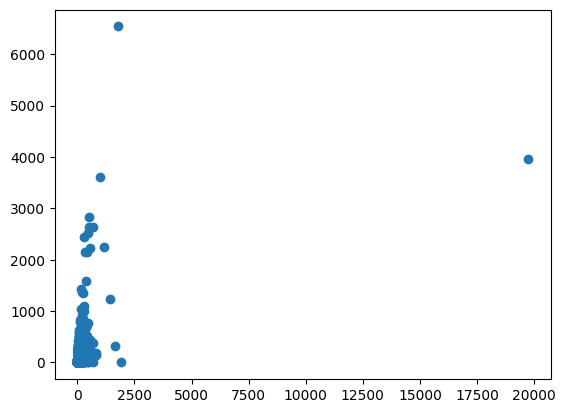

In [26]:
plt.scatter(nutritiondf_perc.Calories,nutritiondf_perc.ProteinContent)

plt.show()

25.877665632215017

In [ ]:
nutrition_categories = []

